## Figure 1E

C:\Users\huash\AppData\Local\Temp\ipykernel_10384\2208875054.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',
C:\Users\huash\AppData\Local\Temp\ipykernel_10384\2208875054.py:31: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',


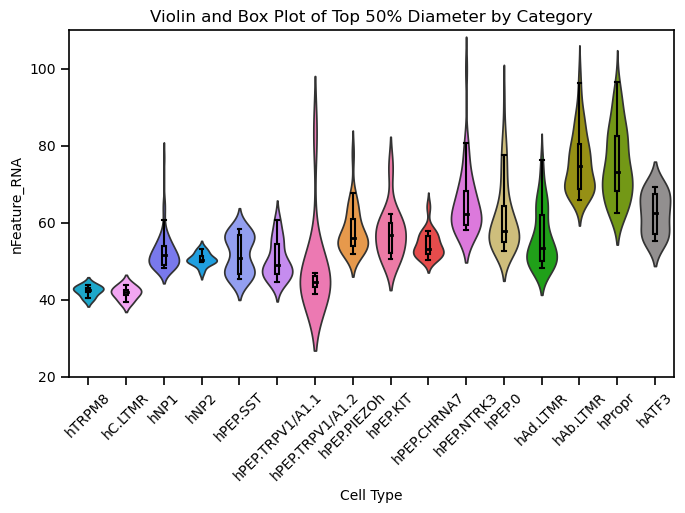

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Load the data
data = pd.read_csv(r"C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\Source data\Source code and data\Source code 3\human_drg_meta_data_newname.csv")

# Rank and filter the top 50%
data['rank'] = data.groupby('cl.conserv_final')['diameter'].rank(ascending=False, method='first')
grouped = data.groupby('cl.conserv_final')
top_50 = grouped.apply(lambda x: x[x['rank'] <= len(x) / 2]).reset_index(drop=True)

# Define category order and colors
category_order = [
    'hTRPM8', 'hC.LTMR', 'hNP1', 'hNP2', 'hPEP.SST',
    'hPEP.TRPV1/A1.1', 'hPEP.TRPV1/A1.2', 'hPEP.PIEZOh', 'hPEP.KIT',
    'hPEP.CHRNA7', 'hPEP.NTRK3', 'hPEP.0', 'hAd.LTMR',
    'hAb.LTMR', 'hPropr', 'hATF3'
]

colors = ['#00b8e7','#FF99FF','#6666FF','#00a9ff','#8494ff','#c77cff','#ff66b2',
          '#ff9933','#ff68a1','#ff3333','#ed68ed','#dcc66e','#0cb702','#aba300',
          '#7cae00','#928e8f']

# Create the plot
plt.figure(figsize=(7.8, 4.5))

# Violin plot
sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',
               order=category_order, palette=colors, inner=None)

# Custom box plot
positions = np.arange(len(category_order))
for i, category in enumerate(category_order):
    subset = top_50[top_50['cl.conserv_final'] == category]['diameter']
    if len(subset) > 0:
        quartiles = np.percentile(subset, [25, 50, 75])
        iqr = quartiles[2] - quartiles[0]
        whisker_low = np.min(subset[subset >= quartiles[0] - 1.5 * iqr])
        whisker_high = np.max(subset[subset <= quartiles[2] + 1.5 * iqr])

        # Draw the box
        box = patches.Rectangle((positions[i] - 0.05, quartiles[0]), 0.1, quartiles[2] - quartiles[0],
                                edgecolor='black', facecolor='none', linewidth=1.5)
        plt.gca().add_patch(box)

        # Draw the median line
        plt.plot([positions[i] - 0.05, positions[i] + 0.05], [quartiles[1], quartiles[1]], color='black', linewidth=2)

        # Draw the whiskers
        plt.plot([positions[i], positions[i]], [whisker_low, quartiles[0]], color='black', linewidth=1.5)
        plt.plot([positions[i], positions[i]], [quartiles[2], whisker_high], color='black', linewidth=1.5)

        # Draw the caps
        plt.plot([positions[i] - 0.05, positions[i] + 0.05], [whisker_low, whisker_low], color='black', linewidth=1.5)
        plt.plot([positions[i] - 0.05, positions[i] + 0.05], [whisker_high, whisker_high], color='black', linewidth=1.5)

# Customize the plot
plt.title('Violin and Box Plot of Top 50% Diameter by Category')
plt.xticks(rotation=45)
plt.ylabel('nFeature_RNA')  # Update the y-axis label to reflect the correct feature
plt.xlabel('Cell Type')     # Update the x-axis label for clarity

# Set y-axis limits and ticks
plt.ylim(20, 110)
plt.yticks(np.arange(20, 111, 20))

# Set x-axis limits to move y-axis closer to the first violin plot
plt.xlim(-0.5, len(category_order) - 0.5)

# Thicken the axes and ticks
ax = plt.gca()
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.tick_params(axis='both', width=1.2, length=6)

# Save the plot as an SVG file
#plt.savefig(r"C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\F1E-1.svg", format='svg')

# Show the plot
plt.show()

## Figure 4D

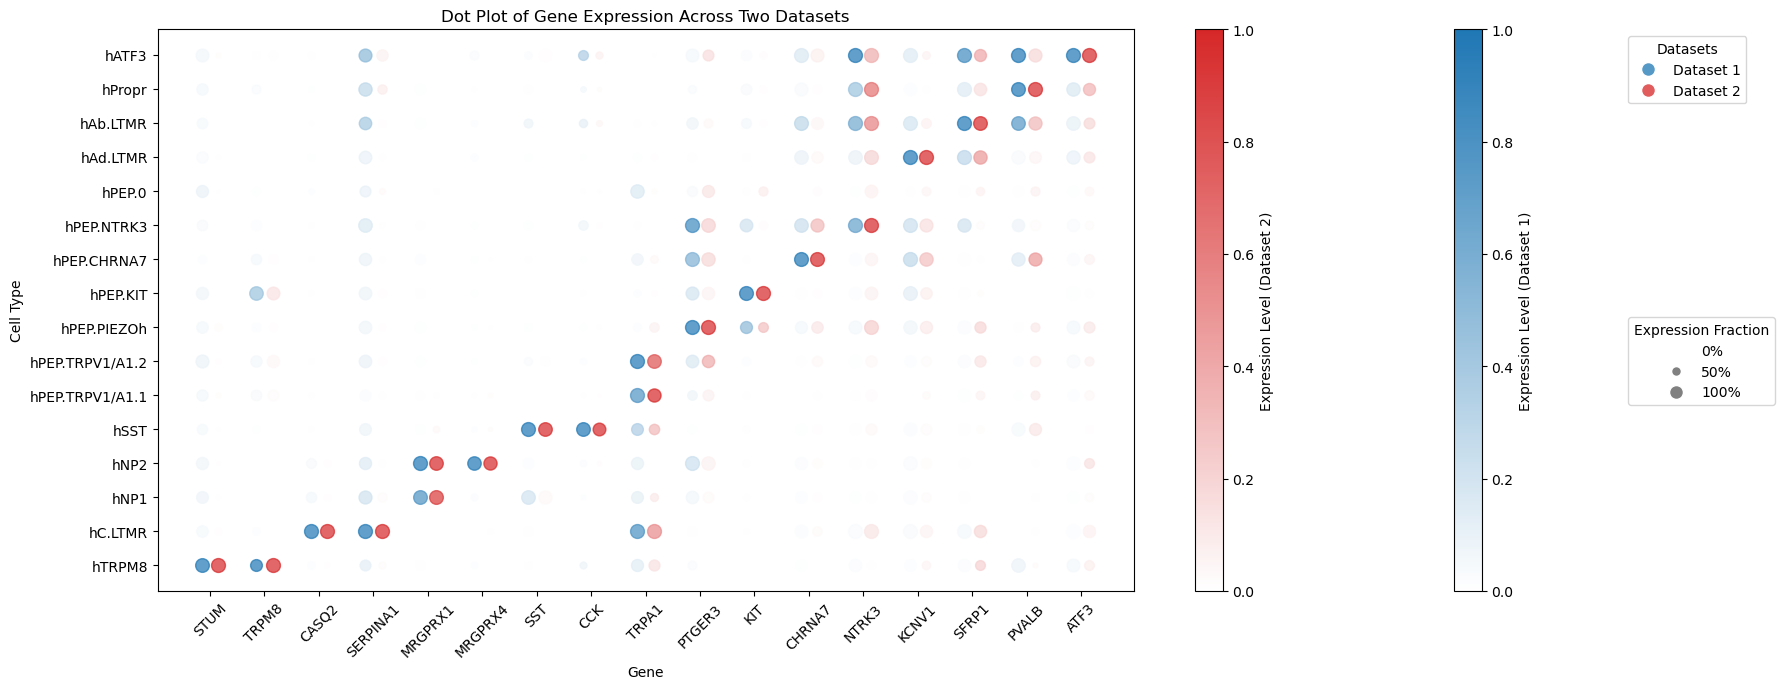

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
import numpy as np
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D

# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]
cell_type_order = ["hTRPM8", "hC.LTMR", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3"]

# Load your data
expression_data_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_1340.csv', index_col=0)
metadata_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled_1 = expression_data_1.T
expression_data_1_scaled_df = pd.DataFrame(expression_scaled_1, columns=expression_data_1.index, index=expression_data_1.columns)

# Map cell types to each cell in the expression matrix
expression_data_1_scaled_df['cell_type'] = metadata_1['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_1 = mean_expression_1 / mean_expression_1.max()

# Load your data
expression_data_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/Expression_matrix_raw_counts.csv', index_col=0)
metadata_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/human_drg_meta_data_final_new name_1066_hSST.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
expression_scaled = expression_data_2.T
expression_data_2_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data_2.index, index=expression_data_2.columns)

# Align metadata to only include common cells (intersection of cells in both datasets)
common_cells = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells]
aligned_metadata_2 = metadata_2.loc[common_cells]

# Map cell types to each cell in the expression matrix now that they are aligned
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['cell_type_manual']

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_2 = mean_expression_2 / mean_expression_2.max()

plt.figure(figsize=(18, 7))
ax = plt.gca()

# Define custom colormaps for the datasets using specific RGB values or hex codes
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "#1f77b4"])  # Blue color
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "#d62728"])  # Red color

norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

# Adding a colorbar to represent expression levels for both datasets
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)  # Using cmap1 for the colorbar
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax, orientation='vertical')
cbar1.set_label('Expression Level (Dataset 1)')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)  # Using cmap2 for the colorbar
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax, orientation='vertical')
cbar2.set_label('Expression Level (Dataset 2)')

# Custom legend for dot sizes (fraction expressed)
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Example sizes corresponding to the labels
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]

# Adding legends for datasets and dot sizes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Dataset 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='Dataset 2')
]

# Main datasets legend, placed at the top left outside of the plot
main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.5, 1))
ax.add_artist(main_legend)

# Dot sizes legend, adjust its position by changing bbox_to_anchor values
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()

# Save the plot as an SVG file
plt.savefig(r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\F4D.svg', format='svg')

plt.show()


## Figure 4F

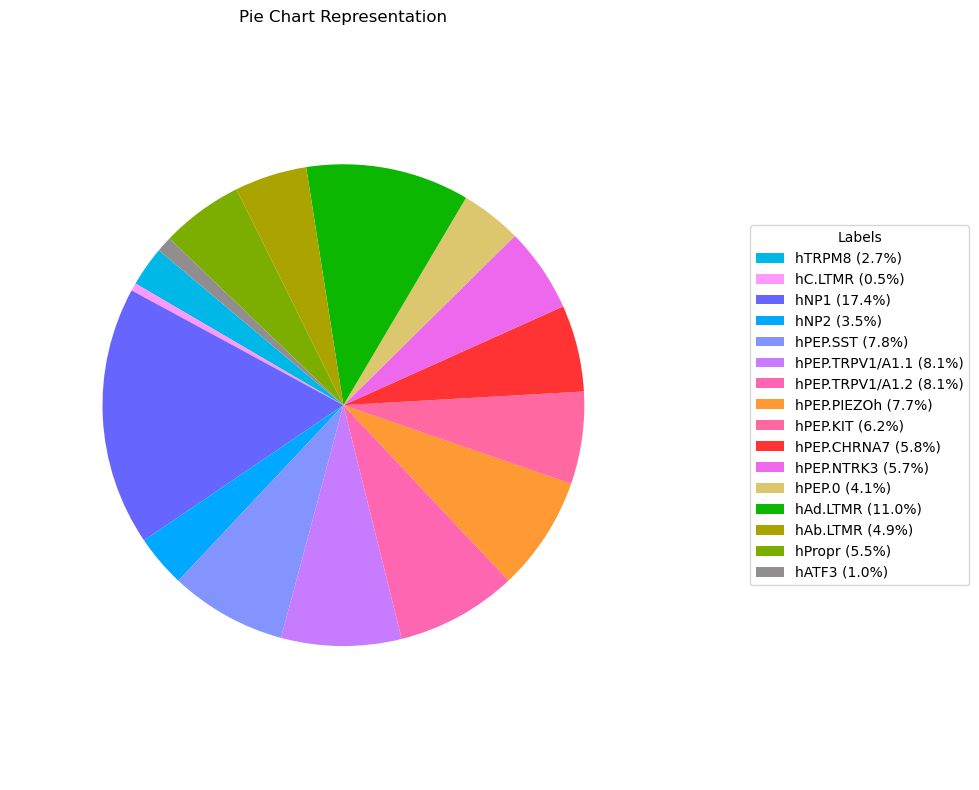

In [5]:
import matplotlib.pyplot as plt

# Input data

data = [("hTRPM8", 36, '#00b8e7'),
        ("hC.LTMR", 7, '#FF99FF'),
        ("hNP1", 233, '#6666FF'), 
        ("hNP2", 47, '#00a9ff'),
        ("hPEP.SST", 105, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 108, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 109, '#ff66b2'), 
        ("hPEP.PIEZOh", 103, '#ff9933'),
        ("hPEP.KIT", 83, '#ff68a1'), 
        ("hPEP.CHRNA7", 78, '#ff3333'),
        ("hPEP.NTRK3", 76, '#ed68ed'), 
        ("hPEP.0", 55, '#dcc66e'),
        ("hAd.LTMR", 147, '#0cb702'), 
        ("hAb.LTMR", 65, '#aba300'),
        ("hPropr", 74, '#7cae00'), 
        ("hATF3", 14, '#928e8f'),]


# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Calculate total for percentage calculation
total = sum(sizes)

# Generate pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
#wedges, texts = ax.pie(sizes, labels=labels, colors=colors, startangle=140)
wedges, texts = ax.pie(sizes,  colors=colors, startangle=140)


# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Creating legend with percentages
legend_labels = ['{0} ({1:1.1f}%)'.format(i[0], (i[1]/total)*100) for i in data]
plt.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.title('Pie Chart Representation')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


## Supplmentary figure 2E

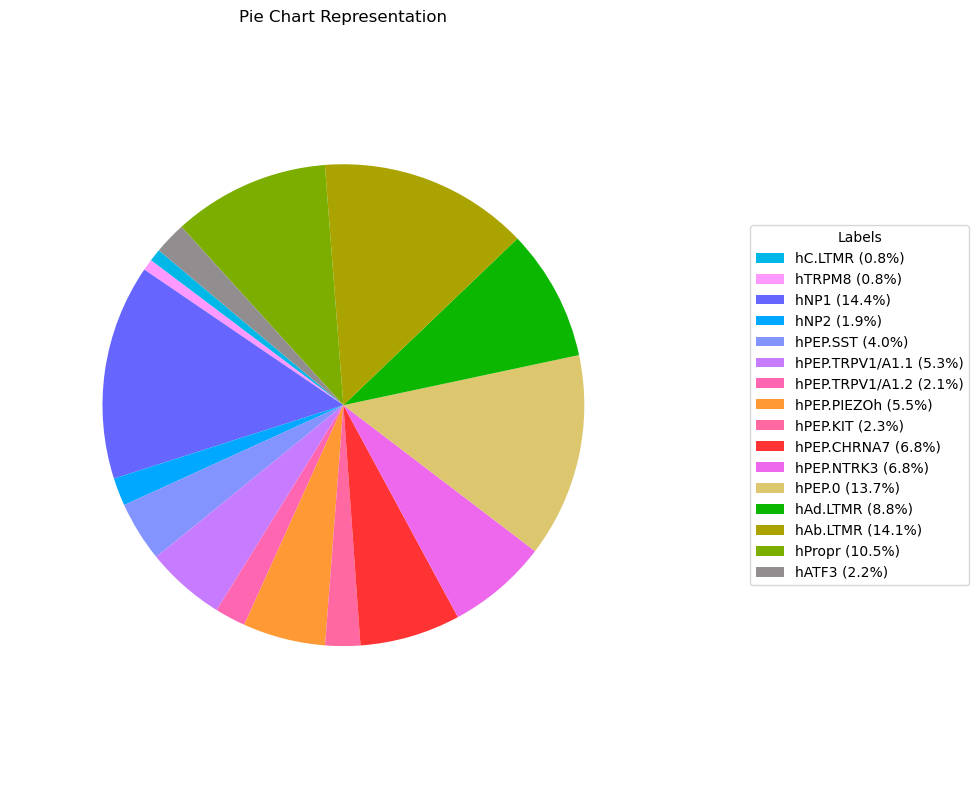

In [1]:
import matplotlib.pyplot as plt

# Input data
data = [("hC.LTMR", 9, '#00b8e7'),
        ("hTRPM8", 8, '#FF99FF'),
        ("hNP1", 154, '#6666FF'), 
        ("hNP2", 20, '#00a9ff'),
        ("hPEP.SST", 43, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 57, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 22, '#ff66b2'), 
        ("hPEP.PIEZOh", 59, '#ff9933'),
        ("hPEP.KIT", 25, '#ff68a1'), 
        ("hPEP.CHRNA7", 72, '#ff3333'),
        ("hPEP.NTRK3", 72, '#ed68ed'), 
        ("hPEP.0", 146, '#dcc66e'),
        ("hAd.LTMR", 94, '#0cb702'), 
        ("hAb.LTMR", 150, '#aba300'),
        ("hPropr", 112, '#7cae00'), 
        ("hATF3", 23, '#928e8f')]


# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Calculate total for percentage calculation
total = sum(sizes)

# Generate pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
#wedges, texts = ax.pie(sizes, labels=labels, colors=colors, startangle=140)
wedges, texts = ax.pie(sizes,  colors=colors, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Creating legend with percentages
legend_labels = ['{0} ({1:1.1f}%)'.format(i[0], (i[1]/total)*100) for i in data]
plt.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.title('Pie Chart Representation')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv(r'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Project data\Sequencing data\human_drg_meta_data_final_new name_1136_final_name.csv')

# Define the mapping based on "donor" values
def map_values(column, donor_values):
    if column == 'N2':
        return donor_values['N2']
    elif column == 'N3':
        return donor_values['N3']
    elif column == 'N4':
        return donor_values['N4']
    else:
        return None

# Map the values based on "donor"
df['A'] = df['donor'].apply(lambda x: map_values(x, {'N2': 61, 'N3': 56, 'N4': 23}))
df['B'] = df['donor'].apply(lambda x: map_values(x, {'N2': 'Caucasian', 'N3': 'Caucasian', 'N4': 'Caucasian'}))
df['C'] = df['donor'].apply(lambda x: map_values(x, {'N2': 'Female', 'N3': 'Female', 'N4': 'Male'}))

# Save the modified DataFrame to a new CSV file
df.to_csv(r'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Project data\Sequencing data\new_X.csv', index=False)


In [15]:

import pandas as pd

df = pd.read_csv(r'C:\Users\huash\Desktop\Gene_expression_matrix_star_Gene_ID.csv') # Replace 'filename.csv' with the name of your CSV file
words = []

for gene_id in df['Gene_ID']:
    if isinstance(gene_id, str) and 'OR' in gene_id:
        gene_id_words = gene_id.split() # Split the gene_id into words
        for word in gene_id_words:
            if word.startswith('OR'): # Check if the current word starts with 'OR'
                words.append(f"{word}") # Add the word to the list with quotation markers and a comma

print(words)

['OR4F16', 'OR10AE1P', 'OR10J1', 'OR10J4', 'OR10J5', 'OR2L13', 'OR2AK2', 'OR2L6P', 'OR2L9P', 'OR2T32P', 'OR2L1P', 'OR10J6P', 'OR2W5P', 'OR2G2', 'OR2G3', 'OR3D1P', 'OR14L1P', 'OR13Z1P', 'OR13Z2P', 'OR13Z3P', 'OR11I1P', 'OR2M7', 'OR14C36', 'OR2T1', 'OR2T3', 'OR2T5', 'OR2AS2P', 'OR2AS1P', 'OR2T34', 'OR14I1', 'OR10T2', 'OR10T1P', 'OR10R3P', 'OR10R1P', 'ORC1', 'OR10J2P', 'OR10J7P', 'OR10J8P', 'OR10J9P', 'OR2L2', 'OR2L3', 'OR2M4', 'OR4F29', 'OR2T35', 'OR10K2', 'OR2L5', 'OR10X1', 'OR2T27', 'OR6K1P', 'OR6K3', 'OR6K4P', 'OR6K5P', 'OR6N2', 'OR2AQ1P', 'OR10AA1P', 'OR10J3', 'OR14A16', 'OR6R1P', 'OR11L1', 'OR2W3', 'OR2AJ1', 'OR2X1P', 'OR2L8', 'OR6Y1', 'OR2T6', 'OR2M1P', 'OR2M5', 'OR2M2', 'OR2T8', 'OR6F1', 'OR14A2', 'OR14K1', 'OR9H1P', 'OR10K1', 'OR2T12', 'OR2T33', 'OR2B11', 'OR6K6', 'OR2T29', 'OR4G4P', 'OR4G11P', 'OR4F5', 'OR2G6', 'OR2T2', 'OR13G1', 'OR1C1', 'OR2M3', 'OR2T10', 'OR6N1', 'OR2T11', 'OR10Z1', 'OR10R2', 'OR2T4', 'OR6P1', 'OR6K2', 'OR2T7', 'OR2C3', 'OR7E62P', 'OR7E46P', 'OR7E91P', 'OR7E2

In [ ]:
import pandas as pd

# Load the CSV file into a DataFrame
df = pd.read_csv('X.csv')

# Fill missing values in column 'A' with "Glia.cont"
df['A'].fillna('Glia.cont', inplace=True)

# Save the modified DataFrame back to X.csv
df.to_csv('X.csv', index=False)


In [16]:
len(words)


877

In [18]:
import pandas as pd
import re

df = pd.read_csv(r'C:\Users\huash\Desktop\Gene_expression_matrix_star_Gene_ID.csv') # Replace 'filename.csv' with the name of your CSV file
words = []

for gene_id in df['Gene_ID']:
    if isinstance(gene_id, str) and re.match(r'^OR\d+', gene_id):
        words.append(f'{gene_id}')

print(words)

['OR4F16', 'OR10AE1P', 'OR10J1', 'OR10J4', 'OR10J5', 'OR2L13', 'OR2AK2', 'OR2L6P', 'OR2L9P', 'OR2T32P', 'OR2L1P', 'OR10J6P', 'OR2W5P', 'OR2G2', 'OR2G3', 'OR3D1P', 'OR14L1P', 'OR13Z1P', 'OR13Z2P', 'OR13Z3P', 'OR11I1P', 'OR2M7', 'OR14C36', 'OR2T1', 'OR2T3', 'OR2T5', 'OR2AS2P', 'OR2AS1P', 'OR2T34', 'OR14I1', 'OR10T2', 'OR10T1P', 'OR10R3P', 'OR10R1P', 'OR10J2P', 'OR10J7P', 'OR10J8P', 'OR10J9P', 'OR2L2', 'OR2L3', 'OR2M4', 'OR4F29', 'OR2T35', 'OR10K2', 'OR2L5', 'OR10X1', 'OR2T27', 'OR6K1P', 'OR6K3', 'OR6K4P', 'OR6K5P', 'OR6N2', 'OR2AQ1P', 'OR10AA1P', 'OR10J3', 'OR14A16', 'OR6R1P', 'OR11L1', 'OR2W3', 'OR2AJ1', 'OR2X1P', 'OR2L8', 'OR6Y1', 'OR2T6', 'OR2M1P', 'OR2M5', 'OR2M2', 'OR2T8', 'OR6F1', 'OR14A2', 'OR14K1', 'OR9H1P', 'OR10K1', 'OR2T12', 'OR2T33', 'OR2B11', 'OR6K6', 'OR2T29', 'OR4G4P', 'OR4G11P', 'OR4F5', 'OR2G6', 'OR2T2', 'OR13G1', 'OR1C1', 'OR2M3', 'OR2T10', 'OR6N1', 'OR2T11', 'OR10Z1', 'OR10R2', 'OR2T4', 'OR6P1', 'OR6K2', 'OR2T7', 'OR2C3', 'OR7E62P', 'OR7E46P', 'OR7E91P', 'OR7E28P', 'OR

In [19]:
len(words)

862

In [4]:
import csv

def select_rows_with_keywords(file_path, column_index, keywords):
    selected_rows = []
    with open(file_path, 'r', newline='') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        header = next(reader)  # Read the header
        selected_rows.append(header)  # Add header to selected rows
        for row in reader:
            if row[column_index] in keywords:
                selected_rows.append(row)
    return selected_rows

def save_as_tsv(file_path, rows):
    with open(file_path, 'w', newline='') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        writer.writerows(rows)

# Example usage
input_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\human_compartment_integrated_full.tsv'  # Replace with the path to your input TSV file
output_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv'  # Replace with the desired path for the output TSV file
column_index = 2  # Replace with the index of the column containing the keywords (0-based index)
keywords = ['Cell surface', 'membrane']  # Add the keywords you want to search for

selected_rows = select_rows_with_keywords(input_file_path, column_index, keywords)

save_as_tsv(output_file_path, selected_rows)

print("Selected rows saved to", output_file_path)


Selected rows saved to E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv


In [8]:
import csv

def select_rows_with_keywords(file_path, keywords):
    selected_rows = []
    with open(file_path, 'r', newline='') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        header = next(reader)  # Read the header
        selected_rows.append(header)  # Add header to selected rows
        for row in reader:
            for column_value in row:
                if any(keyword in column_value for keyword in keywords):
                    selected_rows.append(row)
                    break  # Skip remaining columns in the current row
    return selected_rows

def save_as_tsv(file_path, rows):
    with open(file_path, 'w', newline='') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        writer.writerows(rows)

# Example usage
input_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\human_compartment_integrated_full.tsv'  # Replace with the path to your input TSV file
output_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv'  # Replace with the desired path for the output TSV file
keywords = ['Cell surface', 'Plasma membrane']  # Add the keywords you want to search for

#

selected_rows = select_rows_with_keywords(input_file_path, keywords)

save_as_tsv(output_file_path, selected_rows)

print("Selected rows saved to", output_file_path)


Selected rows saved to E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv


In [9]:
import csv

def select_rows_with_keywords(file_path, keywords):
    selected_rows = []
    with open(file_path, 'r', newline='') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        header = next(reader)  # Read the header
        selected_rows.append(header)  # Add header to selected rows
        for row in reader:
            for column_value in row:
                if any(keyword.lower() in column_value.lower() for keyword in keywords):
                    selected_rows.append(row)
                    break  # Skip remaining columns in the current row
    return selected_rows

def save_as_tsv(file_path, rows):
    with open(file_path, 'w', newline='') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        writer.writerows(rows)

# Example usage
input_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\human_compartment_integrated_full.tsv'  # Replace with the path to your input TSV file
output_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv'  # Replace with the desired path for the output TSV file
keywords = ['Cell surface', 'Plasma membrane']  # Add the keywords you want to search for


selected_rows = select_rows_with_keywords(input_file_path, keywords)

save_as_tsv(output_file_path, selected_rows)

print("Selected rows saved to", output_file_path)


Selected rows saved to E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv


In [10]:
import csv

def select_rows_with_keywords(file_path, keywords):
    selected_rows = []
    with open(file_path, 'r', newline='') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        header = next(reader)  # Read the header
        selected_rows.append(header)  # Add header to selected rows
        for row in reader:
            if any(column_value.lower() == keyword.lower() for column_value in row for keyword in keywords):
                selected_rows.append(row)
    return selected_rows

def save_as_tsv(file_path, rows):
    with open(file_path, 'w', newline='') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        writer.writerows(rows)

# Example usage
input_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\human_compartment_integrated_full.tsv'  # Replace with the path to your input TSV file
output_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv'  # Replace with the desired path for the output TSV file
keywords = ['Cell surface', 'Plasma membrane']  # Add the keywords you want to search for

selected_rows = select_rows_with_keywords(input_file_path, keywords)

save_as_tsv(output_file_path, selected_rows)

print("Selected rows saved to", output_file_path)

Selected rows saved to E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv


In [11]:
import csv

def select_unique_rows_with_keyword(file_path, keyword):
    unique_rows = set()
    with open(file_path, 'r', newline='') as tsv_file:
        reader = csv.reader(tsv_file, delimiter='\t')
        for row in reader:
            if row[0].startswith(keyword):
                unique_rows.add('\t'.join(row))
    return unique_rows

def save_as_tsv(file_path, rows):
    with open(file_path, 'w', newline='') as tsv_file:
        writer = csv.writer(tsv_file, delimiter='\t')
        for row in rows:
            writer.writerow(row.split('\t'))

# Example usage
input_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data.tsv'  # Replace with the path to your input TSV file
output_file_path = 'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data_final.tsv'  # Replace with the desired path for the output TSV file
keyword = 'ENSP'

selected_rows = select_unique_rows_with_keyword(input_file_path, keyword)

save_as_tsv(output_file_path, selected_rows)

print("Selected rows saved to", output_file_path)


Selected rows saved to E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\human membrane protein\selected_data_final.tsv


In [1]:
import pandas as pd
import openpyxl

# Load the Excel file
file_path = 'C:/Users/huash/Desktop/alignment results.xlsx'
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# Parse the data
parsed_data = {}
for row in sheet.iter_rows(values_only=True):
    for cell in row:
        if cell is not None:
            lines = cell.split('\n')
            current_key = None
            for line in lines:
                if "Results for" in line:
                    current_key = line.split(' ')[2][:-1]
                    parsed_data[current_key] = {}
                elif ":" in line:
                    key, value = line.split(': ')
                    parsed_data[current_key][key] = float(value.strip('%'))

# Create a DataFrame
df = pd.DataFrame.from_dict(parsed_data, orient='index')

# Write the DataFrame to a new Excel file
df.to_excel('C:/Users/huash/Desktop/output_file.xlsx')


KeyError: None

In [2]:
import pandas as pd
import openpyxl

# Load the Excel file
file_path = 'C:/Users/huash/Desktop/alignment results.xlsx'
workbook = openpyxl.load_workbook(file_path)
sheet = workbook.active

# Parse the data
parsed_data = {}
current_key = None
for row in sheet.iter_rows(values_only=True):
    for cell in row:
        if cell is not None:
            lines = cell.split('\n')
            for line in lines:
                if "Results for" in line:
                    current_key = line.split(' ')[2][:-1]
                    parsed_data[current_key] = {}
                elif ":" in line and current_key is not None: # Ensure current_key is not None
                    key, value = line.split(': ')
                    parsed_data[current_key][key] = float(value.strip('%'))

# Check if any data was parsed
if not parsed_data:
    print("No data was parsed from the Excel file.")
else:
    # Create a DataFrame
    df = pd.DataFrame.from_dict(parsed_data, orient='index')

    # Write the DataFrame to a new Excel file
    df.to_excel('C:/Users/huash/Desktop/output_file.xlsx')


In [2]:
from scipy.stats import chi2_contingency

# 构建列联表
data = [[4, 1],
        [53, 86],
        [9, 13],
        [5, 4],
        [0, 1],
        [1, 2],
        [3, 7]]

# 进行卡方检验
chi2, p, dof, expected = chi2_contingency(data)

print(f"Chi-squared: {chi2}")
print(f"p-value: {p}")
print(f"Degrees of freedom: {dof}")
print(f"Expected counts: \n{expected}")

# 根据p-value判断差异是否显著
if p < 0.05:
    print("两组数据存在显著差异。")
else:
    print("两组数据不存在显著差异。")


Chi-squared: 5.596948538776635
p-value: 0.4698174594283304
Degrees of freedom: 6
Expected counts: 
[[ 1.98412698  3.01587302]
 [55.15873016 83.84126984]
 [ 8.73015873 13.26984127]
 [ 3.57142857  5.42857143]
 [ 0.3968254   0.6031746 ]
 [ 1.19047619  1.80952381]
 [ 3.96825397  6.03174603]]
两组数据不存在显著差异。


TypeError: '<' not supported between instances of 'str' and 'int'

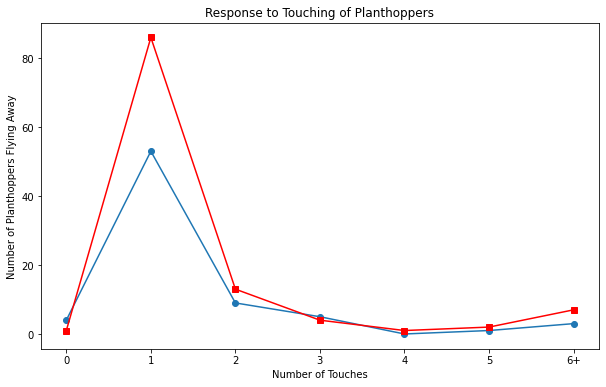

In [3]:
import matplotlib.pyplot as plt

# 触碰次数
touch_counts = [0, 1, 2, 3, 4, 5, '6+']

# 第一组数据的飞走只数
group1 = [4, 53, 9, 5, 0, 1, 3]

# 第二组数据的飞走只数
group2 = [1, 86, 13, 4, 1, 2, 7]

# 创建折线图
plt.figure(figsize=(10, 6))

# 绘制第一组数据的折线图
plt.plot(touch_counts, group1, label='Group 1', marker='o')

# 绘制第二组数据的折线图
plt.plot(touch_counts, group2, label='Group 2', color='red', marker='s')

# 添加标题和标签
plt.title('Response to Touching of Planthoppers')
plt.xlabel('Number of Touches')
plt.ylabel('Number of Planthoppers Flying Away')
plt.xticks(touch_counts)  # 设置X轴刻度

# 显示图例
plt.legend()

# 显示图形
plt.show()


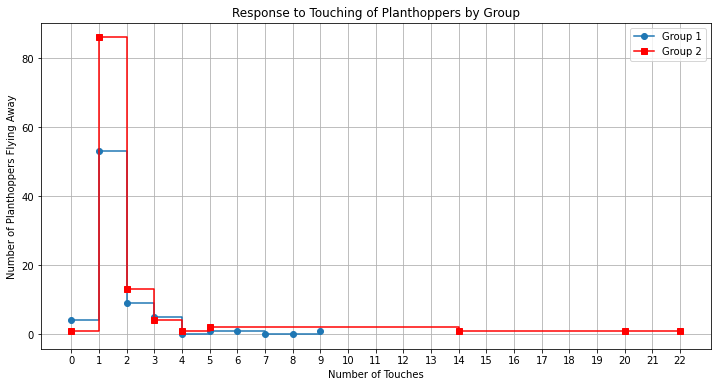

In [4]:
import matplotlib.pyplot as plt

# 第一组数据
touches_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
flies_1 = [4, 53, 9, 5, 0, 1, 1, 0, 0, 1]

# 第二组数据
touches_2 = [0, 1, 2, 3, 4, 5, 14, 20, 22]
flies_2 = [1, 86, 13, 4, 1, 2, 1, 1, 1]

# 创建阶梯图
plt.figure(figsize=(12, 6))

# 绘制第一组数据的阶梯图
plt.step(touches_1, flies_1, label='Group 1', where='post', marker='o')

# 绘制第二组数据的阶梯图
plt.step(touches_2, flies_2, label='Group 2', where='post', color='red', marker='s')

# 添加标题和标签
plt.title('Response to Touching of Planthoppers by Group')
plt.xlabel('Number of Touches')
plt.ylabel('Number of Planthoppers Flying Away')
plt.xticks(range(0, max(touches_1 + touches_2)+1))  # 设置X轴刻度

# 显示图例
plt.legend()

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()


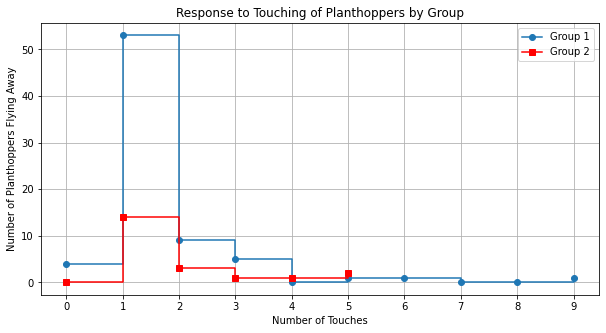

In [5]:
import matplotlib.pyplot as plt

# 设置数据
touches_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
flies_1 = [4, 53, 9, 5, 0, 1, 1, 0, 0, 1]

touches_2 = [0, 1, 2, 3, 4, 5]
flies_2 = [0, 14, 3, 1, 1, 2]

# 创建阶梯图
plt.figure(figsize=(10, 5))

# 绘制第一组数据的阶梯图
plt.step(touches_1, flies_1, where='post', label='Group 1', marker='o')

# 绘制第二组数据的阶梯图
plt.step(touches_2, flies_2, where='post', label='Group 2', color='red', marker='s')

# 添加标题和标签
plt.title('Response to Touching of Planthoppers by Group')
plt.xlabel('Number of Touches')
plt.ylabel('Number of Planthoppers Flying Away')
plt.xticks(range(0, max(touches_1 + touches_2)+1))  # 设置X轴刻度

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


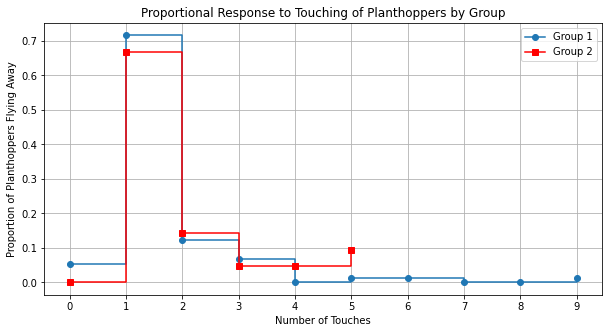

In [6]:
# 第一组数据的总数
total_group1 = sum([4, 53, 9, 5, 0, 1, 1, 0, 0, 1])

# 第二组数据的总数
total_group2 = sum([0, 14, 3, 1, 1, 2])

# 计算每次触碰后飞走的比例
proportions_group1 = [x / total_group1 for x in [4, 53, 9, 5, 0, 1, 1, 0, 0, 1]]
proportions_group2 = [x / total_group2 for x in [0, 14, 3, 1, 1, 2]]

# 触碰次数
touches_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
touches_2 = [0, 1, 2, 3, 4, 5]

# 创建阶梯图来显示比例
plt.figure(figsize=(10, 5))

# 绘制第一组数据的阶梯图
plt.step(touches_1, proportions_group1, where='post', label='Group 1', marker='o')

# 绘制第二组数据的阶梯图
plt.step(touches_2, proportions_group2, where='post', label='Group 2', color='red', marker='s')

# 添加标题和标签
plt.title('Proportional Response to Touching of Planthoppers by Group')
plt.xlabel('Number of Touches')
plt.ylabel('Proportion of Planthoppers Flying Away')
plt.xticks(range(0, max(touches_1 + touches_2)+1))  # 设置X轴刻度

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


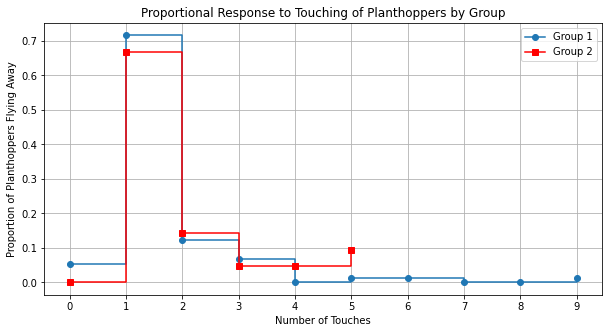

In [7]:
import matplotlib.pyplot as plt

# 第一组数据
touches_1 = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
flies_1 = [4, 53, 9, 5, 0, 1, 1, 0, 0, 1]
total_flies_1 = sum(flies_1)
proportions_1 = [f / total_flies_1 for f in flies_1]

# 第二组数据
touches_2 = [0, 1, 2, 3, 4, 5]
flies_2 = [0, 14, 3, 1, 1, 2]
total_flies_2 = sum(flies_2)
proportions_2 = [f / total_flies_2 for f in flies_2]

# 创建阶梯图
plt.figure(figsize=(10, 5))

# 绘制第一组数据的阶梯图
plt.step(touches_1, proportions_1, where='post', label='Group 1', marker='o')

# 绘制第二组数据的阶梯图
plt.step(touches_2, proportions_2, where='post', label='Group 2', color='red', marker='s')

# 添加标题和标签
plt.title('Proportional Response to Touching of Planthoppers by Group')
plt.xlabel('Number of Touches')
plt.ylabel('Proportion of Planthoppers Flying Away')

# 确保触碰次数对齐
max_touches = max(max(touches_1), max(touches_2))
plt.xticks(range(0, max_touches + 1))

# 显示图例
plt.legend()

# 添加网格线
plt.grid(True)

# 显示图形
plt.show()


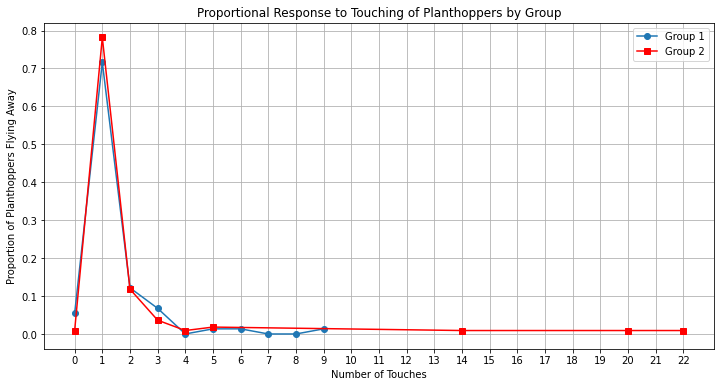

In [8]:
import matplotlib.pyplot as plt

# 第一组数据
group1_touches = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
group1_flies = [4, 53, 9, 5, 0, 1, 1, 0, 0, 1]
total_group1_flies = sum(group1_flies)
group1_proportions = [flies / total_group1_flies for flies in group1_flies]

# 第二组数据
group2_touches = [0, 1, 2, 3, 4, 5, 14, 20, 22]
group2_flies = [1, 86, 13, 4, 1, 2, 1, 1, 1]
total_group2_flies = sum(group2_flies)
group2_proportions = [flies / total_group2_flies for flies in group2_flies]

# 创建比例折线图
plt.figure(figsize=(12, 6))

# 绘制第一组数据的折线图
plt.plot(group1_touches, group1_proportions, label='Group 1', marker='o')

# 绘制第二组数据的折线图
plt.plot(group2_touches, group2_proportions, label='Group 2', color='red', marker='s')

# 添加标题和标签
plt.title('Proportional Response to Touching of Planthoppers by Group')
plt.xlabel('Number of Touches')
plt.ylabel('Proportion of Planthoppers Flying Away')

# 设置X轴的范围和刻度以匹配两组数据
plt.xticks(range(0, max(group1_touches + group2_touches)+1, 1))

# 显示图例
plt.legend()

# 显示网格
plt.grid(True)

# 显示图形
plt.show()


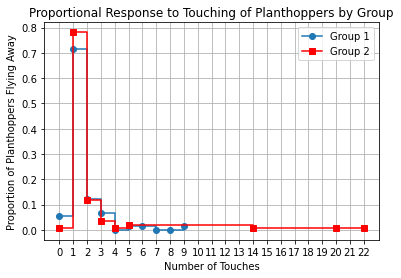

In [9]:
import matplotlib.pyplot as plt

# 第一组数据
group1_touches = [0, 1, 2, 3, 4, 5, 6, 7, 8, 9]
group1_flies = [4, 53, 9, 5, 0, 1, 1, 0, 0, 1]
total_group1 = sum(group1_flies)
group1_proportions = [fly / total_group1 for fly in group1_flies]

# 第二组数据
group2_touches = [0, 1, 2, 3, 4, 5, 14, 20, 22]
group2_flies = [1, 86, 13, 4, 1, 2, 1, 1, 1]
total_group2 = sum(group2_flies)
group2_proportions = [fly / total_group2 for fly in group2_flies]

# 绘制第一组数据的阶梯图
plt.step(group1_touches, group1_proportions, where='post', label='Group 1', marker='o')

# 绘制第二组数据的阶梯图
plt.step(group2_touches, group2_proportions, where='post', label='Group 2', color='red', marker='s')

# 添加标题和轴标签
plt.title('Proportional Response to Touching of Planthoppers by Group')
plt.xlabel('Number of Touches')
plt.ylabel('Proportion of Planthoppers Flying Away')

# 设置X轴刻度
plt.xticks(range(0, max(group1_touches + group2_touches)+1))

# 添加图例
plt.legend()

# 显示网格线
plt.grid(True)

# 显示图形
plt.show()


FileNotFoundError: [Errno 2] No such file or directory: '/mnt/data/custom_pie_chart_highlighted.svg'

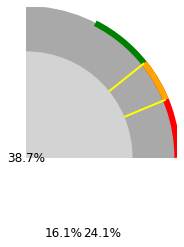

In [1]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc, Circle, PathPatch
from matplotlib.path import Path
import numpy as np

# Input percentages
r, g, o = 38.7, 24.1, 16.1

# Angles for the arcs
r_start_angle = 0
r_end_angle = r_start_angle + r
g_end_angle = r_end_angle + g
o_start_angle = r_end_angle - o
o_end_angle = o_start_angle + o

# Create figure and axis
fig, ax = plt.subplots()

# Outer circle (dark gray) representing 100%
outer_circle = Circle((0, 0), 1, color='darkgray', zorder=1)
ax.add_patch(outer_circle)

# Overlap area (orange)
overlap = Arc((0, 0), 2, 2, theta1=o_start_angle, theta2=o_end_angle, color='orange', linewidth=6, zorder=4)
ax.add_patch(overlap)

# Yellow lines to highlight the overlap
yellow_line_1 = PathPatch(
    Path([(np.cos(np.radians(o_start_angle)), np.sin(np.radians(o_start_angle))),
          (np.cos(np.radians(o_start_angle))*0.7, np.sin(np.radians(o_start_angle))*0.7)]),
    color='yellow', linewidth=2, zorder=5)
ax.add_patch(yellow_line_1)

yellow_line_2 = PathPatch(
    Path([(np.cos(np.radians(o_end_angle)), np.sin(np.radians(o_end_angle))),
          (np.cos(np.radians(o_end_angle))*0.7, np.sin(np.radians(o_end_angle))*0.7)]),
    color='yellow', linewidth=2, zorder=5)
ax.add_patch(yellow_line_2)

# Red arc (r)
red_arc = Arc((0, 0), 2, 2, theta1=r_start_angle, theta2=r_end_angle, color='red', linewidth=6, zorder=3)
ax.add_patch(red_arc)

# Green arc (g)
green_arc = Arc((0, 0), 2, 2, theta1=r_end_angle, theta2=g_end_angle, color='green', linewidth=6, zorder=2)
ax.add_patch(green_arc)

# Inner circle (light gray)
inner_circle = Circle((0, 0), 0.7, color='lightgray', zorder=6)
ax.add_patch(inner_circle)

# Adding percentage texts
ax.text(0, 0, f"{r}%", ha='center', va='center', fontsize=12, zorder=7)
ax.text(0.5, -0.5, f"{g}%", ha='center', va='center', fontsize=12, zorder=7)
ax.text(0.25, -0.5, f"{o}%", ha='center', va='center', fontsize=12, zorder=7)

# Hide the axes
ax.axis('off')
ax.set_aspect('equal')

# Show plot
plt.tight_layout()

# Save the figure as a vector graphic
vector_filename = '/mnt/data/custom_pie_chart_highlighted.svg'
plt.savefig(vector_filename, format='svg', transparent=True)
plt


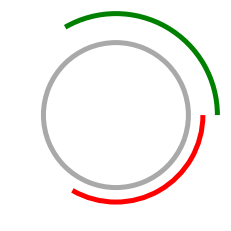

In [2]:
import matplotlib.pyplot as plt
from matplotlib.patches import Arc

# Define the function to draw the arcs
def draw_arcs(r1, t, i, b, c):
    # Initialize figure and axis
    fig, ax = plt.subplots(subplot_kw={'aspect': 'equal'})
    
    # Draw the inner dark gray 360 degree arc
    inner_arc = Arc((0, 0), 2*r1, 2*r1, theta1=0, theta2=360, color='darkgray', linewidth=t, zorder=3)
    ax.add_patch(inner_arc)
    
    # Draw the middle red arc (b degrees, starts from horizontal towards downwards)
    red_arc = Arc((0, 0), 2*(r1+i), 2*(r1+i), theta1=-b, theta2=0, color='red', linewidth=t, zorder=2)
    ax.add_patch(red_arc)
    
    # Draw the outer green arc (c degrees, overlaps with red arc towards upwards)
    green_arc = Arc((0, 0), 2*(r1+2*i), 2*(r1+2*i), theta1=0, theta2=c, color='green', linewidth=t, zorder=1)
    ax.add_patch(green_arc)
    
    # Set limits to keep the ratio and size correct, remove axes
    ax.set_xlim(-r1 - 2*i - t, r1 + 2*i + t)
    ax.set_ylim(-r1 - 2*i - t, r1 + 2*i + t)
    ax.axis('off')

    # Show the plot
    plt.show()

# Parameters
r1 = 50  # Inner radius
t = 5   # Thickness of arcs
i = 10  # Increment for each subsequent radius
b = 120 # Degrees of the red arc
c = 120 # Degrees of the green arc

# Draw the arcs with the given parameters
draw_arcs(r1, t, i, b, c)


In [21]:
def draw_arcs_with_overlap(r1, t, i, r, g, o):
    # Create a new figure
    fig, ax = plt.subplots()

    # Add the inner dark gray arc (360 degree)
    inner_arc = Arc((0, 0), 2*r1, 2*r1, theta1=0, theta2=360, color='darkgray', linewidth=t, zorder=3)
    ax.add_patch(inner_arc)

    # Add the middle red arc (r degree, starts from horizontal towards downwards)
    red_arc = Arc((0, 0), 2*(r1+i), 2*(r1+i), theta1=360-r, theta2=360, color='red', linewidth=t, zorder=2)
    ax.add_patch(red_arc)

    # Calculate start angle for green arc to make it overlap with red arc by o degrees
    #green_start_angle = 360 - r + o
    green_start_angle = 360 - o

    # Add the outer green arc (g degree, starts from the calculated start angle)
    green_arc = Arc((0, 0), 2*(r1+2*i), 2*(r1+2*i), theta1=green_start_angle, theta2=green_start_angle+g, color='limegreen', linewidth=t, zorder=1)
    ax.add_patch(green_arc)

    # Set the limits of the plot to the size of the outermost arc
    ax.set_xlim(-(r1+2*i+t), r1+2*i+t)
    ax.set_ylim(-(r1+2*i+t), r1+2*i+t)

    # Remove the axes
    ax.axis('off')

    # Ensure the aspect ratio is equal to make the arcs circular
    ax.set_aspect('equal')

    # Save the figure as a vector graphic
    vector_filename = r'C:\Users\huash\Desktop\haha.svg'
    plt.savefig(vector_filename, format='svg', transparent=True)
    plt.close(fig)  # Close the figure to prevent it from displaying

    return vector_filename

# Parameters for the arcs
r1 = 50  # Radius of the inner arc
i = 10   # Increment for each subsequent radius
t = 10    # Thickness of the arcs
r = 0.173*360  # Degrees of the red arc
g = 0.305*360  # Degrees of the green arc
o = 0.132*360   # Degrees of overlap between red and green arcs

# Draw the arcs and save the vector illustration
vector_file_path = draw_arcs_with_overlap(r1, t, i, r, g, o)
vector_file_path


'C:\\Users\\huash\\Desktop\\haha.svg'

In [34]:
def draw_arcs_with_overlap(r1, t, i, r, g, o):
    # Create a new figure
    fig, ax = plt.subplots()

    # Add the inner dark gray arc (360 degree)
    inner_arc = Arc((0, 0), 2*r1, 2*r1, theta1=0, theta2=360, color='darkgray', linewidth=t, zorder=3)
    ax.add_patch(inner_arc)

    # Add the middle red arc (r degree, starts from horizontal towards downwards)
    red_arc = Arc((0, 0), 2*(r1+2*i), 2*(r1+2*i), theta1=360-r, theta2=360, color='red', linewidth=t, zorder=2)
    ax.add_patch(red_arc)

    # Calculate start angle for green arc to make it overlap with red arc by o degrees
    #green_start_angle = 360 - r + o
    green_start_angle = 360 - o

    # Add the outer green arc (g degree, starts from the calculated start angle)
    green_arc = Arc((0, 0), 2*(r1+i), 2*(r1+i), theta1=green_start_angle, theta2=green_start_angle+g, color='limegreen', linewidth=t, zorder=1)
    ax.add_patch(green_arc)

    # Set the limits of the plot to the size of the outermost arc
    ax.set_xlim(-(r1+2*i+t), r1+2*i+t)
    ax.set_ylim(-(r1+2*i+t), r1+2*i+t)

    # Remove the axes
    ax.axis('off')

    # Ensure the aspect ratio is equal to make the arcs circular
    ax.set_aspect('equal')

    # Save the figure as a vector graphic
    vector_filename = r'C:\Users\huash\Desktop\haha.svg'
    plt.savefig(vector_filename, format='svg', transparent=True)
    plt.close(fig)  # Close the figure to prevent it from displaying

    return vector_filename

# Parameters for the arcs
r1 = 50  # Radius of the inner arc
i = 10   # Increment for each subsequent radius
t = 10    # Thickness of the arcs
r = 0.054*360  # Degrees of the red arc
g = 0.188*360  # Degrees of the green arc
o = 0.035*360   # Degrees of overlap between red and green arcs

# Draw the arcs and save the vector illustration
vector_file_path = draw_arcs_with_overlap(r1, t, i, r, g, o)
vector_file_path


'C:\\Users\\huash\\Desktop\\haha.svg'

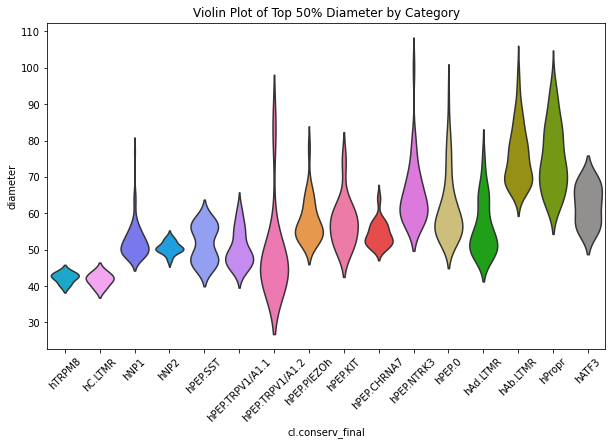

In [1]:
import pandas as pd

data = pd.read_csv("C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Final analysis for publication\human_drg_meta_data_newname.csv")

data['rank'] = data.groupby('cl.conserv_final')['diameter'].rank(ascending=False, method='first')
grouped = data.groupby('cl.conserv_final')
top_50 = grouped.apply(lambda x: x[x['rank'] <= len(x) / 2]).reset_index(drop=True)

import seaborn as sns
import matplotlib.pyplot as plt


category_order = [
    'hTRPM8', 'hC.LTMR', 'hNP1', 'hNP2', 'hPEP.SST',
    'hPEP.TRPV1/A1.1', 'hPEP.TRPV1/A1.2', 'hPEP.PIEZOh', 'hPEP.KIT',
    'hPEP.CHRNA7', 'hPEP.NTRK3', 'hPEP.0', 'hAd.LTMR',
    'hAb.LTMR', 'hPropr', 'hATF3'
]

colors = ['#00b8e7','#FF99FF','#6666FF','#00a9ff','#8494ff','#c77cff','#ff66b2',
          '#ff9933','#ff68a1','#ff3333','#ed68ed','#dcc66e','#0cb702','#aba300',
          '#7cae00','#928e8f']

plt.figure(figsize=(10, 6))
sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',
               order=category_order, palette=colors, inner=None)
plt.title('Violin Plot of Top 50% Diameter by Category')
plt.xticks(rotation=45)
plt.show()



C:\Users\huash\AppData\Local\Temp\ipykernel_29456\1098466094.py:31: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',
C:\Users\huash\AppData\Local\Temp\ipykernel_29456\1098466094.py:31: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',


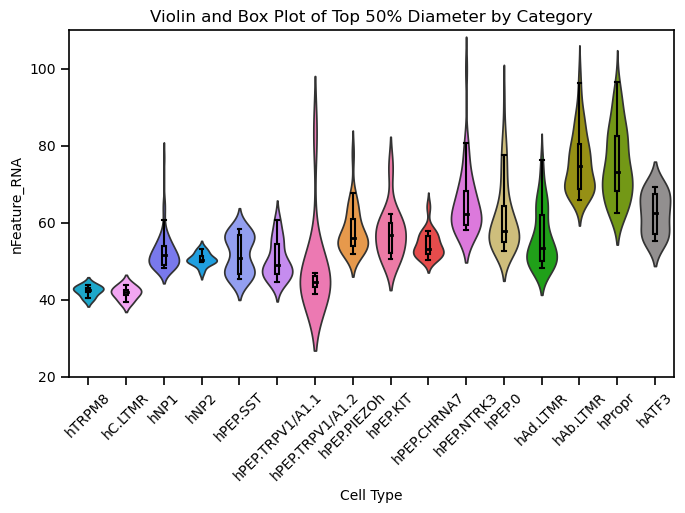

In [11]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.patches as patches

# Load the data
data = pd.read_csv("C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Final analysis for publication\human_drg_meta_data_newname.csv")

# Rank and filter the top 50%
data['rank'] = data.groupby('cl.conserv_final')['diameter'].rank(ascending=False, method='first')
grouped = data.groupby('cl.conserv_final')
top_50 = grouped.apply(lambda x: x[x['rank'] <= len(x) / 2]).reset_index(drop=True)

# Define category order and colors
category_order = [
    'hTRPM8', 'hC.LTMR', 'hNP1', 'hNP2', 'hPEP.SST',
    'hPEP.TRPV1/A1.1', 'hPEP.TRPV1/A1.2', 'hPEP.PIEZOh', 'hPEP.KIT',
    'hPEP.CHRNA7', 'hPEP.NTRK3', 'hPEP.0', 'hAd.LTMR',
    'hAb.LTMR', 'hPropr', 'hATF3'
]

colors = ['#00b8e7','#FF99FF','#6666FF','#00a9ff','#8494ff','#c77cff','#ff66b2',
          '#ff9933','#ff68a1','#ff3333','#ed68ed','#dcc66e','#0cb702','#aba300',
          '#7cae00','#928e8f']

# Create the plot
plt.figure(figsize=(7.8, 4.5))

# Violin plot
sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',
               order=category_order, palette=colors, inner=None)

# Custom box plot
positions = np.arange(len(category_order))
for i, category in enumerate(category_order):
    subset = top_50[top_50['cl.conserv_final'] == category]['diameter']
    if len(subset) > 0:
        quartiles = np.percentile(subset, [25, 50, 75])
        iqr = quartiles[2] - quartiles[0]
        whisker_low = np.min(subset[subset >= quartiles[0] - 1.5 * iqr])
        whisker_high = np.max(subset[subset <= quartiles[2] + 1.5 * iqr])

        # Draw the box
        box = patches.Rectangle((positions[i] - 0.05, quartiles[0]), 0.1, quartiles[2] - quartiles[0],
                                edgecolor='black', facecolor='none', linewidth=1.5)
        plt.gca().add_patch(box)

        # Draw the median line
        plt.plot([positions[i] - 0.05, positions[i] + 0.05], [quartiles[1], quartiles[1]], color='black', linewidth=2)

        # Draw the whiskers
        plt.plot([positions[i], positions[i]], [whisker_low, quartiles[0]], color='black', linewidth=1.5)
        plt.plot([positions[i], positions[i]], [quartiles[2], whisker_high], color='black', linewidth=1.5)

        # Draw the caps
        plt.plot([positions[i] - 0.05, positions[i] + 0.05], [whisker_low, whisker_low], color='black', linewidth=1.5)
        plt.plot([positions[i] - 0.05, positions[i] + 0.05], [whisker_high, whisker_high], color='black', linewidth=1.5)

# Customize the plot
plt.title('Violin and Box Plot of Top 50% Diameter by Category')
plt.xticks(rotation=45)
plt.ylabel('nFeature_RNA')  # Update the y-axis label to reflect the correct feature
plt.xlabel('Cell Type')     # Update the x-axis label for clarity

# Set y-axis limits and ticks
plt.ylim(20, 110)
plt.yticks(np.arange(20, 111, 20))

# Set x-axis limits to move y-axis closer to the first violin plot
plt.xlim(-0.5, len(category_order) - 0.5)

# Thicken the axes and ticks
ax = plt.gca()
ax.spines['top'].set_linewidth(1.2)
ax.spines['right'].set_linewidth(1.2)
ax.spines['left'].set_linewidth(1.2)
ax.spines['bottom'].set_linewidth(1.2)
ax.tick_params(axis='both', width=1.2, length=6)

# Save the plot as an SVG file
plt.savefig(r"C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\F1E-1.svg", format='svg')

# Show the plot
plt.show()


In [13]:
import pandas as pd

# Replace 'path_to_your_file_A.csv' with the actual file path
data = pd.read_csv(r'E:\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Final analysis for publication\human_drg_meta_data_newname.csv')  # Use a raw string for the file path

# Reorder 'cl.conserv_final' based on the provided order
category_order = [
    'hTRPM8', 'hC.LTMR', 'hNP1', 'hNP2', 'hPEP.SST', 'hPEP.TRPV1/A1.1', 'hPEP.TRPV1/A1.2',
    'hPEP.PIEZOh', 'hPEP.KIT', 'hPEP.CHRNA7', 'hPEP.NTRK3', 'hPEP.0', 'hAd.LTMR', 
    'hAb.LTMR', 'hPropr', 'hATF3'
]

# Create a categorical type with the specified order and assign it to 'cl.conserv_final'
data['cl.conserv_final'] = pd.Categorical(data['cl.conserv_final'], categories=category_order, ordered=True)

# Sort the data by 'cl.conserv_final' and then by 'diameter' from small to large
data_sorted = data.sort_values(by=['cl.conserv_final', 'diameter'], ascending=[True, False])

# Save the sorted data to file B
# Replace 'path_to_your_file_B.csv' with the actual file path where you want to save
data_sorted.to_csv(r'path_to_your_file_B.csv', index=False)

# Now, select the top 50% records for each category in 'cl.conserv_final'
top_50_percent = data_sorted.groupby('cl.conserv_final').apply(lambda x: x.head(int(len(x) * 0.5))).reset_index(drop=True)

# Save the top 50% data to file C
# Replace 'path_to_your_file_C.csv' with the actual file path where you want to save
top_50_percent.to_csv(r'path_to_your_file_C.csv', index=False)


In [12]:
top_50_percent 

Unnamed: 0     orig.ident  nCount_RNA  nFeature_RNA  \
0     N3-RL2-174  SeuratProject      126173          4894   
1    N4-RT12-101  SeuratProject       99659          6335   
2    N4-RT12-177  SeuratProject      275989          5526   
3     N3-RL2-171  SeuratProject      283270          9988   
4     N4-RL3-171  SeuratProject      271073          7766   
..           ...            ...         ...           ...   
525   N2-RT12-62  SeuratProject       80158          5866   
526    N2-RL5-92  SeuratProject       69399          6787   
527   N4-RL3-155  SeuratProject      328195         11008   
528    N2-RL5-68  SeuratProject      114459          7217   
529  N2-RT12-181  SeuratProject      155860          9411   

     integrated_snn_res.3.4  seurat_clusters cl.conserv cl.HC.LC.split  \
0                         3                3      TRPM8          TRPM8   
1                         3                3      TRPM8          TRPM8   
2                         3                3      TRPM8          TRPM8   
3                         9                9      TRPM8          TRPM8   
4                        17               17     C.LTMR         C.LTMR   
..                      ...              ...        ...            ...   
525                       2                2      Un.Gi          Un.Gi   
526                       2                2      Un.Gi          Un.Gi   
527                      13               13      Un.Gi          Un.Gi   
528                       0                0      Un.Gi          Un.Gi   
529                       0                0      Un.Gi          Un.Gi   

    cl.Ab.split.3 cl.Ab.split.4   diameter drg_level drg_location  batch  \
0           TRPM8         TRPM8  31.372188    lumbar     lumbar 2      3   
1           TRPM8         TRPM8  31.915383  thoracic  thoracic 12      2   
2           TRPM8         TRPM8  34.668980  thoracic  thoracic 12      3   
3           TRPM8         TRPM8  39.396434    lumbar     lumbar 2      3   
4          C.LTMR        C.LTMR  32.878266    lumbar     lumbar 3      3   
..            ...           ...        ...       ...          ...    ...   
525         Un.Gi         Un.Gi  51.126909  thoracic  thoracic 12      1   
526         Un.Gi         Un.Gi  52.841408    lumbar     lumbar 5      1   
527         Un.Gi         Un.Gi  53.009808    lumbar     lumbar 3      3   
528         Un.Gi         Un.Gi  54.044533    lumbar     lumbar 5      1   
529         Un.Gi         Un.Gi  55.106047  thoracic  thoracic 12      3   

    donor cl.conserv_final  
0      N3           hTRPM8  
1      N4           hTRPM8  
2      N4           hTRPM8  
3      N3           hTRPM8  
4      N4          hC.LTMR  
..    ...              ...  
525    N2            hATF3  
526    N2            hATF3  
527    N4            hATF3  
528    N2            hATF3  
529    N2            hATF3  

[530 rows x 16 columns]

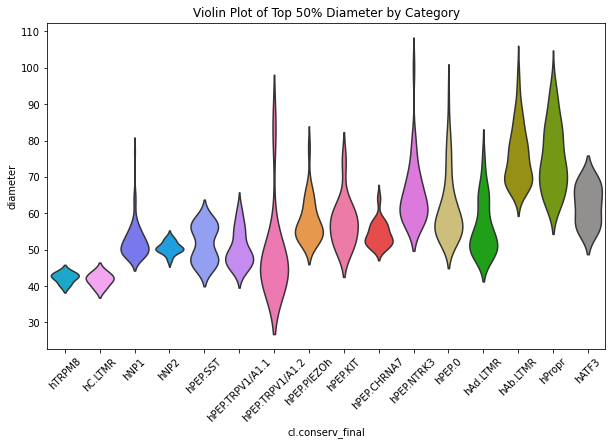

In [23]:
import pandas as pd

data = pd.read_csv(r"C:\Users\huash\Downloads\path_to_your_file_C.csv")


import seaborn as sns
import matplotlib.pyplot as plt


category_order = [
    'hTRPM8', 'hC.LTMR', 'hNP1', 'hNP2', 'hPEP.SST',
    'hPEP.TRPV1/A1.1', 'hPEP.TRPV1/A1.2', 'hPEP.PIEZOh', 'hPEP.KIT',
    'hPEP.CHRNA7', 'hPEP.NTRK3', 'hPEP.0', 'hAd.LTMR',
    'hAb.LTMR', 'hPropr', 'hATF3'
]

colors = ['#00b8e7','#FF99FF','#6666FF','#00a9ff','#8494ff','#c77cff','#ff66b2',
          '#ff9933','#ff68a1','#ff3333','#ed68ed','#dcc66e','#0cb702','#aba300',
          '#7cae00','#928e8f']

plt.figure(figsize=(10, 6))
sns.violinplot(x='cl.conserv_final', y='diameter', data=top_50, scale='width',
               order=category_order, palette=colors, inner=None)
plt.title('Violin Plot of Top 50% Diameter by Category')
plt.xticks(rotation=45)
plt.show()


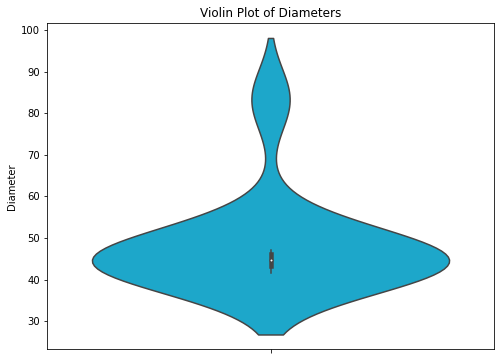

In [29]:

import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Provided data
diameters = [
    83.30159445,52.78113462
,47.04136867
,45.27599477
,44.79537428
,44.68153579
,43.9488842
,43.35091233
,43.14482873
,42.68496011
,41.59726639
]

# Create a DataFrame
data = pd.DataFrame(diameters, columns=['diameter'])

# Generate a violin plot
plt.figure(figsize=(8, 6))
sns.violinplot(y='diameter', data=data, color='#00b8e7')
plt.title('Violin Plot of Diameters')
plt.ylabel('Diameter')
plt.show()


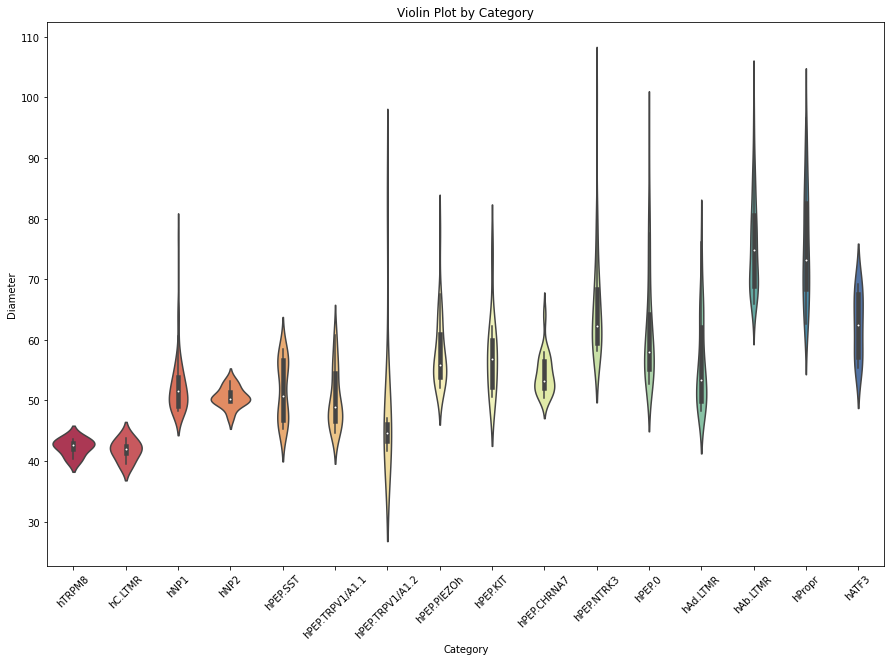

In [27]:

    
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Read the CSV file into a DataFrame
# Replace 'path_to_your_csv_file.csv' with the path to your actual CSV file
data = pd.read_csv(r'C:\Users\huash\Desktop\path_to_your_file_C.csv')

# Define the category order
category_order = [
    'hTRPM8', 'hC.LTMR', 'hNP1', 'hNP2', 'hPEP.SST',
    'hPEP.TRPV1/A1.1', 'hPEP.TRPV1/A1.2', 'hPEP.PIEZOh', 'hPEP.KIT',
    'hPEP.CHRNA7', 'hPEP.NTRK3', 'hPEP.0', 'hAd.LTMR',
    'hAb.LTMR', 'hPropr', 'hATF3'
]

# Ensure that 'cl.conserv_final' is a categorical type with the specified order
data['cl.conserv_final'] = pd.Categorical(data['cl.conserv_final'], categories=category_order, ordered=True)

# Create a violin plot with seaborn
plt.figure(figsize=(15, 10))  # Adjust the size as needed
sns.violinplot(x='cl.conserv_final', y='diameter', data=data, order=category_order, palette='Spectral')

# Customize the plot as needed
plt.xticks(rotation=45)  # Rotate x labels for better readability
plt.title('Violin Plot by Category')
plt.xlabel('Category')
plt.ylabel('Diameter')

# Show the plot
plt.show()

# Optionally, save the plot to a file
# plt.savefig('violin_plot.png')


In [4]:
import pandas as pd

# Load the Excel file
df = pd.read_excel(r'C:\Users\huash\Desktop\GPCR.xlsx')

# Create Dataset A by filtering rows where 'Species' is 'human'
dataset_A = df[df['Species'] == 'Human']
length_A = len(dataset_A)

# Create Dataset B by removing duplicates in 'UniProt' from Dataset A
dataset_B = dataset_A.drop_duplicates(subset='UniProt')
length_B = len(dataset_B)

# Create Dataset C by filtering rows where 'Type' is 'peptide' from Dataset B
dataset_C = dataset_B[dataset_B['Type'] == 'peptide']
length_C = len(dataset_C)

# Print the lengths of datasets
print(f"Length of Dataset A: {length_A}")
print(f"Length of Dataset B: {length_B}")
print(f"Length of Dataset C: {length_C}")


Length of Dataset A: 929
Length of Dataset B: 172
Length of Dataset C: 49


In [5]:
dataset_B

UniProt IUPHAR       Receptor family Cl. Species   Method   PDB  \
0       DRD2     D2              Dopamine   A   Human  Cryo-EM  8IRS   
1       DRD3     D3              Dopamine   A   Human  Cryo-EM  8IRT   
2       DRD5     D5              Dopamine   A   Human  Cryo-EM  8IRV   
3      GPR12  GPR12             A orphans   A   Human  Cryo-EM  7Y3G   
4      P2RY1   P2Y1                   P2Y   A   Human  Cryo-EM  7XXH   
...      ...    ...                   ...  ..     ...      ...   ...   
882     DRD4     D4              Dopamine   A   Human    X-ray  5WIU   
914     PAR2   PAR2  Proteinase-activated   A   Human    X-ray  5NDD   
927     CCR9   CCR9             Chemokine   A   Human    X-ray  5LWE   
980    CXCR4  CXCR4             Chemokine   A   Human    X-ray  4RWS   
1024    PAR1   PAR1  Proteinase-activated   A   Human    X-ray  3VW7   

                              Refined structure  Resolution Preferred chain  \
0     https://gpcrdb.org/structure/refined/8IRS         3.0               R   
1                                             -         2.7               R   
2     https://gpcrdb.org/structure/refined/8IRV         3.1               R   
3     https://gpcrdb.org/structure/refined/7Y3G         2.8               R   
4     https://gpcrdb.org/structure/refined/7XXH         2.9               R   
...                                         ...         ...             ...   
882                                           -         2.0               A   
914   https://gpcrdb.org/structure/refined/5NDD         2.8               A   
927                                           -         2.8               B   
980   https://gpcrdb.org/structure/refined/4RWS         3.1               A   
1024  https://gpcrdb.org/structure/refined/3VW7         2.2               A   

      ...            Type               Function  \
0     ...  small-molecule                Agonist   
1     ...  small-molecule                Agonist   
2     ...  small-molecule                Agonist   
3     ...            none        Apo (no ligand)   
4     ...  small-molecule                Agonist   
...   ...             ...                    ...   
882   ...  small-molecule             Antagonist   
914   ...  small-molecule             Antagonist   
927   ...  small-molecule  Allosteric antagonist   
980   ...         peptide             Antagonist   
1024  ...  small-molecule             Antagonist   

                                                 Name.1          Type.1  \
0                                              dopamine  small-molecule   
1                                              dopamine  small-molecule   
2     5-hydroxytryptamine, noradrenaline, dopamine, ...  small-molecule   
3                               sphingosine 1-phosphate  small-molecule   
4                                              ADP, ATP  small-molecule   
...                                                 ...             ...   
882                                            dopamine  small-molecule   
914                                                   -               -   
927                                               CCL25         peptide   
980   CXCL12, CXCL12ε, CXCL12β, CXCL12φ, CXCL12α, CX...         peptide   
1024                                           thrombin         peptide   

     D2x50 S3x39 Sodium in structure  \
0            Yes                  No   
1            Yes                  No   
2            Yes                  No   
3            Yes                  No   
4            Yes                  No   
...          ...                 ...   
882          Yes                  No   
914          Yes                 Yes   
927           No                  No   
980          Yes                  No   
1024         Yes                  No   

                                                Authors  \
0     Xu P, Huang S, Krumm BE, Zhuang Y, Mao C, Zhan...   
1     Xu P, Huang S, Krumm BE, Zhuang Y, Mao C, Zhan...   
2     X

In [10]:

import pandas as pd

# Load the Excel file into Dataset A
df = pd.read_excel(r'C:\Users\huash\Desktop\TableS1_Human GPCR Ligands.xlsx')  # Replace 'data.xlsx' with your file's path

# Create Dataset B by removing duplicates in 'Gene' column from Dataset A
dataset_B = df.drop_duplicates(subset='Gene')
length_B = len(dataset_B)

# Create Dataset C by filtering rows where 'type' is 'Peptide' from Dataset B
dataset_C = dataset_B[dataset_B['type'] == 'Peptide']
length_C = len(dataset_C)

# Print the lengths of Dataset B and Dataset C
print(f"Length of Dataset B: {length_B}")
print(f"Length of Dataset C: {length_C}")
    
    
    

Length of Dataset B: 231
Length of Dataset C: 118


In [14]:
dataset_C["LigandLength"]

48       7.0
50       7.0
52      13.0
57      27.0
60      27.0
       ...  
520     28.0
537    319.0
542    319.0
543    329.0
546     13.0
Name: LigandLength, Length: 118, dtype: float64

In [15]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' from dataset B
# df = pd.read_csv('your_dataset_file.csv') # Uncomment and modify this line to load your dataset

# Histogram with bin size of 10, displaying the count of occurrences in each bin
plt.hist(dataset_C['LigandLength'], bins=range(0, max(df['LigandLength']) + 10, 10), edgecolor='black')
plt.title('Histogram of LigandLength')
plt.xlabel('LigandLength')
plt.ylabel('Count')
plt.show()


TypeError: 'float' object cannot be interpreted as an integer

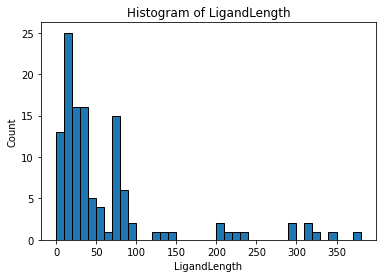

In [18]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have a DataFrame 'df' from dataset B
# df = pd.read_csv('your_dataset_file.csv') # Uncomment and modify this line to load your dataset

# Removing NaN values from 'LigandLength' column
df = dataset_C.dropna(subset=['LigandLength'])

# Convert max value to integer for range function
max_value = int(max(df['LigandLength']))

# Histogram with bin size of 10, displaying the count of occurrences in each bin
plt.hist(df['LigandLength'], bins=range(0, max_value + 10, 10), edgecolor='black')
plt.title('Histogram of LigandLength')
plt.xlabel('LigandLength')
plt.ylabel('Count')
plt.show()


In [8]:
from Bio.PDB import PDBParser, NeighborSearch

def find_interacting_residues(pdb_file, ligand_resname, distance_threshold=4.0):
    try:
        # Parse the PDB file
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure("protein_structure", pdb_file)

        # Find all atoms in the ligand
        ligand_atoms = [atom for atom in structure.get_atoms() if atom.get_parent().get_resname() == ligand_resname]

        # Find all atoms in the protein
        protein_atoms = [atom for atom in structure.get_atoms() if atom.get_parent().get_resname() != ligand_resname]

        # Create a NeighborSearch object
        neighbor_search = NeighborSearch(protein_atoms)

        # Find interactions
        interacting_residues = set()
        for atom in ligand_atoms:
            neighbors = neighbor_search.search(atom.get_coord(), distance_threshold, "R")
            for residue in neighbors:
                if residue.get_resname() != "HOH":  # Check if residue is not water
                    interacting_residues.add(residue)

        # Print the interacting residues
        for residue in interacting_residues:
            print(f"Residue {residue.get_resname()} at position {residue.get_id()[1]} interacts with the ligand.")

    except ValueError as e:
        print(f"Error parsing PDB file: {e}")

# Specify the PDB file and ligand name here
pdb_file_path = r"C:\Users\huash\Desktop\7s8p.pdb"  # Replace with your PDB file path
ligand_name = '8IX'  # Replace with your ligand's three-letter code

find_interacting_residues(pdb_file_path, ligand_name)


Residue LEU at position 98 interacts with the ligand.
Residue TRP at position 158 interacts with the ligand.
Residue TYR at position 250 interacts with the ligand.
Residue LYS at position 96 interacts with the ligand.
Residue VAL at position 99 interacts with the ligand.
Residue TYR at position 254 interacts with the ligand.
Residue ARG at position 95 interacts with the ligand.
Residue ARG at position 82 interacts with the ligand.


In [9]:
from Bio.PDB import PDBParser, NeighborSearch

def find_interacting_residues_with_peptide(pdb_file, peptide_chain_id, distance_threshold=4.0):
    try:
        # Parse the PDB file
        parser = PDBParser(QUIET=True)
        structure = parser.get_structure("protein_structure", pdb_file)

        # Find all atoms in the peptide ligand
        peptide_atoms = [atom for atom in structure.get_atoms() if atom.get_parent().get_parent().id == peptide_chain_id]

        # Find all atoms in the protein excluding the peptide ligand
        protein_atoms = [atom for atom in structure.get_atoms() if atom.get_parent().get_parent().id != peptide_chain_id]

        # Create a NeighborSearch object
        neighbor_search = NeighborSearch(protein_atoms)

        # Find interactions
        interacting_residues = set()
        for atom in peptide_atoms:
            neighbors = neighbor_search.search(atom.get_coord(), distance_threshold, "R")
            for residue in neighbors:
                if residue.get_resname() != "HOH" and residue.get_parent().id != peptide_chain_id:  # Exclude water and the peptide itself
                    interacting_residues.add(residue)

        # Print the interacting residues
        for residue in interacting_residues:
            print(f"Residue {residue.get_resname()} at position {residue.get_id()[1]} interacts with the peptide.")

    except Exception as e:
        print(f"Error: {e}")

# Specify the PDB file and peptide chain identifier here
pdb_file_path = r"C:\Users\huash\Desktop\MRGPRX1.pdb"  # Replace with your PDB file path
peptide_chain_id = 'A'  # Replace with the chain ID of your peptide ligand

find_interacting_residues_with_peptide(pdb_file_path, peptide_chain_id)


Residue TRP at position 158 interacts with the peptide.
Residue PHE at position 250 interacts with the peptide.
Residue PRO at position 100 interacts with the peptide.
Residue LEU at position 240 interacts with the peptide.
Residue HIS at position 243 interacts with the peptide.
Residue TYR at position 99 interacts with the peptide.
Residue HIS at position 254 interacts with the peptide.
Residue ASP at position 177 interacts with the peptide.
Residue CYS at position 173 interacts with the peptide.
Residue CYS at position 161 interacts with the peptide.
Residue GLU at position 157 interacts with the peptide.
Residue LEU at position 249 interacts with the peptide.
Residue TRP at position 241 interacts with the peptide.


In [27]:
from Bio.PDB import PDBParser
from Bio.SeqUtils import seq1

# Define a simple hydrophobicity scale (Kyte & Doolittle)
hydrophobicity_scale = {
    'I': 4.5, 'V': 4.2, 'L': 3.8, 'F': 2.8, 'C': 2.5, 'M': 1.9, 'A': 1.8,
    'G': -0.4, 'T': -0.7, 'S': -0.8, 'W': -0.9, 'Y': -1.3, 'P': -1.6, 'H': -3.2,
    'E': -3.5, 'Q': -3.5, 'D': -3.5, 'N': -3.5, 'K': -3.9, 'R': -4.5
}

def extract_sequence_from_pdb(pdb_file, chain_id):
    parser = PDBParser(QUIET=True)
    structure = parser.get_structure("GPCR", pdb_file)
    sequence = ""

    for model in structure:
        for chain in model:
            if chain.id == chain_id:
                for residue in chain:
                    if residue.id[0] == " " and residue.get_resname() in hydrophobicity_scale:  # Exclude heteroatoms
                        sequence += seq1(residue.get_resname())  # Convert to one-letter code

    return sequence

def predict_transmembrane_regions(sequence, window_size=19, threshold=2.0):
    transmembrane_regions = []
    for i in range(len(sequence) - window_size + 1):
        segment = sequence[i:i + window_size]
        hydrophobicity = sum(hydrophobicity_scale.get(residue, 0) for residue in segment) / window_size

        if hydrophobicity > threshold:
            transmembrane_regions.append((i+1, i + window_size))  # Adjusted for 1-based indexing

    return transmembrane_regions

# Example usage
pdb_file_path = r'C:\Users\huash\Desktop\7s8p.pdb'  # Replace with your PDB file path
chain_id = 'R'  # Replace with the chain ID of the GPCR
sequence = extract_sequence_from_pdb(pdb_file_path, chain_id)
tm_regions = predict_transmembrane_regions(sequence)
print("Predicted transmembrane regions (start-end, 1-based index):", tm_regions)



Predicted transmembrane regions (start-end, 1-based index): []


In [28]:
sequence

''

In [1]:
pip install requests beautifulsoup4


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [14]:

import requests
from bs4 import BeautifulSoup

# URL of the GPCRdb page for a specific protein
url = 'https://gpcrdb.org/protein/mrgx1_human/'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML content
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the <h4> tag that contains the text "SEQUENCE"
    sequence_label = soup.find('h4', text='SEQUENCE')
    
    # Find the <div> tag that presumably contains the sequence
    # You might need to adjust the class name based on the actual HTML
    sequence_container = sequence_label.find_next('div', class_='col-md-5')
    
    # Extract the sequence text
    # Again, you might need to adjust how you extract the text based on the actual HTML
    sequence_text = sequence_container.text.strip() if sequence_container else 'Sequence not found'
    
    # Print the sequence text
    #print(sequence_text)
else:
    print('Failed to retrieve the webpage, status code:', response.status_code)


In [15]:
import re

# Define a dictionary to hold the regions and their sequences
regions = {
    'N-term': '',
    'TM1': '',
    'ICL1': '',
    'TM2': '',
    'ECL1': '',
    'TM3': '',
    'ICL2': '',
    'TM4': '',
    'ECL2': '',
    'TM5': '',
    'ICL3': '',
    'TM6': '',
    'ECL3': '',
    'TM7': '',
    'C-term': ''
}

# Define a list of region names in order
region_names = [
    'N-term', 'TM1', 'ICL1', 'TM2', 'ECL1', 'TM3', 'ICL2', 'TM4', 'ECL2', 'TM5',
    'ICL3', 'TM6', 'ECL3', 'TM7', 'C-term'
]

# Regular expression pattern for finding regions (this will depend on the actual markers)
pattern = '|'.join(region_names)

# Find all matches in the sequence text
matches = re.finditer(pattern, sequence_text)

# Position tracking
position = 1

# Process each match
for match in matches:
    region_name = match.group()
    start_index = match.end()
    try:
        # Look for the next region to find the end of the current region
        next_region = region_names[region_names.index(region_name) + 1]
        end_index = sequence_text.find(next_region, start_index)
        end_index = end_index if end_index != -1 else len(sequence_text)
    except IndexError:
        # This happens if we're at the last region
        end_index = len(sequence_text)
    
    # Extract the sequence for the current region
    region_sequence = sequence_text[start_index:end_index].strip()
    
    # Remove any non-amino acid characters (like spaces, numbers, etc.)
    region_sequence = re.sub(r'[^A-Z]', '', region_sequence)
    
    # Calculate the end position
    end_position = position + len(region_sequence) - 1
    
    # Print the details
    print(f"{region_name}: {region_sequence} ({position}-{end_position})")
    
    # Update the position for the next region
    position = end_position + 1


N-term: MDPTISTLDTELTPINGTEE (1-20)
TM1: TLCYKQTLSLTVLTCIVSLVGLTGNAVVLW (21-50)
ICL1: LLGCRMRRNA (51-60)
TM2: FSIYILNLAAADFLFLSGRLIYSLLSFISI (61-90)
ECL1:  (91-90)
TM3: PHTISKILYPVMMFSYFAGLSFLSAVSTER (91-120)
ICL2: CLSVLWPIWY (121-130)
TM4: RCHRPTHLSAVVCVLLWALSLLRSILEWML (131-160)
ECL2: CGFLFSGADS (161-170)
TM5: AWCQTSDFITVAWLIFLCVVLCGSSLVLLI (171-200)
ICL3: RILCGSRKIP (201-210)
TM6: LTRLYVTILLTVLVFLLCGLPFGIQFFLFL (211-240)
ECL3: WIHVDREVLF (241-250)
TM7: CHVHLVSIFLSALNSSANPIIYFFVGSFRQ (251-280)
C-term: RQNRQNLKLVLQRALQDASEVDEGGGQLPEEILELSGSRLEQ (281-322)


In [1]:
pip install pydicom


     ---------------------------------------- 1.8/1.8 MB 7.0 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
import pydicom

# Load your DICOM file
ds = pydicom.dcmread(r'C:\Users\huash\Desktop\hh.dcm')

# Now you can access DICOM attributes
print(ds.PatientName)
print(ds.Modality)
# etc.


Liu Si Qing
MR


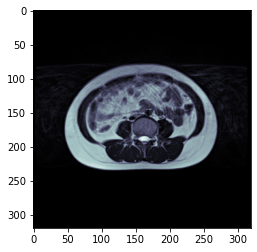

In [5]:
import pydicom
import matplotlib.pyplot as plt

# Replace 'path_to_your_file.dcm' with the path to your DICOM file
ds = pydicom.dcmread(r'C:\Users\huash\Desktop\hh.dcm')

# Use matplotlib to display the image
plt.imshow(ds.pixel_array, cmap=plt.cm.bone)
plt.show()


In [6]:
import xml.etree.ElementTree as ET
import os
import matplotlib.pyplot as plt

def load_image(r"C:\Users\huash\Desktop\1\1.2.826.0.1.3680043.2.1499.47.6702116"):
    # Add your code here to load and return the image data
    # This will depend on the file format (DICOM, NIfTI, etc.)
    pass

# Replace with your MRML file path
mrml_file_path = 'C:\Users\huash\Desktop\1\2024-01-12-Scene.mrml'

# Parse the MRML file
tree = ET.parse(mrml_file_path)
root = tree.getroot()

# Find image file references (this is a simplification and might need adjustment)
image_paths = []
for element in root.findall('.//'):
    if 'path' in element.attrib:
        image_path = element.attrib['path']
        if os.path.exists(image_path):
            image_paths.append(image_path)

# Assuming you have at least one image path, load and display the first image
if image_paths:
    image_data = load_image(image_paths[0])

    # Display the image using matplotlib
    plt.imshow(image_data, cmap='gray')  # Adjust the colormap as needed
    plt.show()
else:
    print("No image paths found in the MRML file")


SyntaxError: invalid syntax (<ipython-input-6-0f4d18b4ed8d>, line 5)

In [8]:
import xml.etree.ElementTree as ET

# Replace with the path to your MRML file
mrml_file_path = r'C:\Users\huash\Desktop\1\2024-01-12-Scene.mrml'

# Parse the MRML file
tree = ET.parse(mrml_file_path)
root = tree.getroot()

# Find elements that might contain image file paths
for element in root.iter():
    for attribute, value in element.attrib.items():
        if 'path' in attribute.lower() or 'file' in attribute.lower():
            print(f"{attribute}: {value}")


fileName: 3%20t2_tse_tra_p2_320.nrrd
fileListMember0: 3%20t2_tse_tra_p2_320.nrrd
defaultWriteFileExtension: nrrd
UseOrientationFromFile: 1
fileName: 8%20t2_blade_sag_p2.nrrd
fileListMember0: 8%20t2_blade_sag_p2.nrrd
defaultWriteFileExtension: nrrd
UseOrientationFromFile: 1
fileName: 9%20t2_tse_cor.nrrd
fileListMember0: 9%20t2_tse_cor.nrrd
defaultWriteFileExtension: nrrd
UseOrientationFromFile: 1
fileName: Segmentation.seg.nrrd
defaultWriteFileExtension: seg.nrrd


In [9]:
pip install numpy matplotlib pynrrd


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


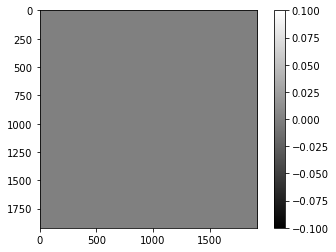

In [15]:
import nrrd
import matplotlib.pyplot as plt

# Replace 'path_to_your_file.nrrd' with the path to your NRRD file
path_to_nrrd = r'C:\Users\huash\Desktop\1\Segmentation.seg.nrrd'

# Read the NRRD file
data, header = nrrd.read(path_to_nrrd)

# Check if the data is multi-dimensional (e.g., 3D or 4D)
if data.ndim > 2:
    # For demonstration, just show the first slice of the 3D data
    slice_to_show = data[:, :, 0]
else:
    slice_to_show = data

# Display the image
plt.imshow(slice_to_show, cmap='gray')  # 'gray' colormap is often used for medical images
plt.colorbar()
plt.show()


In [16]:
pip install pynrrd


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.1.2 -> 23.3.2
[notice] To update, run: python.exe -m pip install --upgrade pip


In [17]:
import nrrd

def summarize_nrrd_header(header):
    summary = {}
    for key, value in header.items():
        data_type = type(value)
        summary[key] = str(data_type)
    return summary

# Replace this with the path to your NRRD file
path_to_nrrd_file = r'C:\Users\huash\Desktop\1\3 t2_tse_tra_p2_320.nrrd'

# Read the NRRD file
data, header = nrrd.read(path_to_nrrd_file)

# Summarize the header
header_summary = summarize_nrrd_header(header)

# Print the summary
print("NRRD Header Summary:")
for key, value in header_summary.items():
    print(f"{key}: {value}")

print("\nFull Header:")
print(header)


NRRD Header Summary:
type: <class 'str'>
dimension: <class 'int'>
space: <class 'str'>
sizes: <class 'numpy.ndarray'>
space directions: <class 'numpy.ndarray'>
kinds: <class 'list'>
endian: <class 'str'>
encoding: <class 'str'>
space origin: <class 'numpy.ndarray'>

Full Header:
OrderedDict([('type', 'unsigned short'), ('dimension', 3), ('space', 'left-posterior-superior'), ('sizes', array([320, 320,  26])), ('space directions', array([[ 1.12466418e+00,  2.74862008e-02, -8.40375000e-12],
       [-2.74862008e-02,  1.12466418e+00,  2.05875000e-13],
       [ 7.77113087e-11, -4.54479449e-15,  1.04000000e+01]])), ('kinds', ['domain', 'domain', 'domain']), ('endian', 'little'), ('encoding', 'gzip'), ('space origin', array([-165.90992146, -169.8862289 , -107.08433533]))])


In [18]:
import nrrd

# Replace with the path to your NRRD file
nrrd_file_path = r'C:\Users\huash\Desktop\1\3 t2_tse_tra_p2_320.nrrd'

# Read the NRRD file
data, header = nrrd.read(nrrd_file_path)

# The number of images (slices) is typically in one of the dimensions of the data
# For 3D data, it's usually the third dimension
if data.ndim == 3:
    num_images = data.shape[2]
    print(f"The NRRD file contains {num_images} images.")
elif data.ndim == 2:
    # If the data is 2D, it's a single image
    print("The NRRD file contains 1 image.")
else:
    print("The NRRD file has a complex structure with more than 3 dimensions.")


The NRRD file contains 26 images.


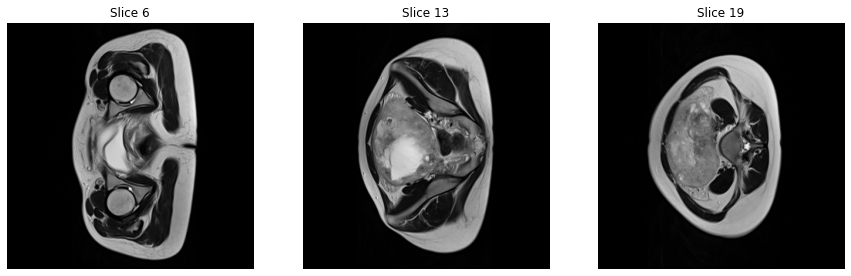

In [20]:
import nrrd
import matplotlib.pyplot as plt

# Replace this with the path to your NRRD file
nrrd_file_path = r'C:\Users\huash\Desktop\1\3 t2_tse_tra_p2_320.nrrd'

# Read the NRRD file
data, header = nrrd.read(nrrd_file_path)

# Check if the data is 3D
if data.ndim == 3:
    # Determine the number of slices to display
    num_slices = data.shape[2]
    slices_to_display = [num_slices // 4, num_slices // 2, 3 * num_slices // 4]  # Displaying 3 slices as an example

    # Plot the slices
    fig, axes = plt.subplots(1, 3, figsize=(15, 5))
    for i, slice_index in enumerate(slices_to_display):
        axes[i].imshow(data[:, :, slice_index], cmap='gray')
        axes[i].set_title(f'Slice {slice_index}')
        axes[i].axis('off')
    plt.show()

elif data.ndim == 2:
    # If the data is 2D, just display the single image
    plt.imshow(data, cmap='gray')
    plt.axis('off')
    plt.show()

else:
    print("The NRRD file has a complex structure with more than 3 dimensions or is not an image.")



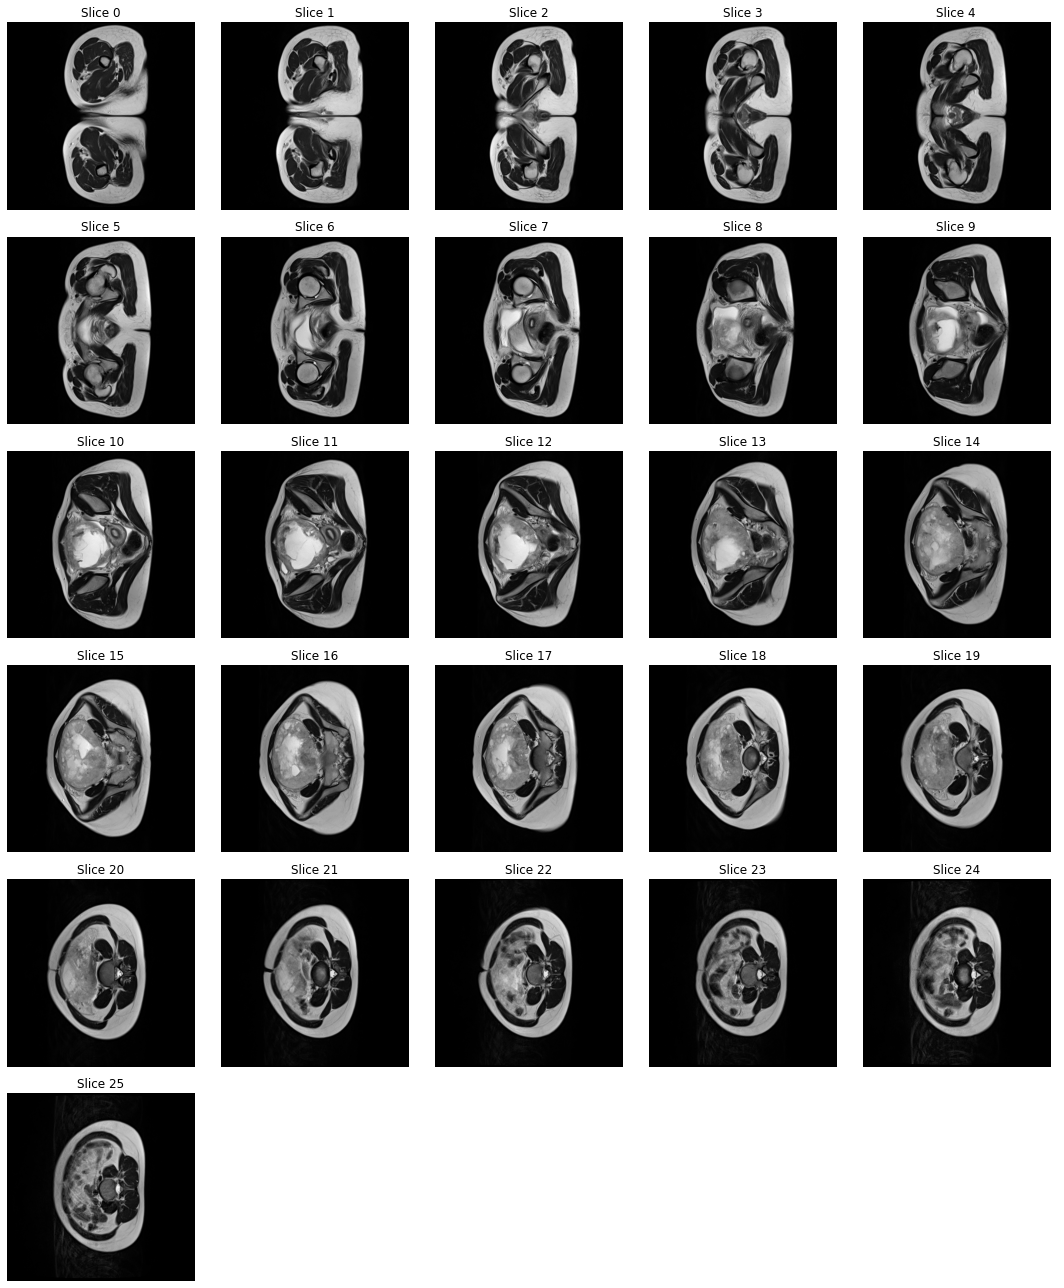

In [21]:
import nrrd
import matplotlib.pyplot as plt
import math

# Replace this with the path to your NRRD file
nrrd_file_path = r'C:\Users\huash\Desktop\1\3 t2_tse_tra_p2_320.nrrd'

# Read the NRRD file
data, header = nrrd.read(nrrd_file_path)

# Check if the data is 3D
if data.ndim == 3:
    # Number of slices
    num_slices = data.shape[2]

    # Calculate rows and columns for subplots
    cols = int(math.sqrt(num_slices))
    rows = math.ceil(num_slices / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    # Plot each slice
    for i in range(num_slices):
        axes[i].imshow(data[:, :, i], cmap='gray')
        axes[i].set_title(f'Slice {i}')
        axes[i].axis('off')

    # Hide any unused subplots
    for i in range(num_slices, len(axes)):
        axes[i].axis('off')

    plt.tight_layfout()
    plt.show()

elif data.ndim == 2:
    # If the data is 2D, just display the single image
    plt.imshow(data, cmap='gray')
    plt.axis('off')
    plt.show()

else:
    print("The NRRD file has a complex structure with more than 3 dimensions or is not an image.")


In [22]:
import xml.etree.ElementTree as ET
import nrrd
import matplotlib.pyplot as plt

def parse_mrml_for_annotations(mrml_file_path):
    # Parse the MRML file and extract annotation data
    # This is a placeholder function and needs to be implemented
    return annotation_data

def overlay_annotations_on_image(image, annotations):
    # Overlay the annotations on the image
    # This is a placeholder function and needs to be implemented
    pass

# Paths to your MRML and NRRD files
mrml_file_path = r'C:\Users\huash\Desktop\1\2024-01-12-Scene.mrml'
nrrd_file_path = r'C:\Users\huash\Desktop\1\3 t2_tse_tra_p2_320.nrrd'

# Parse MRML file for annotations (this requires custom implementation)
annotation_data = parse_mrml_for_annotations(mrml_file_path)

# Read the NRRD file
data, header = nrrd.read(nrrd_file_path)

# Assuming data is a 3D NRRD file and you want to display a single slice
slice_index = 0  # Example slice index
slice_data = data[:, :, slice_index]

# Overlay annotations on the slice (this requires custom implementation)
overlay_annotations_on_image(slice_data, annotation_data)

# Display the annotated slice
plt.imshow(slice_data, cmap='gray')
plt.show()


NameError: name 'annotation_data' is not defined

In [24]:
import xml.etree.ElementTree as ET

def extract_annotations(mrml_file_path):
    # Parse the XML file
    tree = ET.parse(mrml_file_path)
    root = tree.getroot()

    annotations = []

    # Depending on the structure of your MRML file, you might need to change this
    # Here we look for elements that might be annotations
    for annotation in root.findall('.//Annotation'):
        details = {}
        for attribute, value in annotation.items():
            details[attribute] = value
        annotations.append(details)

    return annotations

# Replace with the path to your MRML file
mrml_file_path =  r'C:\Users\huash\Desktop\1\2024-01-12-Scene.mrml'

# Extract annotations
annotations = extract_annotations(mrml_file_path)

# Print extracted annotations
for i, annotation in enumerate(annotations, start=1):
    print(f"Annotation {i}:")
    for key, value in annotation.items():
        print(f"  {key}: {value}")
    print()


Unique segmentation labels: [0 1]


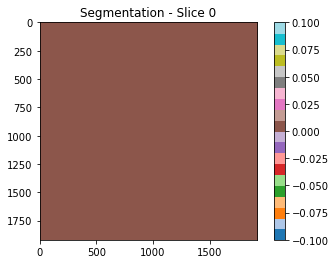

In [25]:
import nrrd
import numpy as np
import matplotlib.pyplot as plt

# Replace this with the path to your NRRD file
nrrd_file_path =  r'C:\Users\huash\Desktop\1\Segmentation.seg.nrrd'

# Read the NRRD file
segmentation_data, header = nrrd.read(nrrd_file_path)

# Check unique values in the segmentation data
# Each unique value represents a different segment
unique_segments = np.unique(segmentation_data)
print("Unique segmentation labels:", unique_segments)

# Visualize one slice of the segmentation data
# Adjust the slice index as needed
slice_index = 0
plt.imshow(segmentation_data[:, :, slice_index], cmap='tab20')
plt.colorbar()
plt.title(f'Segmentation - Slice {slice_index}')
plt.show()


In [1]:
import nrrd
import numpy as np

def find_segment_coordinates(segmentation_data, label):
    coords = []
    for z in range(segmentation_data.shape[2]):
        for y in range(segmentation_data.shape[1]):
            for x in range(segmentation_data.shape[0]):
                if segmentation_data[x, y, z] == label:
                    coords.append((x, y, z))
    return coords

# Replace this with the path to your segmentation NRRD file
nrrd_file_path = r'C:\Users\huash\Desktop\1\Segmentation.seg.nrrd'

# Read the NRRD file
segmentation_data, header = nrrd.read(nrrd_file_path)

# Find unique segments
unique_segments = np.unique(segmentation_data)

# Process each segment
segment_coordinates = {}
for label in unique_segments:
    print(f"Processing label {label}...")
    segment_coordinates[label] = find_segment_coordinates(segmentation_data, label)

# Print or process the segment coordinates
for label, coords in segment_coordinates.items():
    print(f"Segment {label} has {len(coords)} coordinates.")
    # Print first 10 coordinates for brevity
    print("First 10 coordinates:", coords[:10])


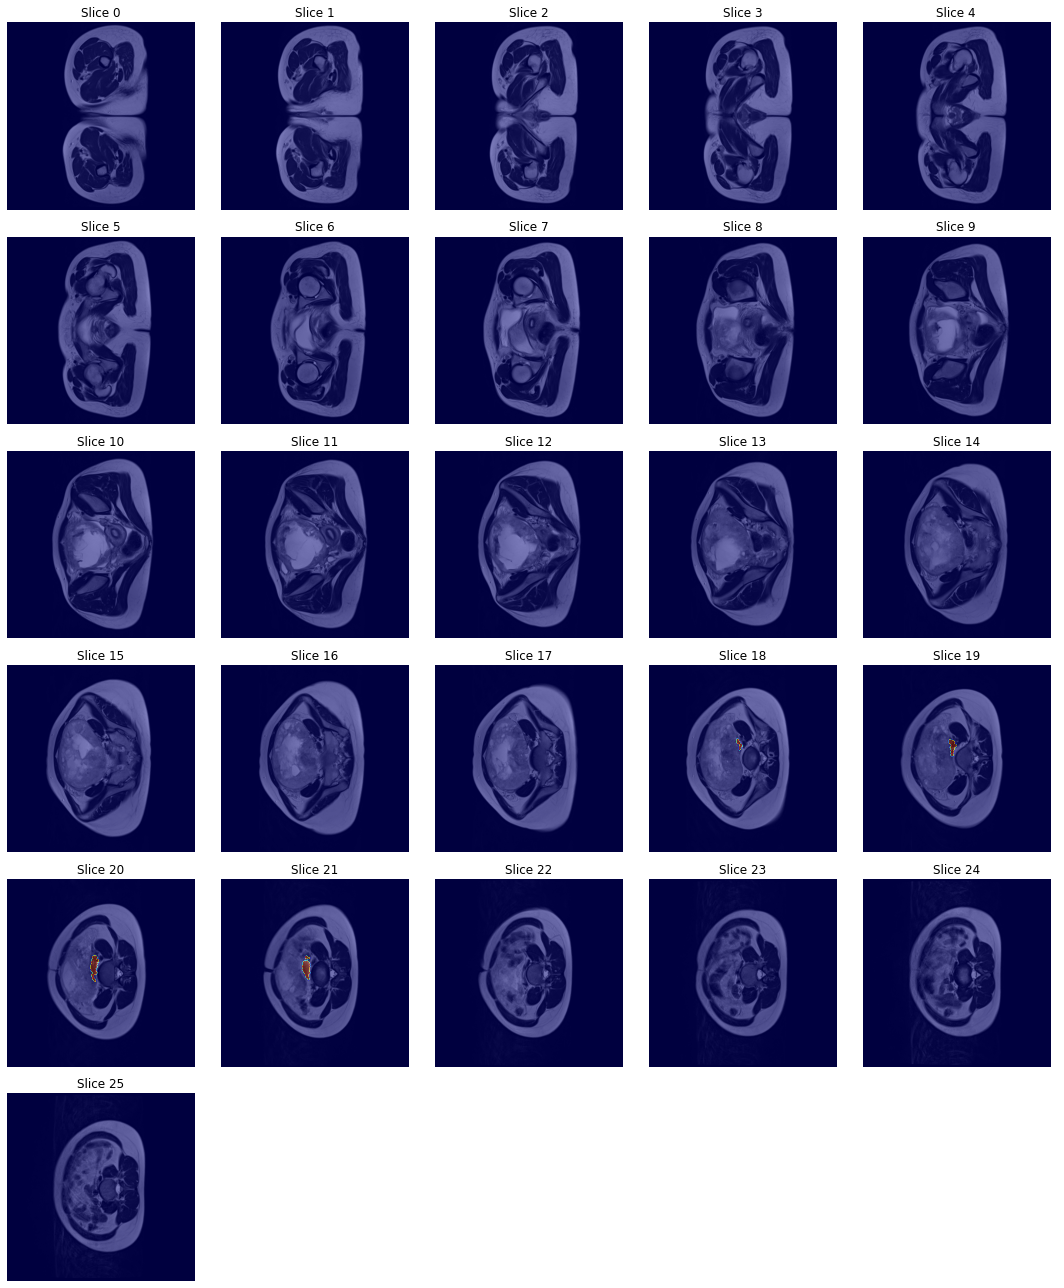

In [2]:
import nrrd
import matplotlib.pyplot as plt
import math
from scipy.ndimage import zoom

# Replace these with the paths to your NRRD files
image_nrrd_file_path = r'C:\Users\huash\Desktop\1\3 t2_tse_tra_p2_320.nrrd'
segmentation_nrrd_file_path = r'C:\Users\huash\Desktop\1\Segmentation.seg.nrrd'

# Read the image and segmentation data
image_data, _ = nrrd.read(image_nrrd_file_path)
segmentation_data, _ = nrrd.read(segmentation_nrrd_file_path)

# Resample the segmentation data to match the image data resolution (if needed)
scale_factor = (image_data.shape[0] / segmentation_data.shape[0], 
                image_data.shape[1] / segmentation_data.shape[1],
                image_data.shape[2] / segmentation_data.shape[2])
resampled_segmentation = zoom(segmentation_data, scale_factor, order=0)

# Check if the data is 3D
if image_data.ndim == 3:
    # Number of slices
    num_slices = image_data.shape[2]

    # Calculate rows and columns for subplots
    cols = int(math.sqrt(num_slices))
    rows = math.ceil(num_slices / cols)

    # Create subplots
    fig, axes = plt.subplots(rows, cols, figsize=(cols * 3, rows * 3))

    # Flatten axes array for easy indexing
    axes = axes.flatten()

    # Plot each slice with segmentation overlay
    for i in range(num_slices):
        axes[i].imshow(image_data[:, :, i], cmap='gray')  # Original image
        axes[i].imshow(resampled_segmentation[:, :, i], cmap='jet', alpha=0.5)  # Segmentation overlay
        axes[i].set_title(f'Slice {i}')
        axes[i].axis('off')

    # Hide any unused subplots
    for i in range(num_slices, len(axes)):
        axes[i].axis('off')

    plt.tight_layout()
    plt.show()

elif image_data.ndim == 2:
    # If the data is 2D, just display the single image with segmentation
    plt.imshow(image_data, cmap='gray')
    plt.imshow(resampled_segmentation, cmap='jet', alpha=0.5)
    plt.axis('off')
    plt.show()

else:
    print("The NRRD file has a complex structure with more than 3 dimensions or is not an image.")


In [3]:
from PIL import Image
import numpy as np

# Load the image
image_path = r'E:\Lab work during Ph.D\签证相关材料\NIW\Evidence\Diploma for B.S. degree_Chinese.png'
image = Image.open(image_path)

# Convert the image to a numpy array
image_data = np.array(image)

# Assuming that the content to be removed is not of the same color as the background,
# we could try to find the most common color (the background) and set all other colors to that color.
def remove_contents(image_data):
    # Find the most common color, which is likely to be the background
    colors, counts = np.unique(image_data.reshape(-1, 3), axis=0, return_counts=True)
    background_color = colors[counts.argmax()]

    # Create a mask where all pixels that are not the background color are set to True
    content_mask = (image_data != background_color).any(axis=-1)

    # Set all content pixels to the background color
    image_data[content_mask] = background_color

    return image_data

# Remove contents from the image
clean_image_data = remove_contents(image_data)

# Convert the numpy array back to an image
clean_image = Image.fromarray(clean_image_data)

# Save the clean image
clean_image_path = r'E:\Lab work during Ph.D\签证相关材料\NIW\Evidence\Diploma for B.S. degree_Chinese_background.png'
clean_image.save(clean_image_path)
clean_image_path


'E:\\Lab work during Ph.D\\签证相关材料\\NIW\\Evidence\\Diploma for B.S. degree_Chinese_background.png'

In [5]:
from PIL import Image
import numpy as np

# Load the image
image_path = r'E:\Lab work during Ph.D\签证相关材料\NIW\Evidence\Diploma for B.S. degree_Chinese.png'
image = Image.open(image_path)

# Convert the image to a numpy array
image_data = np.array(image)

# The strategy will be to identify the background pattern color range and keep it,
# setting all other colors to the most common background color.

def find_background_color(image_data):
    # Flatten the image array and count unique colors
    colors, counts = np.unique(image_data.reshape(-1, 3), axis=0, return_counts=True)
    # The background color is the most common color
    background_color = colors[counts.argmax()]
    return background_color

def remove_contents_keep_background(image_data, background_color):
    # Set a tolerance range to determine the range of colors that are considered 'background'
    tolerance = 50
    # Create a mask where all pixels that fall within the background color +/- tolerance are False
    mask = np.abs(image_data - background_color).sum(axis=2) > tolerance

    # Create a new array filled with the background color
    clean_image_data = np.full(image_data.shape, background_color, dtype=np.uint8)

    # Where the mask is False, keep the original background pixels
    clean_image_data[~mask] = image_data[~mask]

    return clean_image_data

# Find the background color
background_color = find_background_color(image_data)

# Remove contents from the image while keeping the background
clean_image_data = remove_contents_keep_background(image_data, background_color)

# Convert the numpy array back to an image
clean_image = Image.fromarray(clean_image_data)

# Save the clean image
clean_image_path = r'E:\Lab work during Ph.D\签证相关材料\NIW\Evidence\Diploma for B.S. degree_Chinese_background.png'
clean_image.save(clean_image_path)
clean


NameError: name 'clean' is not defined

In [11]:
from PIL import Image
import numpy as np

# Load the image
image_path = r'E:\Lab work during Ph.D\签证相关材料\NIW\Evidence\Diploma for B.S. degree_Chinese.png'
image = Image.open(image_path).convert("RGBA")

# Convert the image to a numpy array
image_data = np.array(image)

# Define the range for black or gray colors.
# Black or gray colors have very low saturation and value in the HSV color space.
# We will consider colors with value less than 128 (in the range 0-255) as black or gray.
black_gray_threshold = 220

# Convert the image to HSV color space
image_hsv = image.convert('HSV')
image_data_hsv = np.array(image_hsv)

# Create a mask for pixels where the value (V channel) is less than the black_gray_threshold
black_gray_mask = image_data_hsv[:, :, 2] < black_gray_threshold

# We assume that the background is not black or gray and take a pixel from the top-left corner as the background color.
background_pixel = image_data[0, 0]

# Replace black/gray pixels with the background color
image_data[black_gray_mask] = background_pixel

# Convert the numpy array back to an image
cleaned_image = Image.fromarray(image_data)

# Save the cleaned image
cleaned_image_path = r'E:\Lab work during Ph.D\签证相关材料\NIW\Evidence\Diploma for B.S. degree_Chinese_background.png'
cleaned_image.save(cleaned_image_path)

cleaned_image_path


'E:\\Lab work during Ph.D\\签证相关材料\\NIW\\Evidence\\Diploma for B.S. degree_Chinese_background.png'

In [15]:
import tifffile as tf


# Correct the file path according to the uploaded file with the .tif format.
# The file ID is given but we need to use the correct file path with extension.
# Let's try with the '.tif' extension as mentioned in the user's request.
file_path = r'F:\20240207__003717__human_DRG_TG\output-XETG00171__0018220__Region_1__20240207__003742\morphology_mip.ome.tif'

# Open the TIFF file and extract the first image
with tf.TiffFile(file_path) as tif:
    first_image_data = tif.pages[0].asarray()

# Save the first image to disk
output_path = r'F:\20240207__003717__human_DRG_TG\output-XETG00171__0018220__Region_1__20240207__003742\morphology_mip.extracted.tif'
tf.imwrite(output_path, first_image_data)

output_path


'F:\\20240207__003717__human_DRG_TG\\output-XETG00171__0018220__Region_1__20240207__003742\\morphology_mip.extracted.tif'

In [20]:
from PIL import Image
import pytesseract
import json

# Reload the image from file
file_path = r'C:\Users\huash\Desktop\image.png'
img = Image.open(file_path)

# Use tesseract to do OCR on the image
text = pytesseract.image_to_string(img)

# Since the content is expected to be JSON, we try to convert it to a JSON object
try:
    # Convert text to a JSON object
    json_data = json.loads(text)

    # Save the extracted JSON data to a .json file
    json_file_path = 'F:\20240207__003717__human_DRG_TG\output-XETG00171__0018220__Region_1__20240207__003742\cell_segmentation.json'
    with open(json_file_path, 'w') as file:
        json.dump(json_data, file, indent=4)

except json.JSONDecodeError:
    # If an error occurs, the text might not be valid JSON
    json_file_path = "Error: The extracted text is not valid JSON."

json_file_path


TesseractNotFoundError: tesseract is not installed or it's not in your PATH. See README file for more information.

<class 'dict'> {'geometries': [{'coordinates': [[[2632.8555, 2711.929], [2630.9707, 2697.679], [2633.4443, 2691.5674], [2630.9336, 2691.0908], [2625.2727, 2689.1267], [2621.9438, 2693.3508], [2615.8438, 2703.3225], [2614.8748, 2710.2974], [2626.3462, 2716.6436], [2629.9744, 2722.7876], [2636.4927, 2726.3645], [2639.032, 2730.4973], [2638.594, 2734.4314], [2642.9517, 2728.0024], [2641.3303, 2722.8342], [2639.9348, 2714.3005], [2632.8555, 2711.929]]], 'type': 'Polygon', 'cell': 719}, {'coordinates': [[[2617.2842, 3377.0684], [2621.9568, 3359.8364], [2622.7969, 3358.9666], [2624.8447, 3356.6228], [2636.8013, 3356.716], [2636.7988, 3355.14], [2633.5083, 3352.02], [2633.5938, 3345.4482], [2635.664, 3337.4717], [2644.4023, 3335.011], [2650.0771, 3336.7085], [2645.8406, 3332.163], [2645.6338, 3330.8772], [2645.9253, 3319.916], [2649.1658, 3318.8076], [2648.2493, 3311.7334], [2644.144, 3309.6274], [2643.377, 3309.6716], [2639.8706, 3308.3806], [2638.0066, 3306.8086], [2632.4592, 3296.4158], [2

TypeError: string indices must be integers

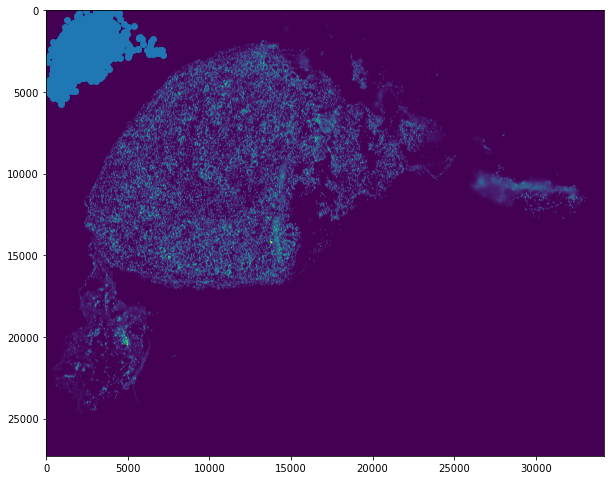

In [23]:
import json
import pandas as pd
from PIL import Image, ImageFile
import matplotlib.pyplot as plt
from matplotlib.patches import Polygon
from matplotlib.widgets import Slider
import tkinter as tk
from tkinter import filedialog
from PIL import Image, ImageTk
import json


# Load the TIFF image
def load_image(image_path):
    # Bypass the image size limit
    Image.MAX_IMAGE_PIXELS = None
    # This is an alternative way to bypass the DecompressionBombWarning
    ImageFile.LOAD_TRUNCATED_IMAGES = True
    
    img = Image.open(image_path)
    return img

# Parse the JSON file for cell segmentation
def load_segmentation(json_path):
    with open(json_path, 'r') as file:
        data = json.load(file)
    print(type(data), data)  # Add this line for debugging
    return data

# Read CSV for spatial sequencing results
def load_spatial_data(csv_path):
    return pd.read_csv(csv_path)

# Overlay transcript dots on the image
def plot_transcripts(ax, spatial_data, gene_name):
    gene_data = spatial_data[spatial_data['feature_name'] == gene_name]
    ax.scatter(gene_data['x_location'], gene_data['y_location'], label=gene_name)

# Overlay cell segmentation on the image
def plot_segmentation(ax, segmentation_data):
    for cell in segmentation_data:
        polygon = Polygon(cell['coordinates'], closed=True, fill=None, edgecolor='red')
        ax.add_patch(polygon)

# Display the image
def display_image(image, spatial_data, segmentation_data, genes_to_display):
    fig, ax = plt.subplots(figsize=(10, 10))
    ax.imshow(image)
    
    for gene in genes_to_display:
        plot_transcripts(ax, spatial_data, gene)
    
    plot_segmentation(ax, segmentation_data)
    
    plt.show()

# Example usage
image_path = r'F:\20240207__003717__human_DRG_TG\output-XETG00171__0018220__Region_1__20240207__003742\morphology_mip.extracted.tif'
json_path = r'F:\20240207__003717__human_DRG_TG\output-XETG00171__0018220__Region_1__20240207__003742\segmentation_polygons.json'
csv_path = r'F:\20240207__003717__human_DRG_TG\output-XETG00171__0018220__Region_1__20240207__003742\transcripts.csv'

img = load_image(image_path)
segmentation_data = load_segmentation(json_path)
spatial_data = load_spatial_data(csv_path)

genes_to_display = ['SYP']  # replace with actual gene names
display_image(img, spatial_data, segmentation_data, genes_to_display)


In [4]:
import tkinter as tk
from tkinter import filedialog, messagebox
from PIL import Image, ImageTk
import json
import pandas as pd
from PIL import Image, ImageTk, ImageFile

from tkinter import filedialog, Canvas, NW
from PIL import Image, ImageTk, ImageSequence

# GUI Application
class GeneSegmentationApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Gene Segmentation GUI")
        self.image_panel = None
        self.img = None
        self.segmentation_data = None
        self.spatial_data = None

        # Add menu options
        menu_bar = tk.Menu(self)
        file_menu = tk.Menu(menu_bar, tearoff=0)
        file_menu.add_command(label="Open Image", command=self.load_image)
        file_menu.add_command(label="Load Segmentation Data", command=self.load_segmentation)
        file_menu.add_command(label="Load Spatial Data", command=self.load_spatial_data)
        file_menu.add_separator()
        file_menu.add_command(label="Exit", command=self.quit)
        menu_bar.add_cascade(label="File", menu=file_menu)
        self.config(menu=menu_bar)

        # Gene selection listbox
        self.gene_listbox = tk.Listbox(self)
        self.gene_listbox.pack(side=tk.LEFT, fill=tk.BOTH, expand=True)

        # Update display button
        update_display_button = tk.Button(self, text="Update Display", command=self.update_display)
        update_display_button.pack(side=tk.LEFT)

        # Save corrections button
        save_corrections_button = tk.Button(self, text="Save Corrections", command=self.save_corrections)
        save_corrections_button.pack(side=tk.LEFT)


    def load_image(self):
        file_path = filedialog.askopenfilename()
        if not file_path:
            return
        
        self.img = Image.open(file_path)
        tk_img = ImageTk.PhotoImage(self.img)

        if self.image_panel is None:
            # Create a canvas with horizontal and vertical scrollbars
            canvas = Canvas(self)
            canvas.create_image(0, 0, image=tk_img, anchor=NW)
            canvas.image = tk_img

            hbar = tk.Scrollbar(self, orient=tk.HORIZONTAL)
            hbar.pack(side=tk.BOTTOM, fill=tk.X)
            hbar.config(command=canvas.xview)

            vbar = tk.Scrollbar(self, orient=tk.VERTICAL)
            vbar.pack(side=tk.RIGHT, fill=tk.Y)
            vbar.config(command=canvas.yview)

            canvas.config(width=tk_img.width(), height=tk_img.height())
            canvas.config(xscrollcommand=hbar.set, yscrollcommand=vbar.set)
            canvas.pack(side=tk.LEFT, expand=True, fill=tk.BOTH)

            self.image_panel = canvas
        else:
            self.image_panel.create_image(0, 0, image=tk_img, anchor=NW)
            self.image_panel.image = tk_img
            self.image_panel.config(scrollregion=self.image_panel.bbox(tk.ALL))
        



    def load_image(self):
        file_path = filedialog.askopenfilename(filetypes=[("TIF files", "*.tif"), ("TIFF files", "*.tiff")])
        if not file_path:
            return
        
        # Increase the maximum number of pixels PIL will process to accommodate large images.
        Image.MAX_IMAGE_PIXELS = None
        ImageFile.LOAD_TRUNCATED_IMAGES = True

        try:
            # Open the TIF image with Pillow
            self.img = Image.open(file_path)
            
            # Convert to a format Tkinter can handle
            self.img = self.img.convert('RGB')
            
            # Create a PhotoImage (might still fail if the image is too large)
            self.tk_img = ImageTk.PhotoImage(self.img)

            # Create a canvas with scrollbars to display the image
            if self.image_panel is None:
                self.create_scrollable_image()
            else:
                self.update_scrollable_image()

        except (OSError, tk.TclError) as e:
            messagebox.showerror("Error", f"Failed to load the image: {e}")

    def create_scrollable_image(self):
        self.canvas = tk.Canvas(self, width=800, height=600)
        self.canvas.create_image(0, 0, image=self.tk_img, anchor=NW)
        self.canvas.image = self.tk_img

        # Scrollbars
        self.hbar = tk.Scrollbar(self, orient='horizontal', command=self.canvas.xview)
        self.hbar.pack(side='bottom', fill='x')
        self.vbar = tk.Scrollbar(self, orient='vertical', command=self.canvas.yview)
        self.vbar.pack(side='right', fill='y')

        self.canvas.config(xscrollcommand=self.hbar.set, yscrollcommand=self.vbar.set)
        self.canvas.pack(side='left', fill='both', expand=True)

        self.image_panel = self.canvas

    def update_scrollable_image(self):
        self.image_panel.create_image(0, 0, image=self.tk_img, anchor=NW)
        self.image_panel.image = self.tk_img
        self.image_panel.config(scrollregion=self.image_panel.bbox(tk.ALL))




    def load_segmentation(self):
        file_path = filedialog.askopenfilename(filetypes=[("JSON files", "*.json")])
        if not file_path:
            return

        with open(file_path, 'r') as file:
            self.segmentation_data = json.load(file)
        messagebox.showinfo("Load Segmentation", "Segmentation data loaded successfully.")

    def load_spatial_data(self):
        file_path = filedialog.askopenfilename(filetypes=[("CSV files", "*.csv")])
        if not file_path:
            return

        self.spatial_data = pd.read_csv(file_path)
        messagebox.showinfo("Load Spatial Data", "Spatial data loaded successfully.")

    def update_display(self):
        # Placeholder for function to update the image display based on selected genes
        messagebox.showinfo("Update Display", "Display updated (placeholder function).")

    def save_corrections(self):
        # Placeholder for function to save any corrections made to the segmentation data
        messagebox.showinfo("Save Corrections", "Corrections saved (placeholder function).")

# Run the application
if __name__ == "__main__":
    app = GeneSegmentationApp()
    app.mainloop()

Exception in Tkinter callback
Traceback (most recent call last):
  File "D:\Software\Anaconda3\lib\tkinter\__init__.py", line 1892, in __call__
    return self.func(*args)
  File "<ipython-input-4-7cdc201a2428>", line 97, in load_image
    self.tk_img = ImageTk.PhotoImage(self.img)
  File "D:\Software\Anaconda3\lib\site-packages\PIL\ImageTk.py", line 115, in __init__
    self.paste(image)
  File "D:\Software\Anaconda3\lib\site-packages\PIL\ImageTk.py", line 170, in paste
    block = image.new_block(self.__mode, im.size)
MemoryError


KeyboardInterrupt: 

In [12]:
import tkinter as tk
from tkinter import Canvas, filedialog
from PIL import Image, ImageTk
from tkinter import filedialog, Menu

class Tile:
    def __init__(self, image, x, y):
        self.image = image  # The image tile
        self.x = x          # The x-coordinate of the tile
        self.y = y          # The y-coordinate of the tile

class TiledImageCanvas(Canvas):
    def __init__(self, master, **kwargs):
        super().__init__(master, **kwargs)
        self.bind("<Configure>", self.on_resize)
        self.bind("<MouseWheel>", self.on_zoom)

        self.tiles = []  # List to hold the tiles
        self.image = None  # The full image (only for reference, not to display)
        self.zoom_level = 1  # Current zoom level

    def set_image(self, image_path):
        self.image = Image.open(image_path)
        self.load_tiles()

    def load_tiles(self):
        """Load image tiles according to the current size and zoom level."""
        # Here you would load the tiles you need to display.
        # You need to define how you want to split your image into tiles.
        pass

    def on_resize(self, event):
        """Handle the canvas resize event."""
        self.load_tiles()

    def on_zoom(self, event):
        """Handle zoom with the mouse wheel."""
        if event.delta > 0:
            self.zoom_level *= 1.1  # Zoom in
        else:
            self.zoom_level /= 1.1  # Zoom out

        self.load_tiles()  # Reload tiles for the new zoom level

    def display_tiles(self):
        """Display the current tiles on the canvas."""
        for tile in self.tiles:
            tk_tile = ImageTk.PhotoImage(tile.image.resize( ... ))  # Resize according to the zoom level
            self.create_image(tile.x, tile.y, image=tk_tile)
            self.image = tk_tile  # Keep a reference to avoid garbage collection


class GeneSegmentationApp(tk.Tk):
    def __init__(self):
        super().__init__()
        self.title("Gene Segmentation GUI")

        # Create a menu bar
        menubar = Menu(self)
        self.config(menu=menubar)

        # Create a file menu
        file_menu = Menu(menubar, tearoff=0)
        file_menu.add_command(label="Open Image", command=self.load_image)
        file_menu.add_separator()
        file_menu.add_command(label="Exit", command=self.quit)

        # Add the file menu to the menu bar
        menubar.add_cascade(label="File", menu=file_menu)

        # Rest of the initialization code

    def load_image(self):
        file_path = filedialog.askopenfilename()  # Open the file dialog
        if file_path:  # If a file was selected
            print(f"File selected: {file_path}")  # For debugging purposes
            # Here you should implement loading and displaying the image
            # For now, we're just printing the selected file path

# Run the application
if __name__ == "__main__":
    app = GeneSegmentationApp()
    app.mainloop()


File selected: F:/20240207__003717__human_DRG_TG/output-XETG00171__0018220__Region_1__20240207__003742/morphology_mip_extracted.tif


In [14]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QLabel, QScrollArea, QAction, QFileDialog
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import Qt

class ImageWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Gene Segmentation GUI")
        self.setGeometry(100, 100, 800, 600)
        
        # Scroll Area to handle large images
        self.scroll_area = QScrollArea(self)
        self.setCentralWidget(self.scroll_area)
        
        # Label to show the image
        self.label = QLabel()
        self.scroll_area.setWidget(self.label)

        # Menu Bar
        menu_bar = self.menuBar()
        file_menu = menu_bar.addMenu("&File")

        # Actions
        open_action = QAction("&Open Image", self)
        open_action.setShortcut("Ctrl+O")
        open_action.triggered.connect(self.open_image)
        
        exit_action = QAction("&Exit", self)
        exit_action.setShortcut("Ctrl+Q")
        exit_action.triggered.connect(self.close)

        file_menu.addAction(open_action)
        file_menu.addSeparator()
        file_menu.addAction(exit_action)

    def open_image(self):
        file_path, _ = QFileDialog.getOpenFileName(self, "Open Image", "", "Images (*.png *.xpm *.jpg *.tif *.tiff)")
        if file_path:
            pixmap = QPixmap(file_path)
            self.label.setPixmap(pixmap)
            self.label.adjustSize()

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = ImageWindow()
    window.show()
    sys.exit(app.exec_())


SystemExit: 0

D:\Software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [1]:
import sys
from PyQt5.QtWidgets import QApplication, QMainWindow, QAction, QFileDialog, QProgressDialog
from PyQt5.QtWidgets import QGraphicsView, QGraphicsScene, QGraphicsPixmapItem
from PyQt5.QtGui import QPixmap
from PyQt5.QtCore import Qt, QThread, pyqtSignal
from PyQt5.QtCore import QRectF
from PyQt5.QtGui import QPixmap, QPainter  # Add QPainter to your imports
from PyQt5.QtGui import QPixmap, QPainter, QTransform  # Add QTransform to your imports
from PyQt5.QtGui import QImage

class LoadImageThread(QThread):
    finished = pyqtSignal(QImage)  # or QPixmap, based on your use case

    def __init__(self, image_path, parent=None):
        super().__init__(parent)  # Pass the parent to the superclass constructor
        self.image_path = image_path

    def run(self):
        image = QImage(self.image_path)  # Load the image as QImage
        if image.isNull():
            print("Failed to load image:", self.image_path)
            return
        self.finished.emit(image)


class ImageViewer(QGraphicsView):
    def __init__(self):
        super().__init__()
        self.scene = QGraphicsScene(self)
        self.setScene(self.scene)
        self.pixmap_item = QGraphicsPixmapItem()
        self.scene.addItem(self.pixmap_item)
        self.setDragMode(QGraphicsView.ScrollHandDrag)
        self.setTransformationAnchor(QGraphicsView.AnchorUnderMouse)
        
        # Initialize the zoom factor
        self.currentZoomFactor = 1.0
        # Set rendering hints for the graphics view
        self.setRenderHint(QPainter.Antialiasing, False)
        self.setRenderHint(QPainter.SmoothPixmapTransform, True)

    def set_image(self, pixmap):
        self.pixmap_item.setPixmap(pixmap)
        self.setSceneRect(QRectF(pixmap.rect()))
        self.resetZoom()  # Reset zoom when a new image is loaded

    def resetZoom(self):
        self.currentZoomFactor = 1.0
        self.resetTransform()  # Reset any zoom applied to the view

    def wheelEvent(self, event):
        factor = 1.1
        if event.angleDelta().y() > 0:
            self.currentZoomFactor *= factor  # Zoom in
        else:
            self.currentZoomFactor /= factor  # Zoom out

        transform = QTransform()
        transform.scale(self.currentZoomFactor, self.currentZoomFactor)
        self.setTransform(transform)


class ImageWindow(QMainWindow):
    def __init__(self):
        super().__init__()
        self.setWindowTitle("Gene Segmentation GUI")
        self.setGeometry(100, 100, 800, 600)

        self.viewer = ImageViewer()
        self.setCentralWidget(self.viewer)

        # Menu Bar
        menu_bar = self.menuBar()
        file_menu = menu_bar.addMenu("&File")

        # Actions
        open_action = QAction("&Open Image", self)
        open_action.setShortcut("Ctrl+O")
        open_action.triggered.connect(self.open_image_dialog)

        exit_action = QAction("&Exit", self)
        exit_action.setShortcut("Ctrl+Q")
        exit_action.triggered.connect(self.close)

        file_menu.addAction(open_action)
        file_menu.addSeparator()
        file_menu.addAction(exit_action)

    def open_image_dialog(self):
        file_path, _ = QFileDialog.getOpenFileName(self, "Open Image", "", "Images (*.png *.xpm *.jpg *.tif *.tiff)")
        if file_path:
            self.progress_dialog = QProgressDialog("Loading image...", None, 0, 0, self)
            self.progress_dialog.setWindowModality(Qt.WindowModal)
            self.progress_dialog.show()

            self.thread = LoadImageThread(file_path)
            self.thread.finished.connect(self.load_image)
            self.thread.start()
    def load_image(self, image):
        if image.isNull():
            print("Failed to load image.")
            self.progress_dialog.close()
            return
    
        # Convert QImage to QPixmap to display it
        pixmap = QPixmap.fromImage(image)
        self.viewer.set_image(pixmap)
        self.progress_dialog.close()

if __name__ == "__main__":
    app = QApplication(sys.argv)
    window = ImageWindow()
    window.show()
    sys.exit(app.exec_())


SystemExit: 0

D:\Software\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3445: UserWarning: To exit: use 'exit', 'quit', or Ctrl-D.
  warn("To exit: use 'exit', 'quit', or Ctrl-D.", stacklevel=1)


In [75]:
import pandas as pd

# Assuming df is your DataFrame and A is the list with the desired order of row names

df = pd.read_csv(r'C:\Users\huash\Downloads\XETG00171__0018220_DRG-Region_1_gene_expression_matrix_normalized_NC_mean_3sd.csv', index_col=0)

## full list of 100 genes 
A=["SYP", "UCHL1", "SLC17A6", "SLC17A7", "SLC17A8", "POU4F1", "INA", "NEFH", "CALCA", "CALCB", "NTRK1", "NTRK2", "NTRK3", "PRDM12", "RET", "STUM", "TRPM8", "ENTPD3", "CASQ2", "SERPINA1", "P2RY1", "MRGPRX1", "SCN11A", "CDH1", "OSMR", "IL31RA", "MRGPRX3", "MRGPRX4", "MRGPRD", "GFRA2", "SST", "CCK", "GFRA3", "SCRG1", "TRPV1", "TRPA1", "PTGER3", "TAC1", "ATP2B4", "KIT", "TMEM273", "DOC2A", "CHRNA7", "CST3", "CPNE4", "S100A4", "S100A16", "PCP4", "KCNV1", "PCDH7", "SFRP1", "NEFL", "REEP5", "WLS", "PVALB", "ATF3", "UCN", "SEMA6A", "ADCYAP1", "PIEZO1", "PIEZO2", "GPR68", "EHD3", "SCN9A", "SCN10A", "OPRD1", "OPRM1", "OPRK1", "CACNA2D1", "CACNA2D2", "PTGDR", "HTR3A", "CHRNA3", "EDNRA", "KCNG4", "PLCB3", "HRH1", "NMB", "SCG2", "SCG3", "NPPB", "PTGIR", "ADRA2C", "AGT", "KCND1", "KCNA4", "HRH2", "APOE", "FABP7", "MPZ", "GLDN", "SCN7A", "DCN", "PDGFRA", "MGP", "ALPL", "CD74", "PTPRC", "IGFBP7", "TINAGL1"]

#A = [ "UCHL1", "SLC17A6", "SLC17A7", "SLC17A8", "POU4F1", "INA", "NEFH", "CALCA", "CALCB", "NTRK1", "NTRK2", "NTRK3", "PRDM12", "RET", "STUM", "TRPM8", "ENTPD3", "CASQ2", "SERPINA1", "P2RY1", "MRGPRX1", "SCN11A", "CDH1", "OSMR", "IL31RA", "MRGPRX3", "MRGPRX4", "MRGPRD", "GFRA2", "SST", "CCK", "GFRA3", "SCRG1", "TRPV1", "TRPA1", "PTGER3", "TAC1", "ATP2B4", "KIT", "TMEM273", "DOC2A", "CHRNA7", "CST3", "CPNE4", "S100A4", "S100A16", "PCP4", "KCNV1", "PCDH7", "SFRP1", "NEFL", "REEP5", "WLS", "PVALB", "ATF3", "UCN", "SEMA6A", "ADCYAP1", "PIEZO1", "PIEZO2", "GPR68", "EHD3", "SCN9A", "SCN10A", "OPRD1", "OPRM1", "OPRK1", "CACNA2D1", "CACNA2D2", "PTGDR", "HTR3A", "CHRNA3", "EDNRA", "KCNG4", "PLCB3", "HRH1", "NMB", "SCG2", "SCG3", "NPPB", "PTGIR", "ADRA2C", "AGT", "KCND1", "KCNA4", "HRH2", "APOE", "FABP7", "MPZ", "GLDN", "SCN7A", "DCN", "PDGFRA", "MGP", "ALPL", "CD74", "PTPRC", "IGFBP7", "TINAGL1"]

df_index_set = set(df.index)
A_set = set(A)

# Check if row names in df match names in list A
if df_index_set.issubset(A_set) and A_set.issubset(df_index_set):
    print(f"Length of list A: {len(A)}")
    print(f"Length of DataFrame row names: {len(df.index)}")
else:
    # Genes in A but not in DataFrame's row names
    genes_in_A_not_in_df = A_set.difference(df_index_set)
    # Genes in DataFrame's row names but not in A
    genes_in_df_not_in_A = df_index_set.difference(A_set)
    print(f"Genes in list A but not in DataFrame's row names: {genes_in_A_not_in_df}")
    print(f"Genes in DataFrame's row names but not in list A: {genes_in_df_not_in_A}")

    # Delete rows from df if the row name is not in A
    df = df[df.index.isin(A)]

df = df.reindex(A)
    
#print(df.head())  # Adjust according to your needs


Length of list A: 100
Length of DataFrame row names: 100


In [60]:
import pandas as pd
import numpy as np

# Load the CSV file

# Initialize the output matrix with zeros
output_matrix = pd.DataFrame(0, index=df.index, columns=df.index)

# Loop through each gene to calculate the percentage of other genes expressed in its cells
for gene in df.index:
    # Find cells where the gene is expressed
    expressed_cells = df.columns[df.loc[gene] == 1]
    
    # Calculate the percentage of all other genes expressed in these cells
    for other_gene in df.index:
        if gene == other_gene:
            # Set diagonal to 100%
            output_matrix.loc[gene, other_gene] = 100
        else:
            if len(expressed_cells) > 0:
                # Calculate the percentage
                percentage = df.loc[other_gene, expressed_cells].sum() / len(expressed_cells)
                output_matrix.loc[gene, other_gene] = percentage * 100  # Convert to percentage

# Save the output matrix to a new CSV file
output_matrix.to_csv(r'C:\Users\huash\Downloads\gene_expression_percentage_matrix.csv')


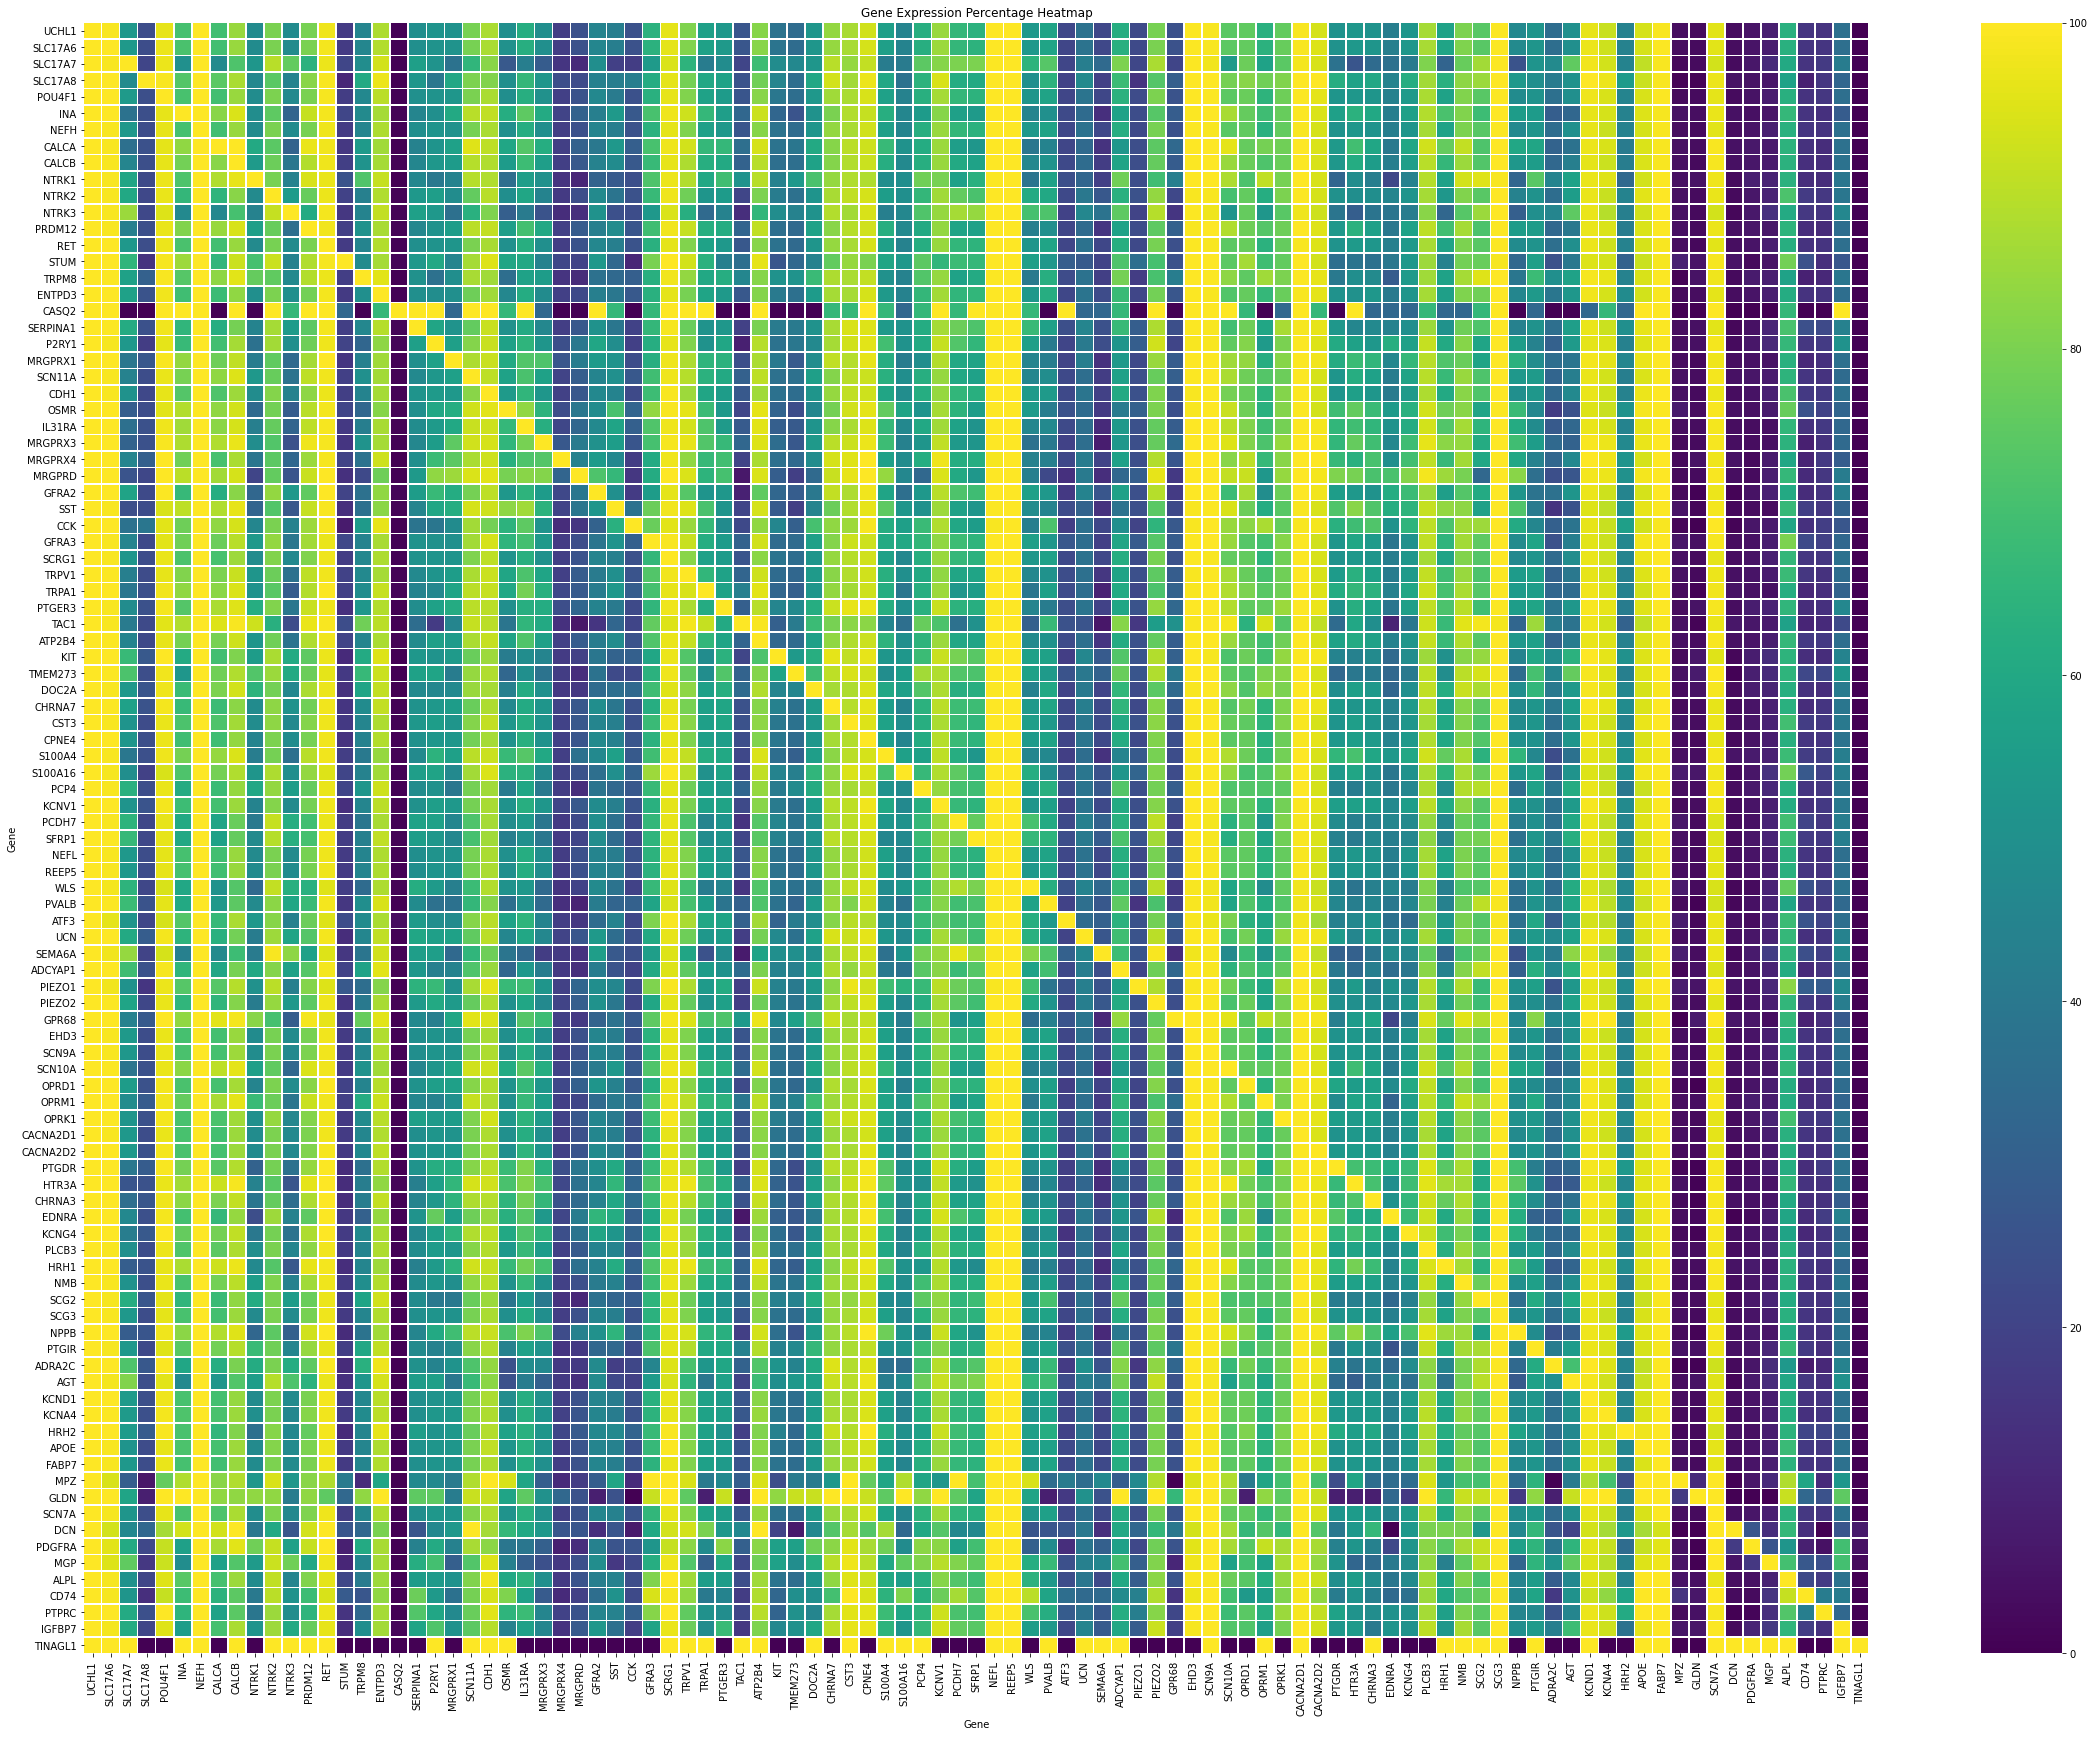

In [62]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the output matrix from the CSV file
output_matrix = pd.read_csv(r'C:\Users\huash\Downloads\gene_expression_percentage_matrix.csv', index_col=0)

# Generate a heatmap
plt.figure(figsize=(40, 30))  # You might need to adjust the size depending on your dataset
sns.heatmap(output_matrix, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Gene Expression Percentage Heatmap')
plt.xlabel('Gene')
plt.ylabel('Gene')
plt.show()


Genes in list A but not in DataFrame's row names: set()
Genes in DataFrame's row names but not in list A: {'GLDN', 'MGP', 'IGFBP7', 'ALPL', 'SLC17A8', 'PDGFRA', 'SLC17A7', 'PTPRC', 'SCN7A'}


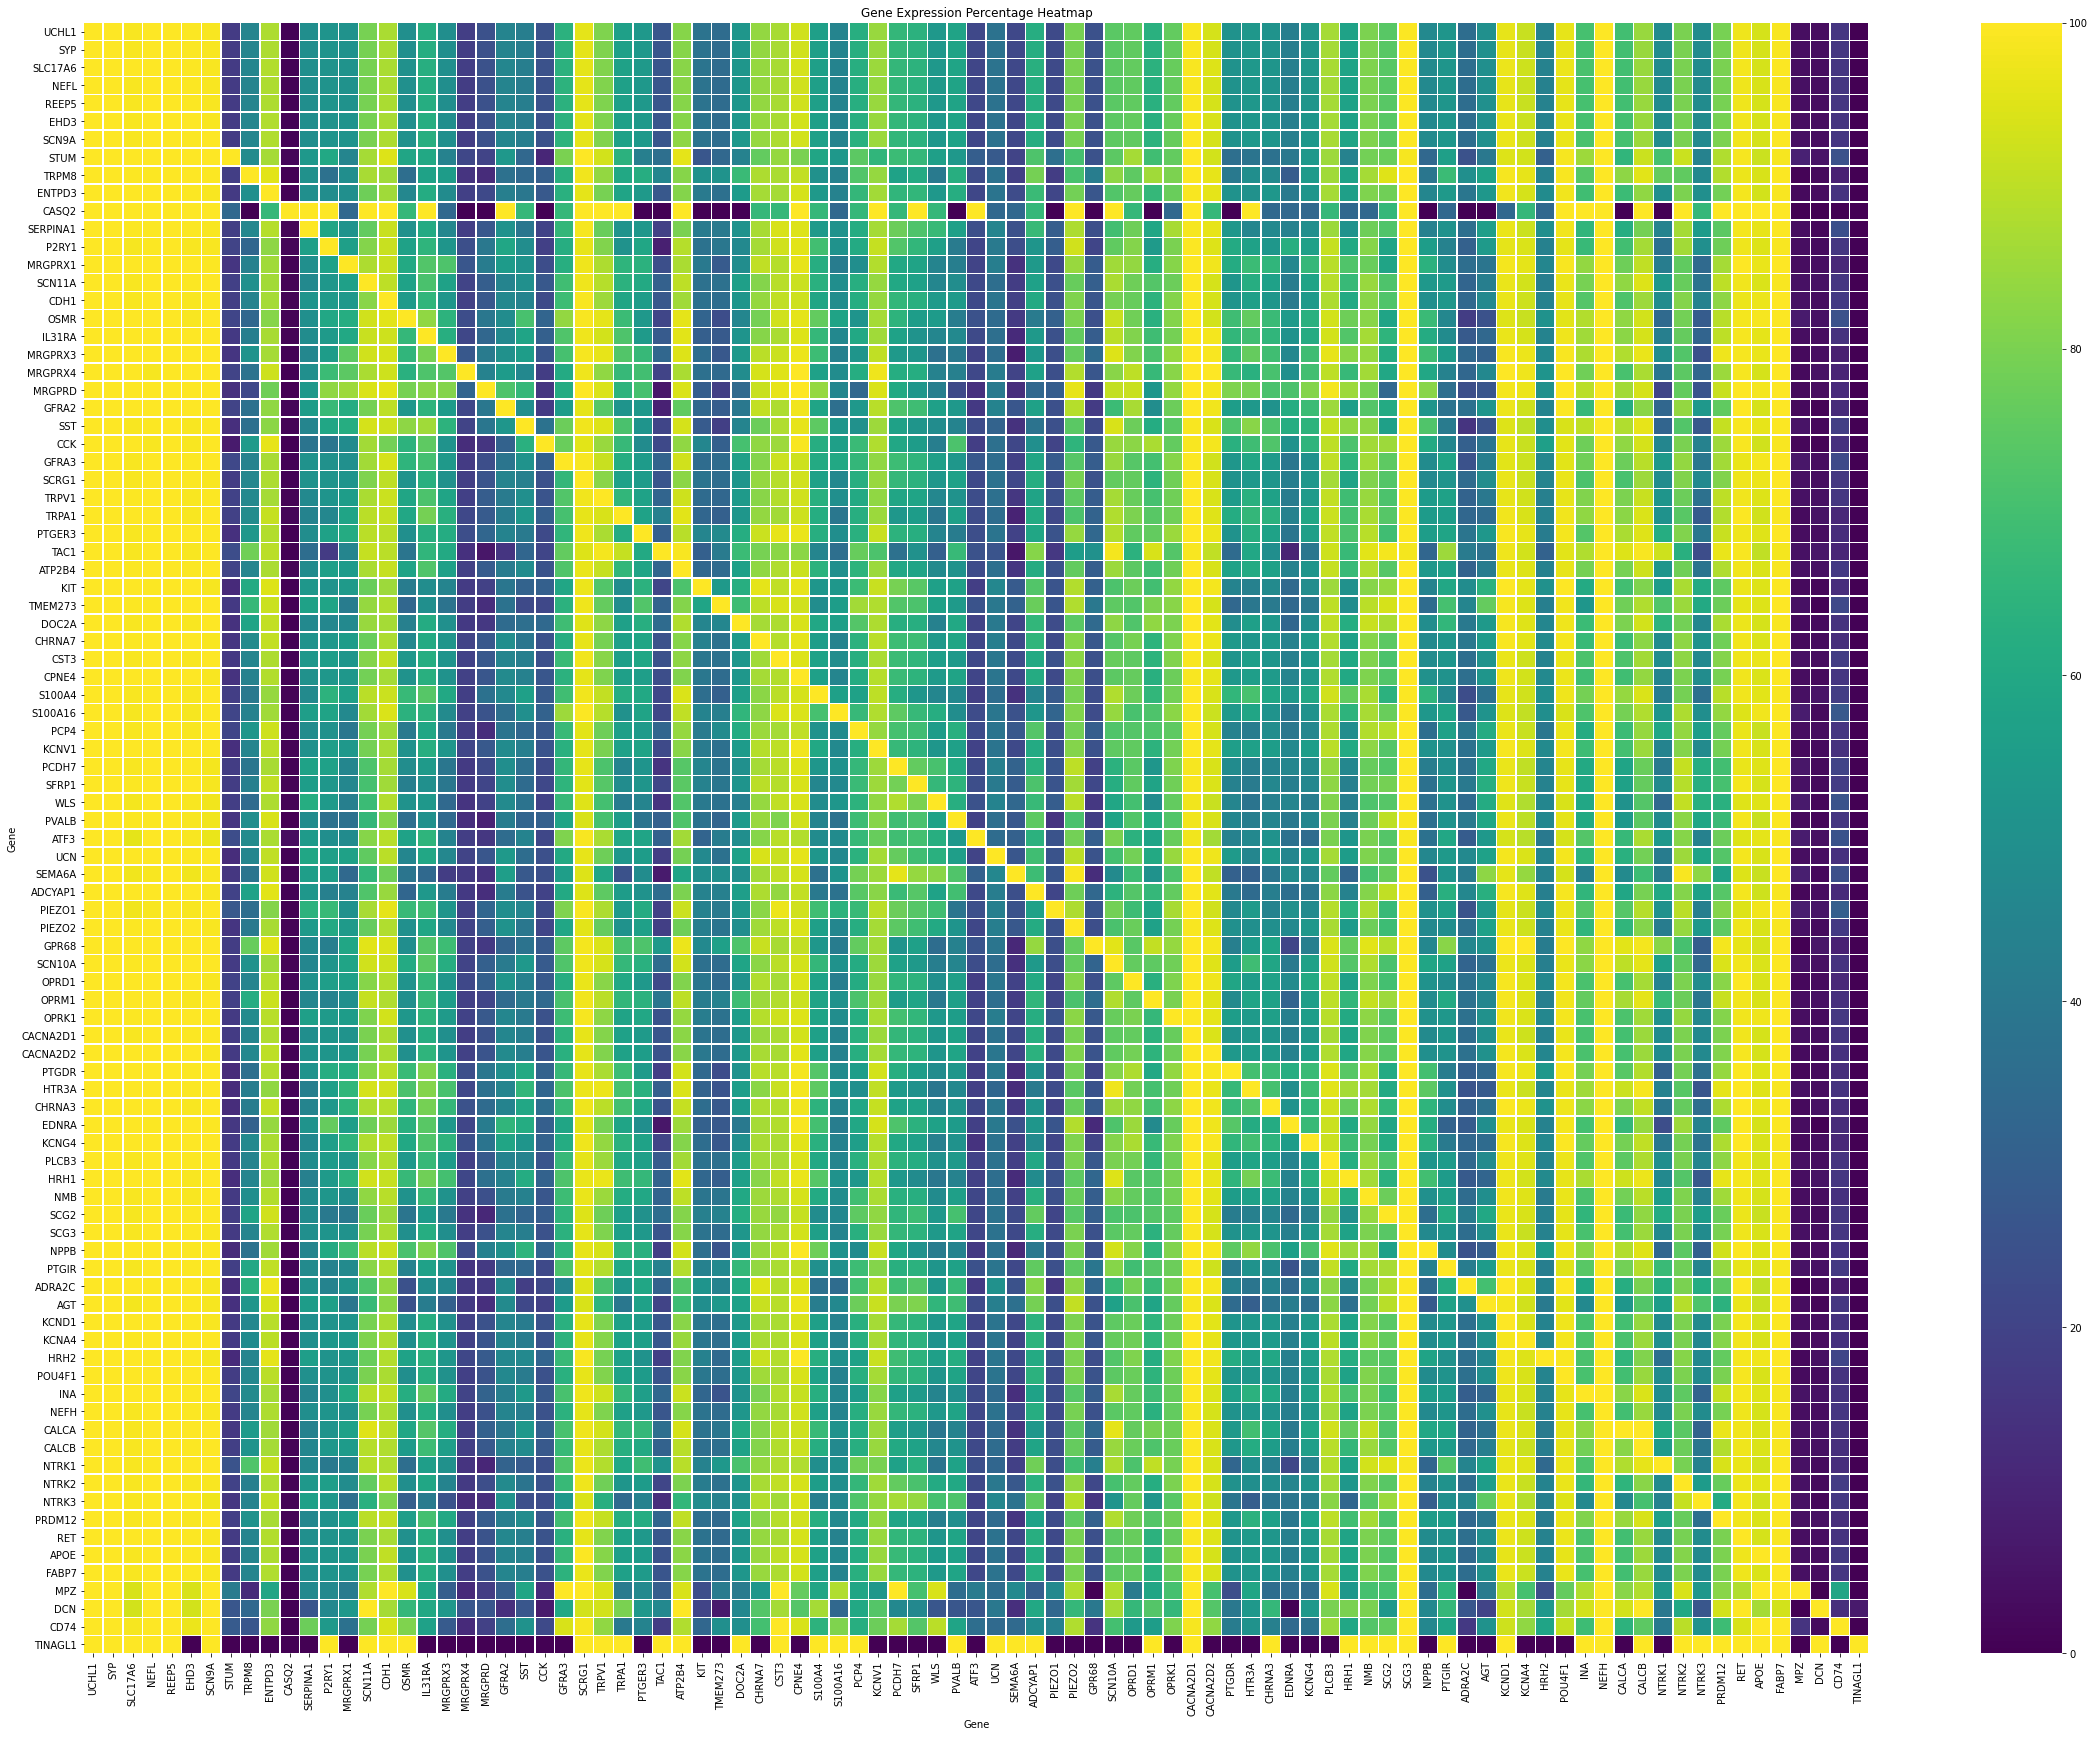

In [70]:
import pandas as pd
import numpy as np
# Assuming df is your DataFrame and A is the list with the desired order of row names
df = pd.read_csv(r'C:\Users\huash\Downloads\XETG00171__0018220_DRG-Region_1_gene_expression_matrix_normalized_NC_mean_3sd.csv', index_col=0)

## full list of 100 genes 
#A=["SYP", "UCHL1", "SLC17A6", "SLC17A7", "SLC17A8", "POU4F1", "INA", "NEFH", "CALCA", "CALCB", "NTRK1", "NTRK2", "NTRK3", "PRDM12", "RET", "STUM", "TRPM8", "ENTPD3", "CASQ2", "SERPINA1", "P2RY1", "MRGPRX1", "SCN11A", "CDH1", "OSMR", "IL31RA", "MRGPRX3", "MRGPRX4", "MRGPRD", "GFRA2", "SST", "CCK", "GFRA3", "SCRG1", "TRPV1", "TRPA1", "PTGER3", "TAC1", "ATP2B4", "KIT", "TMEM273", "DOC2A", "CHRNA7", "CST3", "CPNE4", "S100A4", "S100A16", "PCP4", "KCNV1", "PCDH7", "SFRP1", "NEFL", "REEP5", "WLS", "PVALB", "ATF3", "UCN", "SEMA6A", "ADCYAP1", "PIEZO1", "PIEZO2", "GPR68", "EHD3", "SCN9A", "SCN10A", "OPRD1", "OPRM1", "OPRK1", "CACNA2D1", "CACNA2D2", "PTGDR", "HTR3A", "CHRNA3", "EDNRA", "KCNG4", "PLCB3", "HRH1", "NMB", "SCG2", "SCG3", "NPPB", "PTGIR", "ADRA2C", "AGT", "KCND1", "KCNA4", "HRH2", "APOE", "FABP7", "MPZ", "GLDN", "SCN7A", "DCN", "PDGFRA", "MGP", "ALPL", "CD74", "PTPRC", "IGFBP7", "TINAGL1"]

A = [ "UCHL1", "SYP", "SLC17A6", "NEFL", "REEP5","EHD3", "SCN9A",   "STUM", "TRPM8", "ENTPD3", "CASQ2", "SERPINA1", "P2RY1", "MRGPRX1", "SCN11A", "CDH1", "OSMR", "IL31RA", "MRGPRX3", "MRGPRX4", "MRGPRD", "GFRA2", "SST", "CCK", "GFRA3", "SCRG1", "TRPV1", "TRPA1", "PTGER3", "TAC1", "ATP2B4", "KIT", "TMEM273", "DOC2A", "CHRNA7", "CST3", "CPNE4", "S100A4", "S100A16", "PCP4", "KCNV1", "PCDH7", "SFRP1",  "WLS", "PVALB", "ATF3", "UCN", "SEMA6A", "ADCYAP1", "PIEZO1", "PIEZO2", "GPR68",  "SCN10A", "OPRD1", "OPRM1", "OPRK1", "CACNA2D1", "CACNA2D2", "PTGDR", "HTR3A", "CHRNA3", "EDNRA", "KCNG4", "PLCB3", "HRH1", "NMB", "SCG2", "SCG3", "NPPB", "PTGIR", "ADRA2C", "AGT", "KCND1", "KCNA4", "HRH2",    "POU4F1", "INA", "NEFH", "CALCA", "CALCB", "NTRK1", "NTRK2", "NTRK3", "PRDM12", "RET",   "APOE", "FABP7", "MPZ", "DCN", "CD74",  "TINAGL1"]

df_index_set = set(df.index)
A_set = set(A)

# Check if row names in df match names in list A
if df_index_set.issubset(A_set) and A_set.issubset(df_index_set):
    print(f"Length of list A: {len(A)}")
    print(f"Length of DataFrame row names: {len(df.index)}")
else:
    # Genes in A but not in DataFrame's row names
    genes_in_A_not_in_df = A_set.difference(df_index_set)
    # Genes in DataFrame's row names but not in A
    genes_in_df_not_in_A = df_index_set.difference(A_set)
    print(f"Genes in list A but not in DataFrame's row names: {genes_in_A_not_in_df}")
    print(f"Genes in DataFrame's row names but not in list A: {genes_in_df_not_in_A}")

    # Delete rows from df if the row name is not in A
    df = df[df.index.isin(A)]

df = df.reindex(A)

# Initialize the output matrix with zeros
output_matrix = pd.DataFrame(0, index=df.index, columns=df.index)

# Loop through each gene to calculate the percentage of other genes expressed in its cells
for gene in df.index:
    # Find cells where the gene is expressed
    expressed_cells = df.columns[df.loc[gene] == 1]
    
    # Calculate the percentage of all other genes expressed in these cells
    for other_gene in df.index:
        if gene == other_gene:
            # Set diagonal to 100%
            output_matrix.loc[gene, other_gene] = 100
        else:
            if len(expressed_cells) > 0:
                # Calculate the percentage
                percentage = df.loc[other_gene, expressed_cells].sum() / len(expressed_cells)
                output_matrix.loc[gene, other_gene] = percentage * 100  # Convert to percentage

# Save the output matrix to a new CSV file
output_matrix.to_csv(r'C:\Users\huash\Downloads\gene_expression_percentage_matrix.csv')


import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the output matrix from the CSV file
output_matrix = pd.read_csv(r'C:\Users\huash\Downloads\gene_expression_percentage_matrix.csv', index_col=0)

# Generate a heatmap
plt.figure(figsize=(40, 30))  # You might need to adjust the size depending on your dataset
sns.heatmap(output_matrix, cmap='viridis', annot=False, linewidths=0.5)
plt.title('Gene Expression Percentage Heatmap')
plt.xlabel('Gene')
plt.ylabel('Gene')
plt.show()


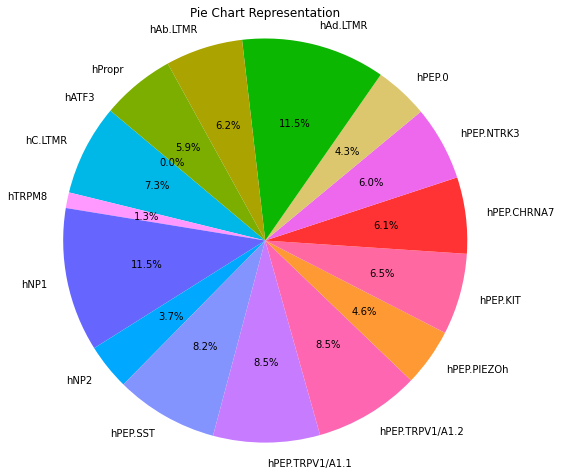

In [9]:
import matplotlib.pyplot as plt

# Input data
data = [("hC.LTMR", 93, '#00b8e7'),
        ("hTRPM8", 16, '#FF99FF'),
        ("hNP1", 147, '#6666FF'), 
        ("hNP2", 47, '#00a9ff'),
        ("hPEP.SST", 105, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 109, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 108, '#ff66b2'), 
        ("hPEP.PIEZOh", 59, '#ff9933'),
        ("hPEP.KIT", 83, '#ff68a1'), 
        ("hPEP.CHRNA7", 78, '#ff3333'),
        ("hPEP.NTRK3", 76, '#ed68ed'), 
        ("hPEP.0", 55, '#dcc66e'),
        ("hAd.LTMR", 147, '#0cb702'), 
        ("hAb.LTMR", 79, '#aba300'),
        ("hPropr", 75, '#7cae00'), 
        ("hATF3", 0, '#928e8f'),]

# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Generate pie chart
plt.figure(figsize=(8, 8))  # Adjust the figure size as needed
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures the pie chart is circular.

plt.title('Pie Chart Representation')
plt.show()


In [ ]:
data = [("hTRPM8", 8, '#FF99FF'),
        ("hC.LTMR", 9, '#00b8e7'),
        ("hNP1", 154, '#6666FF'), 
        ("hNP2", 20, '#00a9ff'),
        ("hPEP.SST", 43, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 57, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 22, '#ff66b2'), 
        ("hPEP.PIEZOh", 59, '#ff9933'),
        ("hPEP.KIT", 25, '#ff68a1'), 
        ("hPEP.CHRNA7", 72, '#ff3333'),
        ("hPEP.NTRK3", 72, '#ed68ed'), 
        ("hPEP.0", 146, '#dcc66e'),
        ("hAd.LTMR", 94, '#0cb702'), 
        ("hAb.LTMR", 150, '#aba300'),
        ("hPropr", 112, '#7cae00'), 
        ("hATF3", 23, '#928e8f')]

data = [("hTRPM8", 16, '#FF99FF'),
        ("hC.LTMR", 93, '#00b8e7'),
        ("hNP1", 147, '#6666FF'), 
        ("hNP2", 47, '#00a9ff'),
        ("hPEP.SST", 105, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 109, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 108, '#ff66b2'), 
        ("hPEP.PIEZOh", 59, '#ff9933'),
        ("hPEP.KIT", 83, '#ff68a1'), 
        ("hPEP.CHRNA7", 78, '#ff3333'),
        ("hPEP.NTRK3", 76, '#ed68ed'), 
        ("hPEP.0", 55, '#dcc66e'),
        ("hAd.LTMR", 147, '#0cb702'), 
        ("hAb.LTMR", 79, '#aba300'),
        ("hPropr", 75, '#7cae00'), 
        ("hATF3", 0, '#928e8f'),]

data = [("hTRPM8", 36, '#FF99FF'),
        ("hC.LTMR", 7, '#00b8e7'),
        ("hNP1", 233, '#6666FF'), 
        ("hNP2", 47, '#00a9ff'),
        ("hPEP.SST", 105, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 108, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 109, '#ff66b2'), 
        ("hPEP.PIEZOh", 103, '#ff9933'),
        ("hPEP.KIT", 83, '#ff68a1'), 
        ("hPEP.CHRNA7", 78, '#ff3333'),
        ("hPEP.NTRK3", 76, '#ed68ed'), 
        ("hPEP.0", 55, '#dcc66e'),
        ("hAd.LTMR", 147, '#0cb702'), 
        ("hAb.LTMR", 65, '#aba300'),
        ("hPropr", 74, '#7cae00'), 
        ("hATF3", 14, '#928e8f'),]

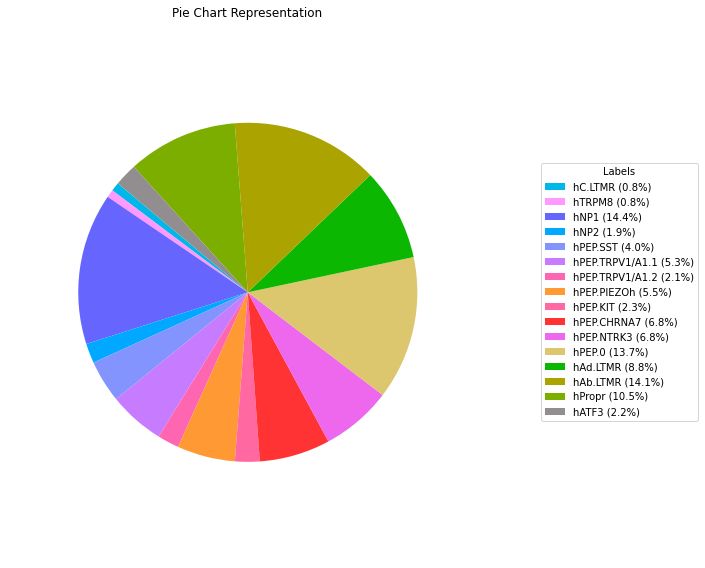

In [17]:
import matplotlib.pyplot as plt

# Input data
data = [("hC.LTMR", 9, '#00b8e7'),
        ("hTRPM8", 8, '#FF99FF'),
        ("hNP1", 154, '#6666FF'), 
        ("hNP2", 20, '#00a9ff'),
        ("hPEP.SST", 43, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 57, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 22, '#ff66b2'), 
        ("hPEP.PIEZOh", 59, '#ff9933'),
        ("hPEP.KIT", 25, '#ff68a1'), 
        ("hPEP.CHRNA7", 72, '#ff3333'),
        ("hPEP.NTRK3", 72, '#ed68ed'), 
        ("hPEP.0", 146, '#dcc66e'),
        ("hAd.LTMR", 94, '#0cb702'), 
        ("hAb.LTMR", 150, '#aba300'),
        ("hPropr", 112, '#7cae00'), 
        ("hATF3", 23, '#928e8f')]


# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Calculate total for percentage calculation
total = sum(sizes)

# Generate pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
#wedges, texts = ax.pie(sizes, labels=labels, colors=colors, startangle=140)
wedges, texts = ax.pie(sizes,  colors=colors, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Creating legend with percentages
legend_labels = ['{0} ({1:1.1f}%)'.format(i[0], (i[1]/total)*100) for i in data]
plt.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.title('Pie Chart Representation')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


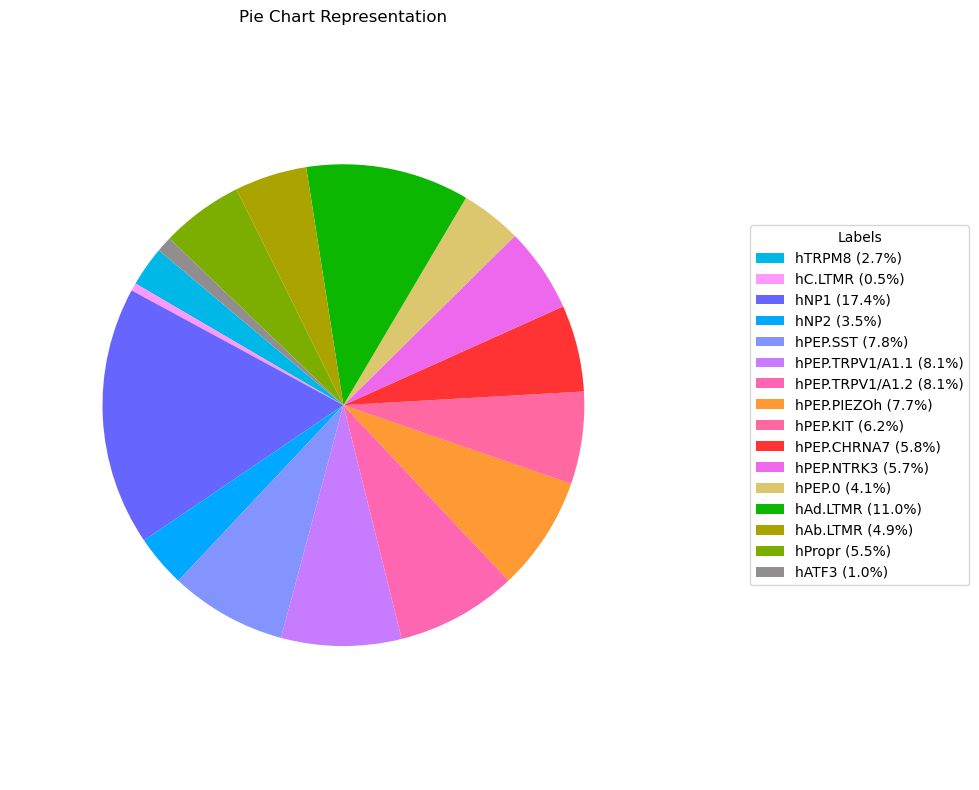

In [67]:
import matplotlib.pyplot as plt

# Input data

data = [("hTRPM8", 36, '#00b8e7'),
        ("hC.LTMR", 7, '#FF99FF'),
        ("hNP1", 233, '#6666FF'), 
        ("hNP2", 47, '#00a9ff'),
        ("hPEP.SST", 105, '#8494ff'), 
        ("hPEP.TRPV1/A1.1", 108, '#c77cff'),
        ("hPEP.TRPV1/A1.2", 109, '#ff66b2'), 
        ("hPEP.PIEZOh", 103, '#ff9933'),
        ("hPEP.KIT", 83, '#ff68a1'), 
        ("hPEP.CHRNA7", 78, '#ff3333'),
        ("hPEP.NTRK3", 76, '#ed68ed'), 
        ("hPEP.0", 55, '#dcc66e'),
        ("hAd.LTMR", 147, '#0cb702'), 
        ("hAb.LTMR", 65, '#aba300'),
        ("hPropr", 74, '#7cae00'), 
        ("hATF3", 14, '#928e8f'),]


# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Calculate total for percentage calculation
total = sum(sizes)

# Generate pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
#wedges, texts = ax.pie(sizes, labels=labels, colors=colors, startangle=140)
wedges, texts = ax.pie(sizes,  colors=colors, startangle=140)


# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Creating legend with percentages
legend_labels = ['{0} ({1:1.1f}%)'.format(i[0], (i[1]/total)*100) for i in data]
plt.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.title('Pie Chart Representation')
plt.tight_layout()  # Adjust the layout to make room for the legend
plt.show()


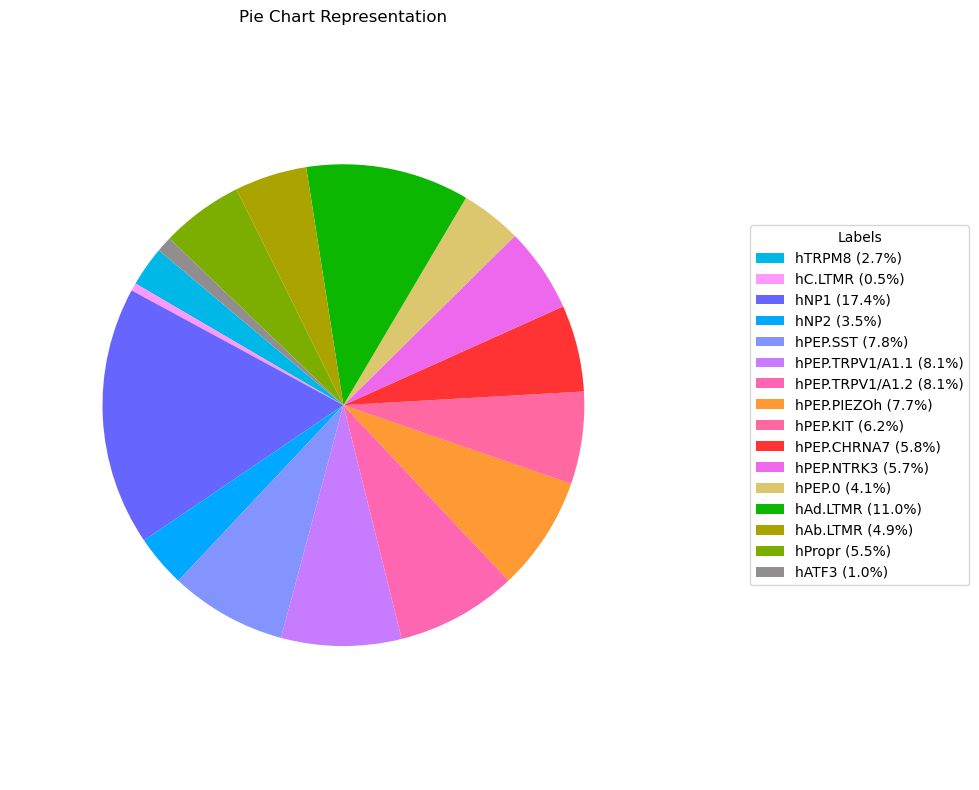

In [68]:
import matplotlib.pyplot as plt

# Input data
data = [
    ("hTRPM8", 36, '#00b8e7'),
    ("hC.LTMR", 7, '#FF99FF'),
    ("hNP1", 233, '#6666FF'),
    ("hNP2", 47, '#00a9ff'),
    ("hPEP.SST", 105, '#8494ff'),
    ("hPEP.TRPV1/A1.1", 108, '#c77cff'),
    ("hPEP.TRPV1/A1.2", 109, '#ff66b2'),
    ("hPEP.PIEZOh", 103, '#ff9933'),
    ("hPEP.KIT", 83, '#ff68a1'),
    ("hPEP.CHRNA7", 78, '#ff3333'),
    ("hPEP.NTRK3", 76, '#ed68ed'),
    ("hPEP.0", 55, '#dcc66e'),
    ("hAd.LTMR", 147, '#0cb702'),
    ("hAb.LTMR", 65, '#aba300'),
    ("hPropr", 74, '#7cae00'),
    ("hATF3", 14, '#928e8f'),
]

# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Calculate total for percentage calculation
total = sum(sizes)

# Generate pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
wedges, texts = ax.pie(sizes, colors=colors, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Creating legend with percentages
legend_labels = ['{0} ({1:1.1f}%)'.format(i[0], (i[1]/total)*100) for i in data]
plt.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.title('Pie Chart Representation')
plt.tight_layout()  # Adjust the layout to make room for the legend

# Save the plot as an SVG file
plt.savefig(r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\F4F.svg', format='svg')

plt.show()


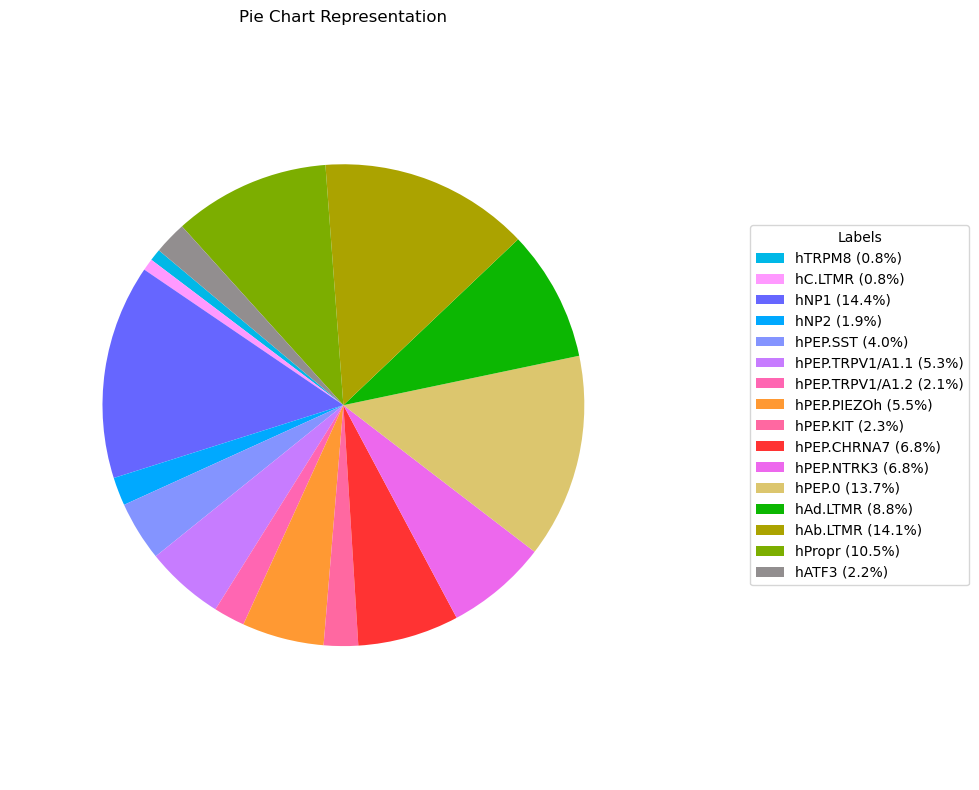

In [69]:
import matplotlib.pyplot as plt

# Input data
data = [
    ("hTRPM8", 0.8, '#00b8e7'),
    ("hC.LTMR", 0.8, '#FF99FF'),
    ("hNP1", 14.4, '#6666FF'),
    ("hNP2", 1.9, '#00a9ff'),
    ("hPEP.SST", 4, '#8494ff'),
    ("hPEP.TRPV1/A1.1", 5.3, '#c77cff'),
    ("hPEP.TRPV1/A1.2", 2.1, '#ff66b2'),
    ("hPEP.PIEZOh", 5.5, '#ff9933'),
    ("hPEP.KIT", 2.3, '#ff68a1'),
    ("hPEP.CHRNA7", 6.8, '#ff3333'),
    ("hPEP.NTRK3", 6.8, '#ed68ed'),
    ("hPEP.0", 13.7, '#dcc66e'),
    ("hAd.LTMR", 8.8, '#0cb702'),
    ("hAb.LTMR", 14.1, '#aba300'),
    ("hPropr", 10.5, '#7cae00'),
    ("hATF3", 2.2, '#928e8f'),
]

# Extracting names, numbers, and colors into separate lists
labels, sizes, colors = zip(*data)

# Calculate total for percentage calculation
total = sum(sizes)

# Generate pie chart
fig, ax = plt.subplots(figsize=(10, 8))  # Adjust the figure size as needed
wedges, texts = ax.pie(sizes, colors=colors, startangle=140)

# Equal aspect ratio ensures that pie is drawn as a circle
ax.axis('equal')  

# Creating legend with percentages
legend_labels = ['{0} ({1:1.1f}%)'.format(i[0], (i[1]/total)*100) for i in data]
plt.legend(wedges, legend_labels, title="Labels", loc="center left", bbox_to_anchor=(1.1, 0.5))

plt.title('Pie Chart Representation')
plt.tight_layout()  # Adjust the layout to make room for the legend

# Save the plot as an SVG file
plt.savefig(r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\SF3E.svg', format='svg')

plt.show()


# Calculate centroid based on cell segmentation

In [13]:
import json
import csv

# Replace 'path_to_your_file.json' with the actual path to your JSON file
file_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_4_RoiSet_10NC_real_size.json'

# Read the JSON data from the file
with open(file_path, 'r') as file:
    data = json.load(file)

# Calculate centroids
centroids = []
for cell_name, cell_data in data.items():
    centroid_x = sum(cell_data["x"]) / len(cell_data["x"])
    centroid_y = sum(cell_data["y"]) / len(cell_data["y"])
    centroids.append([cell_name, centroid_x, centroid_y])

# Specify the path where you want to save the CSV
output_csv_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_4_RoiSet_10NC_cell_centroids.csv'

# Write the centroids to a CSV file
with open(output_csv_path, 'w', newline='') as csv_file:
    writer = csv.writer(csv_file)
    writer.writerow(["Cell Name", "Centroid X", "Centroid Y"])
    writer.writerows(centroids)

print(f"Centroids saved to {output_csv_path}")


Centroids saved to H:\Xenium_segementation\XETG00171__0018220_DRG-Region_4_RoiSet_10NC_cell_centroids.csv


In [50]:
import pandas as pd

# Load metadata CSV
metadata_df = pd.read_csv('H:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path

# Filter for cell_type_manual = 'hNP1'
filtered_cells = metadata_df[metadata_df['cell_type_manual'] == 'hNP1']
#all_cells = metadata_df['cell_id'] 


# Extract cell_id
hnp1_cell_ids = filtered_cells['cell_id'].tolist()
all_cells = metadata_df['cell_id'].tolist()

# Load centroids CSV
centroids_df = pd.read_csv('H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path

# Filter centroids for hNP1 cells
hnp1_centroids = centroids_df[centroids_df['Cell Name'].isin(all_cells)]

# Extract coordinates
coordinates = hnp1_centroids[['Centroid X', 'Centroid Y']].values


# Fix the grid number

In [57]:
import numpy as np

# Placeholder for your actual coordinates array
# For this example, let's assume a simple set of coordinates for demonstration
cell_coordinates =coordinates

# Dynamically determine space_size based on cell_coordinates
min_x, min_y = np.min(cell_coordinates, axis=0)
max_x, max_y = np.max(cell_coordinates, axis=0)

# Assuming the provided coordinates are two corners of the bounding box
# min_x, min_y = 568.8504103, 3552.911091
# max_x, max_y = 732.3859203, 3641.16326

# Calculate grid sizes based on the dynamic range
space_size_x = max_x - min_x
space_size_y = max_y - min_y

grid_size = 10  # Keeping the grid size the same for simplicity

num_cells_per_grid = np.zeros((grid_size, grid_size))

# Count cells in each grid, adjusting for the dynamic range
for x, y in cell_coordinates:
    grid_x = min(int((x - min_x) / (space_size_x / grid_size)), grid_size - 1)
    grid_y = min(int((y - min_y) / (space_size_y / grid_size)), grid_size - 1)
    num_cells_per_grid[grid_x, grid_y] += 1

# Flatten the grid counts for simplicity
cell_counts = num_cells_per_grid.flatten()

# Calculate VMR
mean_count = np.mean(cell_counts)
variance_count = np.var(cell_counts)
vmr = variance_count / mean_count

print("Mean Count:", mean_count)
print("Variance:", variance_count)
print("VMR:", vmr)


Mean Count: 4.36
Variance: 13.290400000000004
VMR: 3.0482568807339456


# Fix the grid size

In [66]:
import pandas as pd

# Load metadata CSV
metadata_df = pd.read_csv('H:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path

# Filter for cell_type_manual = 'hNP1'
filtered_cells = metadata_df[metadata_df['cell_type_manual'] == 'hNP1']
#all_cells = metadata_df['cell_id'] 


# Extract cell_id
hnp1_cell_ids = filtered_cells['cell_id'].tolist()
all_cells = metadata_df['cell_id'].tolist()

# Load centroids CSV
centroids_df = pd.read_csv('H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path

# Filter centroids for hNP1 cells
hnp1_centroids = centroids_df[centroids_df['Cell Name'].isin(all_cells)]

# Extract coordinates
coordinates = hnp1_centroids[['Centroid X', 'Centroid Y']].values


import numpy as np

# Placeholder for your actual coordinates array
cell_coordinates = np.array(coordinates)  # Ensure cell_coordinates is a numpy array

# Fixed grid cell dimensions (e.g., each cell is 10 units by 10 units)
grid_cell_length_x = 500
grid_cell_length_y = 500

# Dynamically determine the overall space dimensions based on cell_coordinates
min_x, min_y = np.min(cell_coordinates, axis=0)
max_x, max_y = np.max(cell_coordinates, axis=0)

# Calculate the size of the space based on min and max coordinates
space_size_x = max_x - min_x
space_size_y = max_y - min_y

# Calculate the number of grid cells needed to cover the entire space
num_cells_x = int(np.ceil(space_size_x / grid_cell_length_x))
num_cells_y = int(np.ceil(space_size_y / grid_cell_length_y))

num_cells_per_grid = np.zeros((num_cells_x, num_cells_y))

# Count cells in each grid, adjusting for the fixed grid cell dimensions
for x, y in cell_coordinates:
    grid_x = min(int((x - min_x) / grid_cell_length_x), num_cells_x - 1)
    grid_y = min(int((y - min_y) / grid_cell_length_y), num_cells_y - 1)
    num_cells_per_grid[grid_x, grid_y] += 1

# Flatten the grid counts for simplicity
cell_counts = num_cells_per_grid.flatten()

# Calculate VMR
mean_count = np.mean(cell_counts)
variance_count = np.var(cell_counts)
vmr = variance_count / mean_count

print("Mean Count:", mean_count)
print("Variance:", variance_count)
print("VMR:", vmr)


Mean Count: 12.11111111111111
Variance: 67.04320987654322
VMR: 5.535677879714577


array([[ 0.,  1., 11., 12., 14.,  0.],
       [ 3., 24., 15., 16., 21., 17.],
       [27., 16., 15.,  7., 17., 19.],
       [27., 11., 16.,  5., 21., 21.],
       [21., 21., 10., 11., 16., 11.],
       [ 0.,  2.,  5.,  2.,  1.,  0.]])

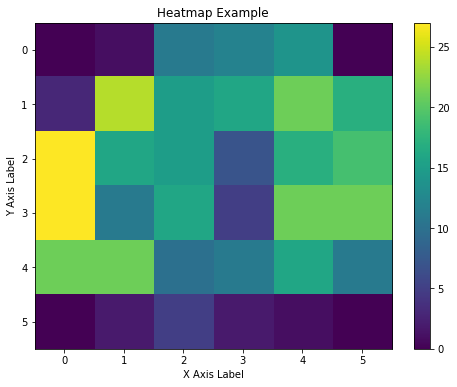

In [68]:
import matplotlib.pyplot as plt
import numpy as np

# Example 2D array
data = num_cells_per_grid
# Create the heatmap
plt.figure(figsize=(8, 6))  # Set the figure size (optional)
plt.imshow(data, cmap='viridis', aspect='auto')  # Create the heatmap with the 'viridis' colormap
plt.colorbar()  # Show the color scale
plt.title('Heatmap Example')  # Add a title (optional)
plt.xlabel('X Axis Label')  # Label the x-axis (optional)
plt.ylabel('Y Axis Label')  # Label the y-axis (optional)
plt.show()  # Display the heatmap


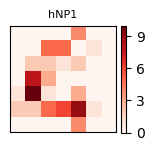

Cell Type: hNP1
Mean Count: 1.5714285714285714
Variance: 6.326530612244898
VMR: 4.025974025974026
---------


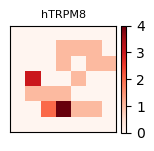

Cell Type: hTRPM8
Mean Count: 0.42857142857142855
Variance: 0.6530612244897959
VMR: 1.5238095238095237
---------


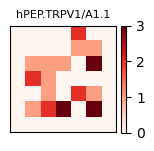

Cell Type: hPEP.TRPV1/A1.1
Mean Count: 0.5306122448979592
Variance: 0.7796751353602664
VMR: 1.4693877551020404
---------


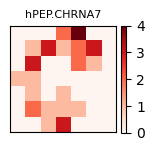

Cell Type: hPEP.CHRNA7
Mean Count: 0.7142857142857143
Variance: 1.1020408163265305
VMR: 1.5428571428571427
---------


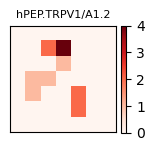

Cell Type: hPEP.TRPV1/A1.2
Mean Count: 0.2857142857142857
Variance: 0.5714285714285714
VMR: 2.0
---------


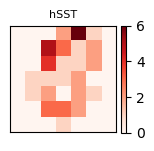

Cell Type: hSST
Mean Count: 0.9795918367346939
Variance: 1.938359017076218
VMR: 1.9787414965986392
---------


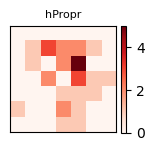

Cell Type: hPropr
Mean Count: 0.673469387755102
Variance: 1.0770512286547271
VMR: 1.5992578849721706
---------


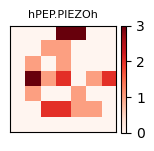

Cell Type: hPEP.PIEZOh
Mean Count: 0.5510204081632653
Variance: 0.7780091628488128
VMR: 1.4119425547996975
---------


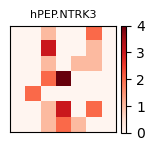

Cell Type: hPEP.NTRK3
Mean Count: 0.5714285714285714
Variance: 0.9387755102040817
VMR: 1.642857142857143
---------


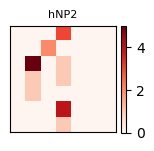

Cell Type: hNP2
Mean Count: 0.3877551020408163
Variance: 1.0537276134943774
VMR: 2.7175080558539206
---------


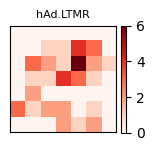

Cell Type: hAd.LTMR
Mean Count: 1.0204081632653061
Variance: 1.8567263640149938
VMR: 1.819591836734694
---------


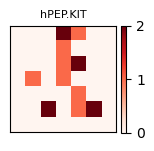

Cell Type: hPEP.KIT
Mean Count: 0.30612244897959184
Variance: 0.375676801332778
VMR: 1.2272108843537413
---------


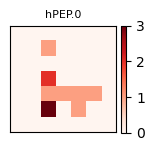

Cell Type: hPEP.0
Mean Count: 0.22448979591836735
Variance: 0.33735943356934606
VMR: 1.5027829313543597
---------


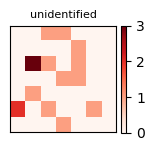

Cell Type: unidentified
Mean Count: 0.32653061224489793
Variance: 0.38317367763431914
VMR: 1.1734693877551026
---------


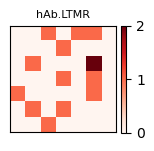

Cell Type: hAb.LTMR
Mean Count: 0.2857142857142857
Variance: 0.24489795918367346
VMR: 0.8571428571428572
---------


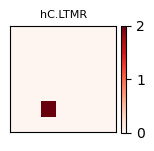

Cell Type: hC.LTMR
Mean Count: 0.04081632653061224
Variance: 0.07996668054977092
VMR: 1.9591836734693877
---------


C:\Users\huash\AppData\Local\Temp\ipykernel_5808\4262836265.py:85: RuntimeWarning: invalid value encountered in scalar divide
  vmr = variance_count / mean_count


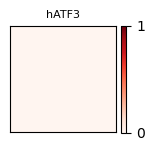

Cell Type: hATF3
Mean Count: 0.0
Variance: 0.0
VMR: nan
---------
Statistics saved to C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Human TG sequencing and Migraine\Xenium\gene expression matrix\hDRG_gene_expression_matrix_1340.csv


In [82]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker

# Load metadata and centroids data
metadata_df = pd.read_csv('D:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path
centroids_df = pd.read_csv('D:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path

# Fixed grid cell dimensions
grid_cell_length_x = 500
grid_cell_length_y = 500


all_cells = metadata_df['cell_id'].tolist()
# Filter centroids for the current cell type
all_centroids = centroids_df[centroids_df['Cell Name'].isin(all_cells)]

# Extract coordinates for the current cell type
all_coordinates = all_centroids[['Centroid X', 'Centroid Y']].values
all_cell_coordinates = np.array(all_coordinates)

    
    
    
# Dynamically determine the overall space dimensions based on cell_coordinates

# DRG-1 min_x = 448 min_y = 312 space_size_x=3320 space_size_y=3408
# DRG-2 min_x = 216 min_y = 24 space_size_x=4348 space_size_y=1704
# DRG-3 min_x = 664 min_y = 296 space_size_x=2160 space_size_y=3184
# DRG-4 min_x = 1073 min_y = 94 space_size_x=2144 space_size_y=3192


min_x = 448 
min_y = 312 
space_size_x=3320 
space_size_y=3408

#min_x, min_y = np.min(all_cell_coordinates, axis=0)
#max_x, max_y = np.max(all_cell_coordinates, axis=0)

#space_size_x = max_x - min_x
#space_size_y = max_y - min_y
    
stats_list = []  # Initialize an empty list to store stats for each cell type


# Loop through each unique cell type in 'cell_type_manual'
for cell_type in metadata_df['cell_type_manual'].unique():
    # Filter for the current cell type
    filtered_cells = metadata_df[metadata_df['cell_type_manual'] == cell_type]

    # Extract cell_id for the current cell type
    cell_ids = filtered_cells['cell_id'].tolist()

    # Filter centroids for the current cell type
    current_centroids = centroids_df[centroids_df['Cell Name'].isin(cell_ids)]

    # Extract coordinates for the current cell type
    coordinates = current_centroids[['Centroid X', 'Centroid Y']].values
    cell_coordinates = np.array(coordinates)

    


    # Calculate the number of grid cells needed to cover the entire space
    num_cells_x = int(np.ceil(space_size_x / grid_cell_length_x))
    num_cells_y = int(np.ceil(space_size_y / grid_cell_length_y))
    #print (num_cells_x)

    num_cells_per_grid = np.zeros((num_cells_x, num_cells_y))

    # Count cells in each grid for the current cell type
    for x, y in cell_coordinates:
        grid_x = min(int((x - min_x) / grid_cell_length_x), num_cells_x - 1)
        grid_y = min(int((y - min_y) / grid_cell_length_y), num_cells_y - 1)
        num_cells_per_grid[grid_x, grid_y] += 1

    # Flatten the grid counts for simplicity
    cell_counts = num_cells_per_grid.flatten()

    # Calculate VMR for the current cell type
    mean_count = np.mean(cell_counts)
    variance_count = np.var(cell_counts)
    vmr = variance_count / mean_count
    
    
    data = num_cells_per_grid
    # Rotate 90 degrees to the right
    r_data = np.rot90(data, k=-1)

    # Vertically flip the data
    f_data = np.fliplr(r_data)
    
    plt.figure(figsize=(1.5, 4*space_size_y/space_size_x))  # Set the figure size based on specified dimensions
    # Create the heatmap
    
    # Adjust vmin and vmax based on the mean count
    if mean_count == 0:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = None, None  # Let matplotlib decide the best scale
    
    cax = plt.imshow(f_data, cmap='Reds', aspect='equal', vmin=vmin, vmax=vmax)

    # Create a colorbar with specified ticks showing only integers
    cbar = plt.colorbar(cax, fraction=0.046, pad=0.04)
    cbar.locator = ticker.MaxNLocator(nbins=4, integer=True)
    cbar.update_ticks()
    
    # Set the title and other properties
    plt.title(cell_type, fontsize=8)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Display the heatmap
    plt.show()
    
    stats_list.append({
        'Cell Type': cell_type,
        'Mean Count': mean_count,
        'Variance': variance_count,
        'VMR': vmr
    })

    print(f"Cell Type: {cell_type}")
    print("Mean Count:", mean_count)
    print("Variance:", variance_count)
    print("VMR:", vmr)
    print("---------")
    
# Convert the list of dictionaries into a DataFrame
stats_df = pd.DataFrame(stats_list)

# Specify your desired output file path
#output_file_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_cell_type_stats.csv'

# Save the DataFrame to a CSV file
stats_df.to_csv(output_file_path, index=False)

print(f"Statistics saved to {output_file_path}")

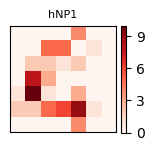

Cell Type: hNP1
Mean Count: 1.5714285714285714
Variance: 6.326530612244898
VMR: 4.025974025974026
---------


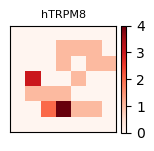

Cell Type: hTRPM8
Mean Count: 0.42857142857142855
Variance: 0.6530612244897959
VMR: 1.5238095238095237
---------


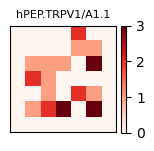

Cell Type: hPEP.TRPV1/A1.1
Mean Count: 0.5306122448979592
Variance: 0.7796751353602664
VMR: 1.4693877551020404
---------


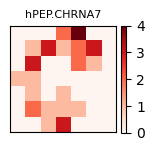

Cell Type: hPEP.CHRNA7
Mean Count: 0.7142857142857143
Variance: 1.1020408163265305
VMR: 1.5428571428571427
---------


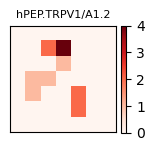

Cell Type: hPEP.TRPV1/A1.2
Mean Count: 0.2857142857142857
Variance: 0.5714285714285714
VMR: 2.0
---------


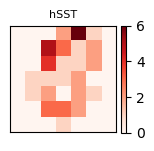

Cell Type: hSST
Mean Count: 0.9795918367346939
Variance: 1.938359017076218
VMR: 1.9787414965986392
---------


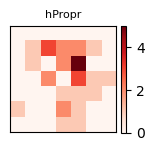

Cell Type: hPropr
Mean Count: 0.673469387755102
Variance: 1.0770512286547271
VMR: 1.5992578849721706
---------


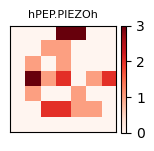

Cell Type: hPEP.PIEZOh
Mean Count: 0.5510204081632653
Variance: 0.7780091628488128
VMR: 1.4119425547996975
---------


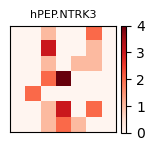

Cell Type: hPEP.NTRK3
Mean Count: 0.5714285714285714
Variance: 0.9387755102040817
VMR: 1.642857142857143
---------


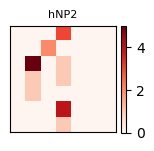

Cell Type: hNP2
Mean Count: 0.3877551020408163
Variance: 1.0537276134943774
VMR: 2.7175080558539206
---------


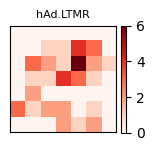

Cell Type: hAd.LTMR
Mean Count: 1.0204081632653061
Variance: 1.8567263640149938
VMR: 1.819591836734694
---------


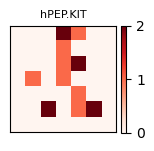

Cell Type: hPEP.KIT
Mean Count: 0.30612244897959184
Variance: 0.375676801332778
VMR: 1.2272108843537413
---------


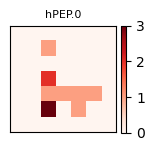

Cell Type: hPEP.0
Mean Count: 0.22448979591836735
Variance: 0.33735943356934606
VMR: 1.5027829313543597
---------


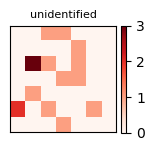

Cell Type: unidentified
Mean Count: 0.32653061224489793
Variance: 0.38317367763431914
VMR: 1.1734693877551026
---------


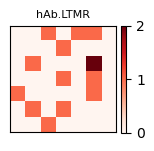

Cell Type: hAb.LTMR
Mean Count: 0.2857142857142857
Variance: 0.24489795918367346
VMR: 0.8571428571428572
---------


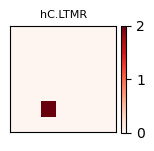

Cell Type: hC.LTMR
Mean Count: 0.04081632653061224
Variance: 0.07996668054977092
VMR: 1.9591836734693877
---------


C:\Users\huash\AppData\Local\Temp\ipykernel_5808\1178073135.py:73: RuntimeWarning: invalid value encountered in scalar divide
  vmr = variance_count / mean_count


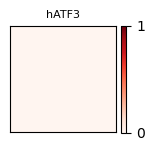

Cell Type: hATF3
Mean Count: 0.0
Variance: 0.0
VMR: nan
---------
Statistics saved to D:/Xenium_segementation/XETG00171__0018220_DRG-Region_1_cell_type_stats.csv


In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

# Load metadata and centroids data
metadata_df = pd.read_csv('D:/Xenium_segementation/hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path
centroids_df = pd.read_csv('D:/Xenium_segementation/XETG00171__0018220_DRG-Region_1_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path

# Fixed grid cell dimensions
grid_cell_length_x = 500
grid_cell_length_y = 500

all_cells = metadata_df['cell_id'].tolist()
# Filter centroids for the current cell type
all_centroids = centroids_df[centroids_df['Cell Name'].isin(all_cells)]

# Extract coordinates for the current cell type
all_coordinates = all_centroids[['Centroid X', 'Centroid Y']].values
all_cell_coordinates = np.array(all_coordinates)

# Dynamically determine the overall space dimensions based on cell_coordinates
# DRG-1 min_x = 448 min_y = 312 space_size_x=3320 space_size_y=3408
# DRG-2 min_x = 216 min_y = 24 space_size_x=4348 space_size_y=1704
# DRG-3 min_x = 664 min_y = 296 space_size_x=2160 space_size_y=3184
# DRG-4 min_x = 1073 min_y = 94 space_size_x=2144 space_size_y=3192

min_x = 448 
min_y = 312 
space_size_x=3320 
space_size_y=3408

stats_list = []  # Initialize an empty list to store stats for each cell type

# Directory to save SVG files
output_directory = r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\SF7A'
os.makedirs(output_directory, exist_ok=True)  # Ensure the output directory exists

# Loop through each unique cell type in 'cell_type_manual'
for cell_type in metadata_df['cell_type_manual'].unique():
    # Filter for the current cell type
    filtered_cells = metadata_df[metadata_df['cell_type_manual'] == cell_type]

    # Extract cell_id for the current cell type
    cell_ids = filtered_cells['cell_id'].tolist()

    # Filter centroids for the current cell type
    current_centroids = centroids_df[centroids_df['Cell Name'].isin(cell_ids)]

    # Extract coordinates for the current cell type
    coordinates = current_centroids[['Centroid X', 'Centroid Y']].values
    cell_coordinates = np.array(coordinates)

    # Calculate the number of grid cells needed to cover the entire space
    num_cells_x = int(np.ceil(space_size_x / grid_cell_length_x))
    num_cells_y = int(np.ceil(space_size_y / grid_cell_length_y))

    num_cells_per_grid = np.zeros((num_cells_x, num_cells_y))

    # Count cells in each grid for the current cell type
    for x, y in cell_coordinates:
        grid_x = min(int((x - min_x) / grid_cell_length_x), num_cells_x - 1)
        grid_y = min(int((y - min_y) / grid_cell_length_y), num_cells_y - 1)
        num_cells_per_grid[grid_x, grid_y] += 1

    # Flatten the grid counts for simplicity
    cell_counts = num_cells_per_grid.flatten()

    # Calculate VMR for the current cell type
    mean_count = np.mean(cell_counts)
    variance_count = np.var(cell_counts)
    vmr = variance_count / mean_count

    data = num_cells_per_grid
    # Rotate 90 degrees to the right
    r_data = np.rot90(data, k=-1)

    # Vertically flip the data
    f_data = np.fliplr(r_data)

    plt.figure(figsize=(1.5, 4 * space_size_y / space_size_x))  # Set the figure size based on specified dimensions
    # Create the heatmap

    # Adjust vmin and vmax based on the mean count
    if mean_count == 0:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = None, None  # Let matplotlib decide the best scale

    cax = plt.imshow(f_data, cmap='Reds', aspect='equal', vmin=vmin, vmax=vmax)

    # Create a colorbar with specified ticks showing only integers
    cbar = plt.colorbar(cax, fraction=0.046, pad=0.04)
    cbar.locator = ticker.MaxNLocator(nbins=4, integer=True)
    cbar.update_ticks()

    # Set the title and other properties
    plt.title(cell_type, fontsize=8)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Save the plot as an SVG file, replacing / with . in cell_type names
    cell_type_safe = cell_type.replace('/', '.')
    svg_filename = f"{output_directory}/{cell_type_safe}.svg"
    plt.savefig(svg_filename, format='svg')

    # Display the heatmap
    plt.show()

    stats_list.append({
        'Cell Type': cell_type,
        'Mean Count': mean_count,
        'Variance': variance_count,
        'VMR': vmr
    })

    print(f"Cell Type: {cell_type}")
    print("Mean Count:", mean_count)
    print("Variance:", variance_count)
    print("VMR:", vmr)
    print("---------")

# Convert the list of dictionaries into a DataFrame
stats_df = pd.DataFrame(stats_list)

# Specify your desired output file path
output_file_path = 'D:/Xenium_segementation/XETG00171__0018220_DRG-Region_1_cell_type_stats.csv'

# Save the DataFrame to a CSV file
stats_df.to_csv(output_file_path, index=False)

print(f"Statistics saved to {output_file_path}")


In [93]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
import os

# Load metadata and centroids data
metadata_df = pd.read_csv('D:/Xenium_segementation/hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path
centroids_df = pd.read_csv('D:/Xenium_segementation/XETG00171__0018220_DRG-Region_2_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path

# Fixed grid cell dimensions
grid_cell_length_x = 500
grid_cell_length_y = 500

all_cells = metadata_df['cell_id'].tolist()
# Filter centroids for the current cell type
all_centroids = centroids_df[centroids_df['Cell Name'].isin(all_cells)]

# Extract coordinates for the current cell type
all_coordinates = all_centroids[['Centroid X', 'Centroid Y']].values
all_cell_coordinates = np.array(all_coordinates)

# Dynamically determine the overall space dimensions based on cell_coordinates
# DRG-1 min_x = 448 min_y = 312 space_size_x=3320 space_size_y=3408
# DRG-2 min_x = 216 min_y = 24 space_size_x=4348 space_size_y=1704
# DRG-3 min_x = 664 min_y = 296 space_size_x=2160 space_size_y=3184
# DRG-4 min_x = 1073 min_y = 94 space_size_x=2144 space_size_y=3192

min_x = 216 
min_y = 24 
space_size_x=4348
space_size_y=1704

stats_list = []  # Initialize an empty list to store stats for each cell type

# Directory to save SVG files
output_directory = r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\SF7B'
os.makedirs(output_directory, exist_ok=True)  # Ensure the output directory exists

# Use Agg backend for vector graphics
plt.switch_backend('Agg')

# Loop through each unique cell type in 'cell_type_manual'
for cell_type in metadata_df['cell_type_manual'].unique():
    # Filter for the current cell type
    filtered_cells = metadata_df[metadata_df['cell_type_manual'] == cell_type]

    # Extract cell_id for the current cell type
    cell_ids = filtered_cells['cell_id'].tolist()

    # Filter centroids for the current cell type
    current_centroids = centroids_df[centroids_df['Cell Name'].isin(cell_ids)]

    # Extract coordinates for the current cell type
    coordinates = current_centroids[['Centroid X', 'Centroid Y']].values
    cell_coordinates = np.array(coordinates)

    # Calculate the number of grid cells needed to cover the entire space
    num_cells_x = int(np.ceil(space_size_x / grid_cell_length_x))
    num_cells_y = int(np.ceil(space_size_y / grid_cell_length_y))

    num_cells_per_grid = np.zeros((num_cells_x, num_cells_y))

    # Count cells in each grid for the current cell type
    for x, y in cell_coordinates:
        grid_x = min(int((x - min_x) / grid_cell_length_x), num_cells_x - 1)
        grid_y = min(int((y - min_y) / grid_cell_length_y), num_cells_y - 1)
        num_cells_per_grid[grid_x, grid_y] += 1

    # Flatten the grid counts for simplicity
    cell_counts = num_cells_per_grid.flatten()

    # Calculate VMR for the current cell type
    mean_count = np.mean(cell_counts)
    variance_count = np.var(cell_counts)
    vmr = variance_count / mean_count

    data = num_cells_per_grid
    # Rotate 90 degrees to the right
    r_data = np.rot90(data, k=-1)

    # Vertically flip the data
    f_data = np.fliplr(r_data)

    plt.figure(figsize=(1.5, 4 * space_size_y / space_size_x))  # Set the figure size based on specified dimensions
    # Create the heatmap

    # Adjust vmin and vmax based on the mean count
    if mean_count == 0:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = None, None  # Let matplotlib decide the best scale

    cax = plt.imshow(f_data, cmap='Reds', aspect='equal', vmin=vmin, vmax=vmax)

    # Create a colorbar with specified ticks showing only integers
    cbar = plt.colorbar(cax, fraction=0.046, pad=0.04)
    cbar.locator = ticker.MaxNLocator(nbins=4, integer=True)
    cbar.update_ticks()

    # Set the title and other properties
    plt.title(cell_type, fontsize=8)
    plt.xticks([])  # Remove x-axis ticks
    plt.yticks([])  # Remove y-axis ticks

    # Save the plot as an SVG file, replacing / with . in cell_type names
    cell_type_safe = cell_type.replace('/', '.')
    svg_filename = f"{output_directory}/{cell_type_safe}.svg"
    plt.savefig(svg_filename, format='svg', bbox_inches='tight')

    # Clear the figure to ensure no overlap in subsequent plots
    plt.clf()

    stats_list.append({
        'Cell Type': cell_type,
        'Mean Count': mean_count,
        'Variance': variance_count,
        'VMR': vmr
    })

    print(f"Cell Type: {cell_type}")
    print("Mean Count:", mean_count)
    print("Variance:", variance_count)
    print("VMR:", vmr)
    print("---------")

# Convert the list of dictionaries into a DataFrame
stats_df = pd.DataFrame(stats_list)

# Specify your desired output file path
output_file_path = 'D:/Xenium_segementation/XETG00171__0018220_DRG-Region_1_cell_type_stats.csv'

# Save the DataFrame to a CSV file
stats_df.to_csv(output_file_path, index=False)

print(f"Statistics saved to {output_file_path}")


C:\Users\huash\AppData\Local\Temp\ipykernel_5808\1219192169.py:41: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  plt.switch_backend('Agg')


Cell Type: hNP1
Mean Count: 2.5833333333333335
Variance: 11.909722222222221
VMR: 4.61021505376344
---------
Cell Type: hTRPM8
Mean Count: 0.16666666666666666
Variance: 0.19444444444444442
VMR: 1.1666666666666665
---------
Cell Type: hPEP.TRPV1/A1.1
Mean Count: 0.6388888888888888
Variance: 1.1195987654320987
VMR: 1.752415458937198
---------
Cell Type: hPEP.CHRNA7
Mean Count: 0.6666666666666666
Variance: 1.2222222222222223
VMR: 1.8333333333333335
---------
Cell Type: hPEP.TRPV1/A1.2
Mean Count: 0.6388888888888888
Variance: 1.452932098765432
VMR: 2.274154589371981
---------
Cell Type: hSST
Mean Count: 0.9444444444444444
Variance: 1.941358024691358
VMR: 2.0555555555555554
---------
Cell Type: hPropr
Mean Count: 0.3055555555555556
Variance: 0.32330246913580246
VMR: 1.058080808080808
---------
Cell Type: hPEP.PIEZOh
Mean Count: 0.3055555555555556
Variance: 0.6566358024691359
VMR: 2.1489898989898992
---------
Cell Type: hPEP.NTRK3
Mean Count: 0.8055555555555556
Variance: 0.7121913580246914
VM

C:\Users\huash\AppData\Local\Temp\ipykernel_5808\1219192169.py:76: RuntimeWarning: invalid value encountered in scalar divide
  vmr = variance_count / mean_count


Cell Type: hATF3
Mean Count: 0.1388888888888889
Variance: 0.17515432098765435
VMR: 1.2611111111111113
---------
Statistics saved to D:/Xenium_segementation/XETG00171__0018220_DRG-Region_1_cell_type_stats.csv


In [96]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import ticker
from mpl_toolkits.axes_grid1 import make_axes_locatable
import os

# Load metadata and centroids data
metadata_df = pd.read_csv('D:/Xenium_segementation/hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path
centroids_df = pd.read_csv('D:/Xenium_segementation/XETG00171__0018220_DRG-Region_4_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path

# Fixed grid cell dimensions
grid_cell_length_x = 500
grid_cell_length_y = 500

all_cells = metadata_df['cell_id'].tolist()
# Filter centroids for the current cell type
all_centroids = centroids_df[centroids_df['Cell Name'].isin(all_cells)]

# Extract coordinates for the current cell type
all_coordinates = all_centroids[['Centroid X', 'Centroid Y']].values
all_cell_coordinates = np.array(all_coordinates)

# Dynamically determine the overall space dimensions based on cell_coordinates
# DRG-1 min_x = 448 min_y = 312 space_size_x=3320 space_size_y=3408
# DRG-2 min_x = 216 min_y = 24 space_size_x=4348 space_size_y=1704
# DRG-3 min_x = 664 min_y = 296 space_size_x=2160 space_size_y=3184
# DRG-4 min_x = 1073 min_y = 94 space_size_x=2144 space_size_y=3192

min_x = 1073 
min_y = 94 
space_size_x=2144
space_size_y=3192

stats_list = []  # Initialize an empty list to store stats for each cell type

# Directory to save SVG files
output_directory = r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\SF7D'
os.makedirs(output_directory, exist_ok=True)  # Ensure the output directory exists

# Use Agg backend for vector graphics
plt.switch_backend('Agg')

# Loop through each unique cell type in 'cell_type_manual'
for cell_type in metadata_df['cell_type_manual'].unique():
    # Filter for the current cell type
    filtered_cells = metadata_df[metadata_df['cell_type_manual'] == cell_type]

    # Extract cell_id for the current cell type
    cell_ids = filtered_cells['cell_id'].tolist()

    # Filter centroids for the current cell type
    current_centroids = centroids_df[centroids_df['Cell Name'].isin(cell_ids)]

    # Extract coordinates for the current cell type
    coordinates = current_centroids[['Centroid X', 'Centroid Y']].values
    cell_coordinates = np.array(coordinates)

    # Calculate the number of grid cells needed to cover the entire space
    num_cells_x = int(np.ceil(space_size_x / grid_cell_length_x))
    num_cells_y = int(np.ceil(space_size_y / grid_cell_length_y))

    num_cells_per_grid = np.zeros((num_cells_x, num_cells_y))

    # Count cells in each grid for the current cell type
    for x, y in cell_coordinates:
        grid_x = min(int((x - min_x) / grid_cell_length_x), num_cells_x - 1)
        grid_y = min(int((y - min_y) / grid_cell_length_y), num_cells_y - 1)
        num_cells_per_grid[grid_x, grid_y] += 1

    # Flatten the grid counts for simplicity
    cell_counts = num_cells_per_grid.flatten()

    # Calculate VMR for the current cell type
    mean_count = np.mean(cell_counts)
    variance_count = np.var(cell_counts)
    vmr = variance_count / mean_count

    data = num_cells_per_grid
    # Rotate 90 degrees to the right
    r_data = np.rot90(data, k=-1)

    # Vertically flip the data
    f_data = np.fliplr(r_data)

    fig, ax = plt.subplots(figsize=(1.5, 4 * space_size_y / space_size_x))  # Set the figure size based on specified dimensions
    # Create the heatmap

    # Adjust vmin and vmax based on the mean count
    if mean_count == 0:
        vmin, vmax = 0, 1
    else:
        vmin, vmax = None, None  # Let matplotlib decide the best scale

    cax = ax.imshow(f_data, cmap='Reds', aspect='equal', vmin=vmin, vmax=vmax)

    # Create a divider for the existing axes instance
    divider = make_axes_locatable(ax)
    cax_div = divider.append_axes("right", size="5%", pad=0.05)

    # Create a colorbar with specified ticks showing only integers
    cbar = fig.colorbar(cax, cax=cax_div, ticks=np.arange(0, np.max(f_data)+1, step=max(1, np.ceil(np.max(f_data) / 4))))
    cbar.locator = ticker.MaxNLocator(nbins=4, integer=True)
    cbar.update_ticks()

    # Set the title and other properties
    ax.set_title(cell_type, fontsize=8)
    ax.set_xticks([])  # Remove x-axis ticks
    ax.set_yticks([])  # Remove y-axis ticks

    # Save the plot as an SVG file, replacing / with . in cell_type names
    cell_type_safe = cell_type.replace('/', '.')
    svg_filename = f"{output_directory}/{cell_type_safe}.svg"
    fig.savefig(svg_filename, format='svg', bbox_inches='tight')

    # Clear the figure to ensure no overlap in subsequent plots
    plt.clf()

    stats_list.append({
        'Cell Type': cell_type,
        'Mean Count': mean_count,
        'Variance': variance_count,
        'VMR': vmr
    })

    print(f"Cell Type: {cell_type}")
    print("Mean Count:", mean_count)
    print("Variance:", variance_count)
    print("VMR:", vmr)
    print("---------")

# Convert the list of dictionaries into a DataFrame
stats_df = pd.DataFrame(stats_list)

# Specify your desired output file path
output_file_path = 'D:/Xenium_segementation/XETG00171__0018220_DRG-Region_1_cell_type_stats.csv'

# Save the DataFrame to a CSV file
stats_df.to_csv(output_file_path, index=False)

print(f"Statistics saved to {output_file_path}")


C:\Users\huash\AppData\Local\Temp\ipykernel_5808\2705837360.py:42: MatplotlibDeprecationWarning: Auto-close()ing of figures upon backend switching is deprecated since 3.8 and will be removed two minor releases later.  To suppress this warning, explicitly call plt.close('all') first.
  plt.switch_backend('Agg')


Cell Type: hNP1
Mean Count: 1.0
Variance: 3.085714285714286
VMR: 3.085714285714286
---------
Cell Type: hTRPM8
Mean Count: 0.14285714285714285
Variance: 0.1795918367346939
VMR: 1.2571428571428573
---------
Cell Type: hPEP.TRPV1/A1.1
Mean Count: 0.6571428571428571
Variance: 2.3395918367346935
VMR: 3.5602484472049682
---------
Cell Type: hPEP.CHRNA7
Mean Count: 0.2857142857142857
Variance: 0.43265306122448977
VMR: 1.5142857142857142
---------
Cell Type: hPEP.TRPV1/A1.2
Mean Count: 1.0857142857142856
Variance: 5.56408163265306
VMR: 5.124812030075188
---------
Cell Type: hSST
Mean Count: 0.34285714285714286
Variance: 0.33959183673469384
VMR: 0.9904761904761904
---------
Cell Type: hPropr
Mean Count: 0.34285714285714286
Variance: 0.739591836734694
VMR: 2.1571428571428575
---------
Cell Type: hPEP.PIEZOh
Mean Count: 0.9714285714285714
Variance: 2.713469387755102
VMR: 2.79327731092437
---------
Cell Type: hPEP.NTRK3
Mean Count: 0.2857142857142857
Variance: 0.3183673469387755
VMR: 1.1142857142

In [119]:
from PIL import Image
import numpy as np

def change_black_to_gray(image_path, output_path):
    # Open the image
    img = Image.open(image_path)
    
    # Convert the image to RGB if it is not already
    img = img.convert('RGB')
    
    # Convert the image to a NumPy array for manipulation
    data = np.array(img)
    
    # Define black and gray colors
    black = [0, 0, 0]
    gray = [128, 128, 128]
    
    # Create a mask that finds all the pixels in the image that are black
    mask = np.all(data == black, axis=-1)
    
    # Change all black (0,0,0) pixels to gray (128,128,128)
    data[mask] = gray
    
    # Convert the NumPy array back to an image
    img_modified = Image.fromarray(data, mode='RGB')
    
    # Save the modified image
    img_modified.save(output_path)

# Usage example
image_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_spatial_all.tif'
output_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_spatial_all_gray.tif'
change_black_to_gray(image_path, output_path)


In [122]:
from PIL import Image
import numpy as np

def change_black_to_gray_with_threshold(image_path, output_path, threshold=30):
    # Open the image
    img = Image.open(image_path)
    
    # Convert the image to RGB if it is not already
    img = img.convert('RGB')
    
    # Convert the image to a NumPy array for manipulation
    data = np.array(img)
    
    # Define black, near-black threshold, and gray colors
    black = [0, 0, 0]
    gray = [192, 192, 192]
    light_gray = [192, 192, 192]  # Light gray for near-black pixels
    
    # Identify absolute black pixels
    black_mask = np.all(data == black, axis=-1)
    
    # Change absolute black pixels to gray
    data[black_mask] = gray
    
    # Identify near-black pixels: pixels where all components are below the threshold
    near_black_mask = np.all(data < threshold, axis=-1) & ~black_mask
    
    # Change near-black pixels to light gray
    data[near_black_mask] = light_gray
    
    # Convert the NumPy array back to an image
    img_modified = Image.fromarray(data, mode='RGB')
    
    # Save the modified image
    img_modified.save(output_path)

# Usage example
image_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_spatial_all.tif'
output_path = 'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_spatial_all_gray.tif'
change_black_to_gray_with_threshold(image_path, output_path, threshold=30)


# nearest-neighbor 

In [29]:
import pandas as pd

# Load metadata CSV
metadata_df = pd.read_csv('H:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')  # Adjust the file path

# Filter for cell_type_manual = 'hNP1'
filtered_cells = metadata_df[metadata_df['cell_type_manual'] == 'hSST']
#all_cells = metadata_df['cell_id'] 


# Extract cell_id
hnp1_cell_ids = filtered_cells['cell_id'].tolist()
all_cells = metadata_df['cell_id'].tolist()

# Load centroids CSV
centroids_df = pd.read_csv('H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_cell_centroids.csv')  # Adjust the file path


# Filter centroids for hNP1 cells
hnp1_centroids = centroids_df[centroids_df['Cell Name'].isin(hnp1_cell_ids)]

# Extract coordinates
coordinates = hnp1_centroids[['Centroid X', 'Centroid Y']].values
all_coordinates = centroids_df[['Centroid X', 'Centroid Y']].values

all_other_coordinates = [element for element in all_coordinates if element not in coordinates]


#all_coordinates_clean= [coord for coord in all_coordinates if not all(np.isnan(x) for x in coord)]


FileNotFoundError: [Errno 2] No such file or directory: 'H:\\Xenium_segementation\\hDRG_gene_expression_matrix_metadata_seurat.csv'

In [30]:
import numpy as np
from scipy.spatial import cKDTree
A = all_other_coordinates
B = coordinates


# Create KD-Trees for efficient nearest-neighbor calculation
tree_A = cKDTree(A)
tree_B = cKDTree(B)

# Calculate nearest-neighbor distances within B
distances_B, _ = tree_B.query(B, k=2)  # k=2 because the nearest neighbor includes the point itself
avg_distance_B = np.mean(distances_B[:, 1])  # Exclude the distance to itself

# Calculate nearest-neighbor distances from B to A
distances_B_to_A, _ = tree_A.query(B, k=1)
avg_distance_B_to_A = np.mean(distances_B_to_A)

print(f"Average nearest-neighbor distance within B: {avg_distance_B}")
print(f"Average nearest-neighbor distance from B to A: {avg_distance_B_to_A}")


NameError: name 'all_other_coordinates' is not defined

In [31]:
from scipy.stats import ttest_ind

# You already have distances_B[:, 1] for nearest-neighbor distances within B
# And distances_B_to_A for nearest-neighbor distances from B to A

# Perform two-sample t-test
t_stat, p_value = ttest_ind(distances_B[:, 1], distances_B_to_A)

print(f"T-statistic: {t_stat}")
print(f"P-value: {p_value}")

# Interpretation
if p_value <= 0.05:
    print("The two mean distances are significantly different (p <= 0.05).")
else:
    print("There is not enough evidence to conclude that the two mean distances are significantly different (p > 0.05).")


NameError: name 'distances_B' is not defined

In [13]:
import pandas as pd

# Step 1: Read file A to get the column names
file_a_path = 'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Human TG sequencing and Migraine\Xenium\gene expression matrix\hDRG_gene_normalized_expression_matrix.csv'  # Update this to your file A's path
df_a = pd.read_csv(file_a_path)
column_names_a = df_a.columns.tolist()

# Step 2: Read file B and select columns that are present in file A
file_b_path = 'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Human TG sequencing and Migraine\Xenium\gene expression matrix\hDRG_gene_expression_matrix_main_other_markers_original_cell_id.csv'  # Update this to your file B's path
df_b = pd.read_csv(file_b_path)
# Select columns from file B that are in the column names list of file A
selected_columns_b = df_b[column_names_a]

# Now, 'selected_columns_b' contains only the columns from file B that were present in file A
# You can now work with 'selected_columns_b' dataframe as needed

# Specify your desired output file path
output_file_path = 'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Human TG sequencing and Migraine\Xenium\gene expression matrix\hDRG_gene_expression_matrix_1340.csv'  # Update this to your desired output path

# Save the selected columns to a new CSV file
selected_columns_b.to_csv(output_file_path, index=False)

# 'index=False' is used to prevent pandas from writing row indices into the CSV file



ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

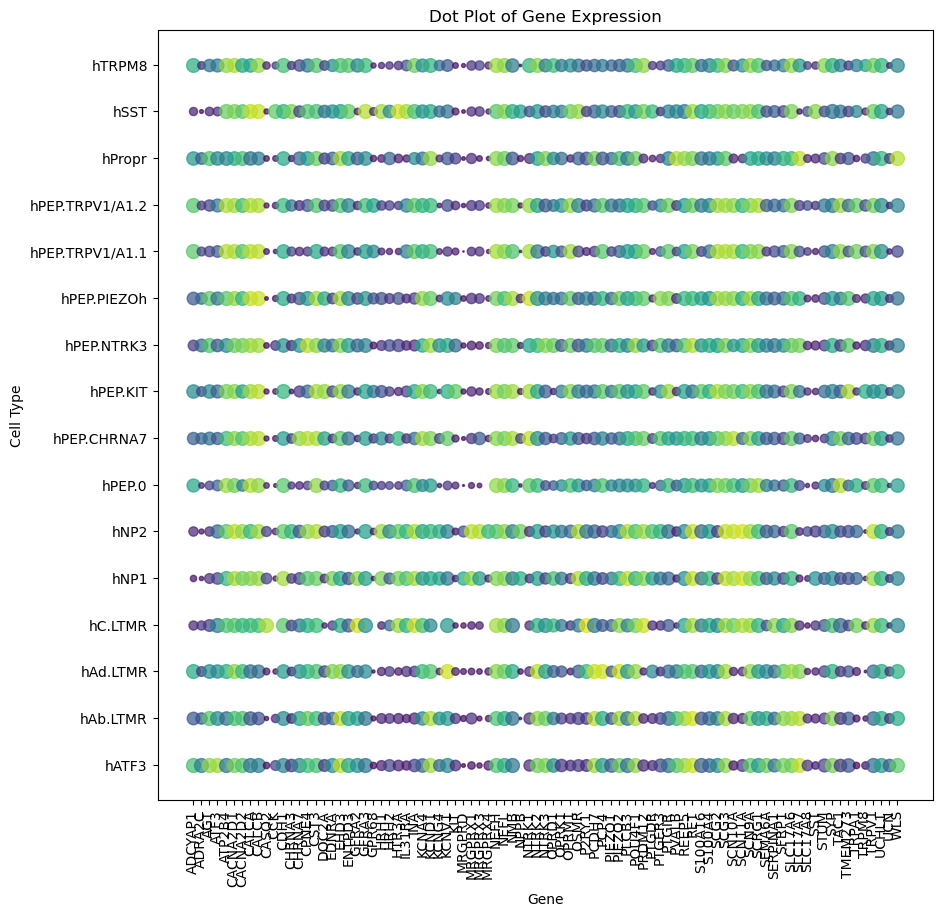

In [25]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Load your data
expression_data = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_normalized_expression_matrix.csv', index_col=0)
metadata = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)


# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_data_scaled = scaler.fit_transform(expression_data.T)
expression_data_scaled_df = pd.DataFrame(expression_data_scaled, columns=expression_data.index, index=expression_data.columns)

# Map cell ids to cell types
cell_types = metadata['cell_type_manual']
expression_data_scaled_df['cell_type'] = cell_types

# Calculate the percentage of cells expressing each gene per cell type
fraction_expressed = expression_data_scaled_df.groupby('cell_type').apply(lambda x: (x > 0).sum() / len(x))

# Calculate the average expression level per cell type
mean_expression = expression_data_scaled_df.groupby('cell_type').mean()

# Prepare the data for plotting
genes = mean_expression.columns
cell_types = mean_expression.index

# Now create the dot plot
plt.figure(figsize=(10, 10))
for gene in genes:
    for cell_type in cell_types:
        value = mean_expression.loc[cell_type, gene]
        fraction = fraction_expressed.loc[cell_type, gene]
        size = fraction * 100  # Adjust size scaling factor as needed
        plt.scatter(gene, cell_type, s=size, c=value, cmap='viridis', vmin=0, vmax=1, alpha=0.7)

plt.xticks(rotation=90)
plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression')

# Create an artificial mappable for the colorbar
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap='viridis', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Normalized Expression Level')

plt.tight_layout()
plt.show()


ValueError: Unable to determine Axes to steal space for Colorbar. Either provide the *cax* argument to use as the Axes for the Colorbar, provide the *ax* argument to steal space from it, or add *mappable* to an Axes.

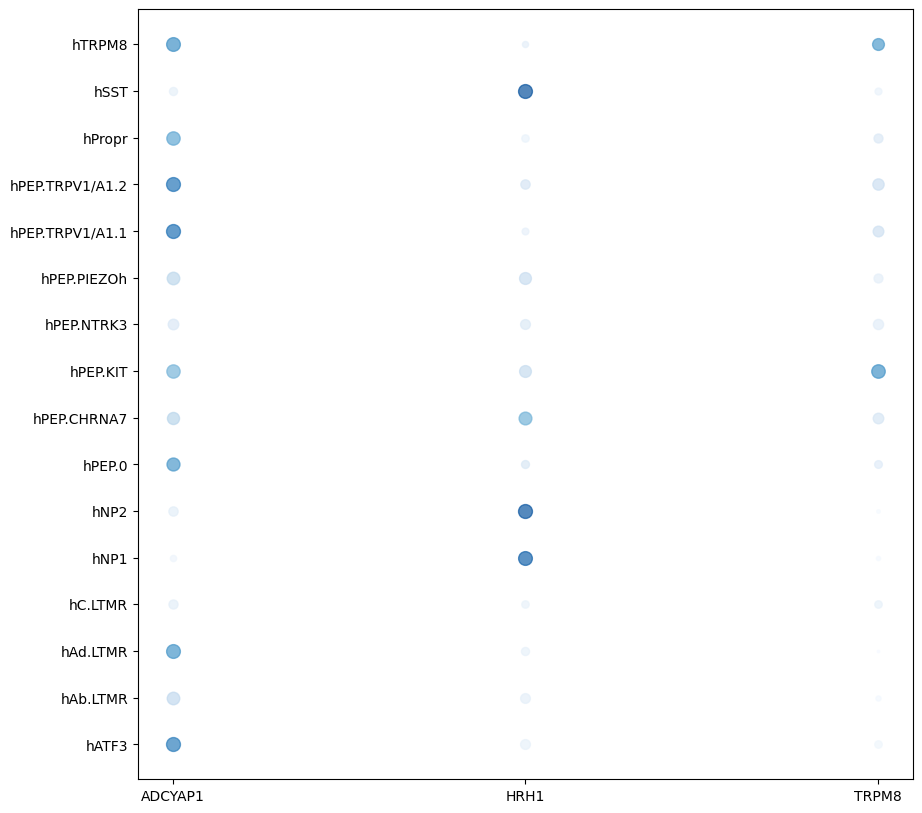

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler

# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["ADCYAP1","HRH1","TRPM8"]  # Replace with your actual gene names or leave empty to plot all genes

# Load your data
expression_data = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_normalized_expression_matrix.csv', index_col=0)
metadata = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)



# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled = scaler.fit_transform(expression_data.T)
expression_data_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data.index, index=expression_data.columns)

# Map cell types to each cell in the expression matrix
expression_data_scaled_df['cell_type'] = metadata['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed = expression_data_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression = expression_data_scaled_df.groupby('cell_type').mean().iloc[:, :-1]

# Now create the dot plot
plt.figure(figsize=(10, 10))
ax = plt.gca()

# If a gene list is provided, filter the genes to plot
if gene_list:
    mean_expression = mean_expression[gene_list]
    fraction_expressed = fraction_expressed[gene_list]

# Plotting
for cell_type in mean_expression.index:
    for gene in mean_expression.columns:
        avg_expr = mean_expression.loc[cell_type, gene]
        frac_expr = fraction_expressed.loc[cell_type, gene]
        size = 100 * frac_expr  # Size scaling factor
        ax.scatter(gene, cell_type, s=size, c=[avg_expr], cmap='Blues', vmin=0, vmax=1, alpha=0.7)

# Add color bar
norm = plt.Normalize(vmin=0, vmax=1)
sm = plt.cm.ScalarMappable(cmap='Blues', norm=norm)
sm.set_array([])
plt.colorbar(sm, label='Normalized Expression Level')

# Custom legend for dot sizes
for size in [0.1, 0.5, 1.0]:
    plt.scatter([], [], s=size * 100, c='black', alpha=0.5, label=f'{size * 100}%')
plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Expression Percentage')

plt.xticks(rotation=90)
plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression')
plt.tight_layout()
plt.show()


In [ ]:
expression_data_scaled_df 

NameError: name 'cell_types' is not defined

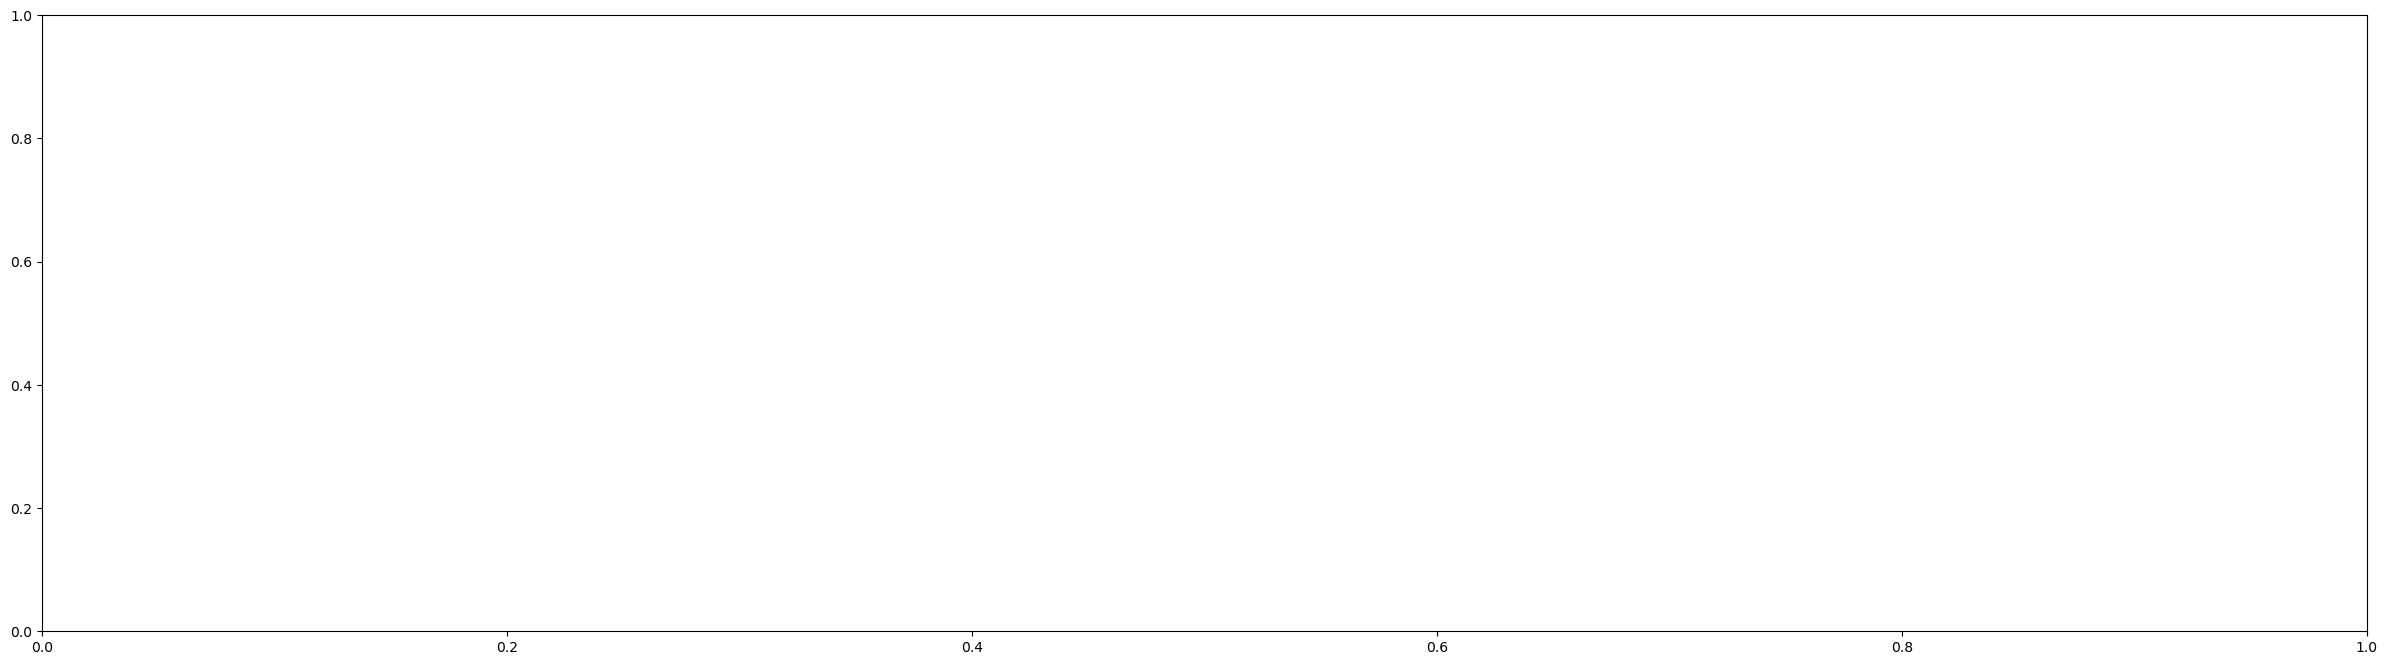

In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]  # Replace with your actual gene names or leave empty to plot all genes

# Load your data
expression_data_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_normalized_expression_matrix.csv', index_col=0)
metadata_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)



# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled_1 = scaler.fit_transform(expression_data_1.T)
expression_data_1_scaled_df = pd.DataFrame(expression_scaled_1, columns=expression_data_1.index, index=expression_data_1.columns)

# Map cell types to each cell in the expression matrix
expression_data_1_scaled_df['cell_type'] = metadata_1['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]


# Load your data
expression_data_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/Expression_matrix_normalized.csv', index_col=0)
metadata_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/human_drg_meta_data_final_new name_1066_hSST.csv', index_col=0)


# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled = scaler.fit_transform(expression_data_2.T)
expression_data_2_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data_2.index, index=expression_data_2.columns)

# Align metadata to only include common cells (intersection of cells in both datasets)
common_cells = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells]
aligned_metadata_2 = metadata_2.loc[common_cells]

# Map cell types to each cell in the expression matrix now that they are aligned
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['cell_type_manual']

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]




plt.figure(figsize=(30, 8))
ax = plt.gca()

# Define a colormap from gray to dark blue for dataset 1
cmap1 = plt.cm.Blues
# Define another colormap or marker style for dataset 2 for distinction
cmap2 = plt.cm.Reds

norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_types):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_types)), labels=cell_types)

# Adding a colorbar to represent expression levels for both datasets
sm = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)  # Using cmap1 for the colorbar
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Expression Level')

sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)  # Using cmap1 for the colorbar
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Expression Level')

# Custom legend for dot sizes (fraction expressed)
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Example sizes corresponding to the labels
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]


# Adding colorbars to represent expression levels for both datasets
# Assuming sm is the ScalarMappable object for the colormap

# Create legends for datasets and dot sizes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Dataset 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='Dataset 2')
]
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Corresponding sizes
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]

# Main datasets legend, placed at the top left outside of the plot
main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.5, 1))
ax.add_artist(main_legend)

# Dot sizes legend, adjust its position by changing bbox_to_anchor values
# Here we place it below the main legend. Adjust the second value in bbox_to_anchor to move it up or down.
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


# Modify the code

NameError: name 'cell_types' is not defined

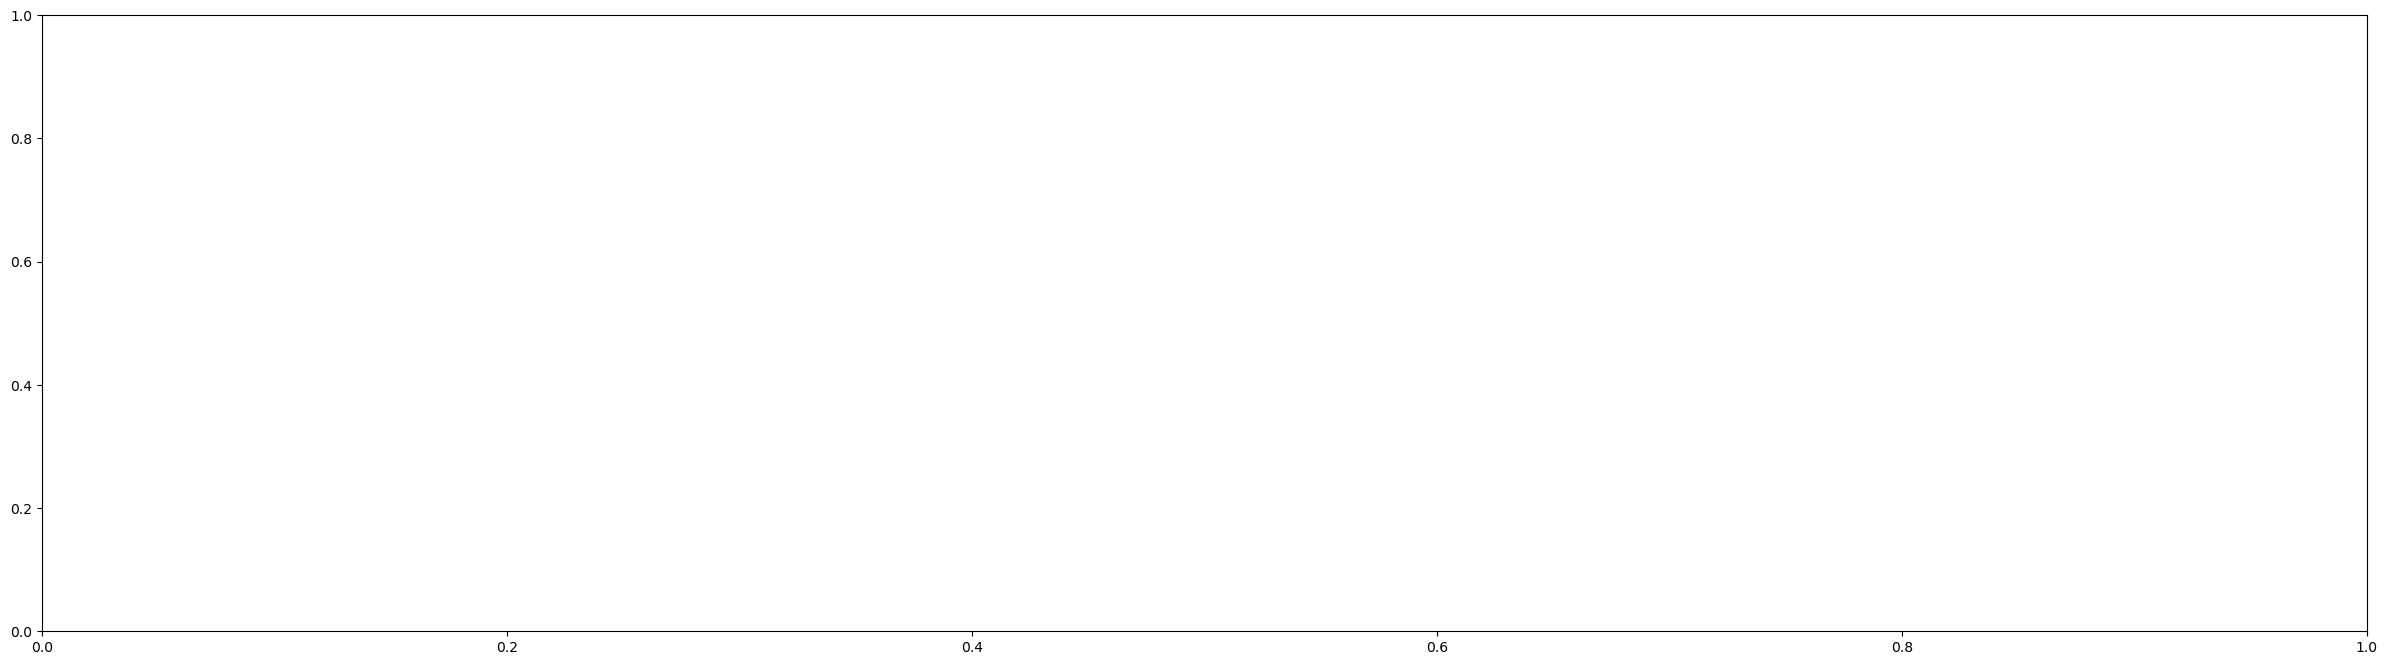

In [16]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D


# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]  # Replace with your actual gene names or leave empty to plot all genes

# Load your data
expression_data_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_1340.csv', index_col=0)
metadata_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
#expression_scaled_1 = scaler.fit_transform(expression_data_1.T)
expression_scaled_1 = expression_data_1.T

expression_data_1_scaled_df = pd.DataFrame(expression_scaled_1, columns=expression_data_1.index, index=expression_data_1.columns)

# Map cell types to each cell in the expression matrix
expression_data_1_scaled_df['cell_type'] = metadata_1['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_1  = mean_expression_1 / mean_expression_1.max()


# Load your data
expression_data_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/Expression_matrix_raw_counts.csv', index_col=0)
metadata_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/human_drg_meta_data_final_new name_1066_hSST.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled = expression_data_2.T
expression_data_2_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data_2.index, index=expression_data_2.columns)

# Align metadata to only include common cells (intersection of cells in both datasets)
common_cells = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells]
aligned_metadata_2 = metadata_2.loc[common_cells]

# Map cell types to each cell in the expression matrix now that they are aligned
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['cell_type_manual']

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_2  = mean_expression_2 / mean_expression_2.max()



plt.figure(figsize=(30, 8))
ax = plt.gca()

# Define a colormap from gray to dark blue for dataset 1
cmap1 = plt.cm.Blues
# Define another colormap or marker style for dataset 2 for distinction
cmap2 = plt.cm.Reds

norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_types):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_types)), labels=cell_types)

# Adding a colorbar to represent expression levels for both datasets
sm = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)  # Using cmap1 for the colorbar
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Expression Level')

sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)  # Using cmap1 for the colorbar
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Expression Level')

# Custom legend for dot sizes (fraction expressed)
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Example sizes corresponding to the labels
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]


# Adding colorbars to represent expression levels for both datasets
# Assuming sm is the ScalarMappable object for the colormap

# Create legends for datasets and dot sizes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Dataset 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='Dataset 2')
]
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Corresponding sizes
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]

# Main datasets legend, placed at the top left outside of the plot
main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.5, 1))
ax.add_artist(main_legend)

# Dot sizes legend, adjust its position by changing bbox_to_anchor values
# Here we place it below the main legend. Adjust the second value in bbox_to_anchor to move it up or down.
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


In [17]:
mean_expression_2

OR4F16   TNFRSF4  TNFRSF18    ATAD3B     THAP3  MTND1P23  \
cell_type                                                                   
hATF3               NaN  0.000000  1.000000  0.711363  0.644593  0.573080   
hAb.LTMR            NaN  0.298667  0.116533  0.472661  0.758427  0.824326   
hAd.LTMR            NaN  0.000000  0.053830  0.485249  0.764457  0.681077   
hC.LTMR             NaN  0.000000  0.000000  0.440710  0.403419  0.292908   
hNP1                NaN  0.290909  0.008961  0.540871  0.315335  0.304048   
hNP2                NaN  0.000000  0.000000  0.694118  0.491667  0.282447   
hPEP.0              NaN  0.000000  0.022055  0.421089  0.237285  0.586389   
hPEP.CHRNA7         NaN  0.000000  0.070278  0.117063  0.502172  0.509102   
hPEP.KIT            NaN  0.000000  0.000000  0.376807  0.556718  0.592511   
hPEP.NTRK3          NaN  0.000000  0.038333  0.385621  0.500071  0.566637   
hPEP.PIEZOh         NaN  0.000000  0.382034  1.000000  1.000000  1.000000   
hPEP.TRPV1/A1.1     NaN  0.392982  0.080702  0.330532  0.307872  0.513139   
hPEP.TRPV1/A1.2     NaN  0.000000  0.020909  0.540871  0.495105  0.713250   
hPropr              NaN  1.000000  0.279286  0.579907  0.459249  0.828286   
hSST                NaN  0.000000  0.000000  0.449678  0.277937  0.875804   
hTRPM8              NaN  0.000000  0.000000  0.743697  0.869872  0.470745   

                   RPL7P7  MTCO3P12  DDX11L17    PRDM16  ...  SNORA16A.2  \
cell_type                                                ...               
hATF3            0.000000  1.000000  0.000000  0.405797  ...         NaN   
hAb.LTMR         0.128333  0.926815  0.561905  0.225185  ...         NaN   
hAd.LTMR         0.936170  0.636170  0.537994  0.075650  ...         NaN   
hC.LTMR          0.000000  0.397531  0.000000  0.641975  ...         NaN   
hNP1             0.267857  0.272150  0.218924  0.236652  ...         NaN   
hNP2             0.687500  0.230000  0.000000  0.400000  ...         NaN   
hPEP.0           0.000000  0.528615  0.000000  0.054795  ...         NaN   
hPEP.CHRNA7      0.496528  0.575000  0.351190  0.098765  ...         NaN   
hPEP.KIT         0.880000  0.531556  0.674286  0.195556  ...         NaN   
hPEP.NTRK3       0.152778  0.567901  0.117063  0.179012  ...         NaN   
hPEP.PIEZOh      0.372881  0.926930  1.000000  0.557439  ...         NaN   
hPEP.TRPV1/A1.1  0.000000  0.502144  0.000000  0.093567  ...         NaN   
hPEP.TRPV1/A1.2  1.000000  0.836364  0.000000  0.282828  ...         NaN   
hPropr           0.073661  0.876190  0.752551  0.250000  ...         NaN   
hSST             0.191860  0.713178  0.000000  0.062016  ...         NaN   
hTRPM8           0.000000  0.638889  0.000000  1.000000  ...         NaN   

                 SNORA17B.1  SNORA17B.2  SNORA50A.1  SNORA50A.2  SNORD38B.1  \
cell_type                                                                     
hATF3                   NaN         NaN         NaN         NaN         NaN   
hAb.LTMR                NaN         NaN         NaN         NaN         NaN   
hAd.LTMR                NaN         NaN         NaN         NaN         NaN   
hC.LTMR                 NaN         NaN         NaN         NaN         NaN   
hNP1                    NaN         NaN         NaN         NaN         NaN   
hNP2                    NaN         NaN         NaN         NaN         NaN   
hPEP.0                  NaN         NaN         NaN         NaN         NaN   
hPEP.CHRNA7             NaN         NaN         NaN         NaN         NaN   
hPEP.KIT                NaN         NaN         NaN         NaN         NaN   
hPEP.NTRK3              NaN         NaN         NaN         NaN         NaN   
hPEP.PIEZOh             NaN         NaN         NaN         NaN         NaN   
hPEP.TRPV1/A1.1         NaN         NaN         NaN         NaN         NaN   
hPEP.TRPV1/A1.2         NaN         NaN         NaN         NaN         NaN   
hPropr                  NaN         NaN         NaN         NaN         NaN 

In [18]:
A_normalized = mean_expression_1 / mean_expression_1.max()


NameError: name 'cell_types' is not defined

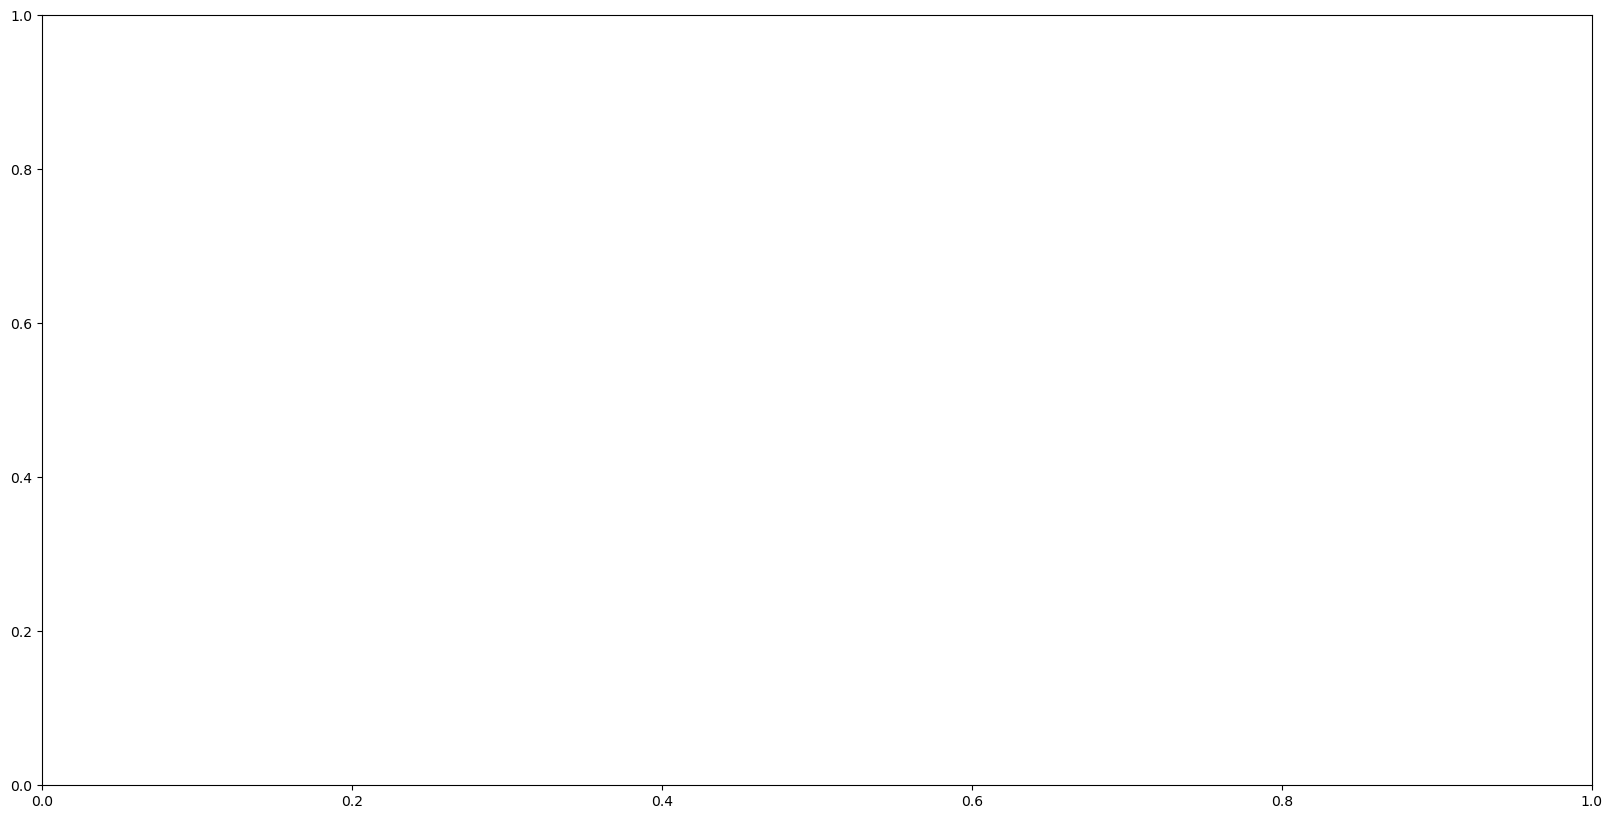

In [19]:
plt.figure(figsize=(20, 10))
ax = plt.gca()

# Define a colormap from gray to dark blue for dataset 1
cmap1 = plt.cm.Blues
# Define another colormap or marker style for dataset 2 for distinction
cmap2 = plt.cm.Reds

norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_types):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_types)), labels=cell_types)


plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


NameError: name 'cell_types' is not defined

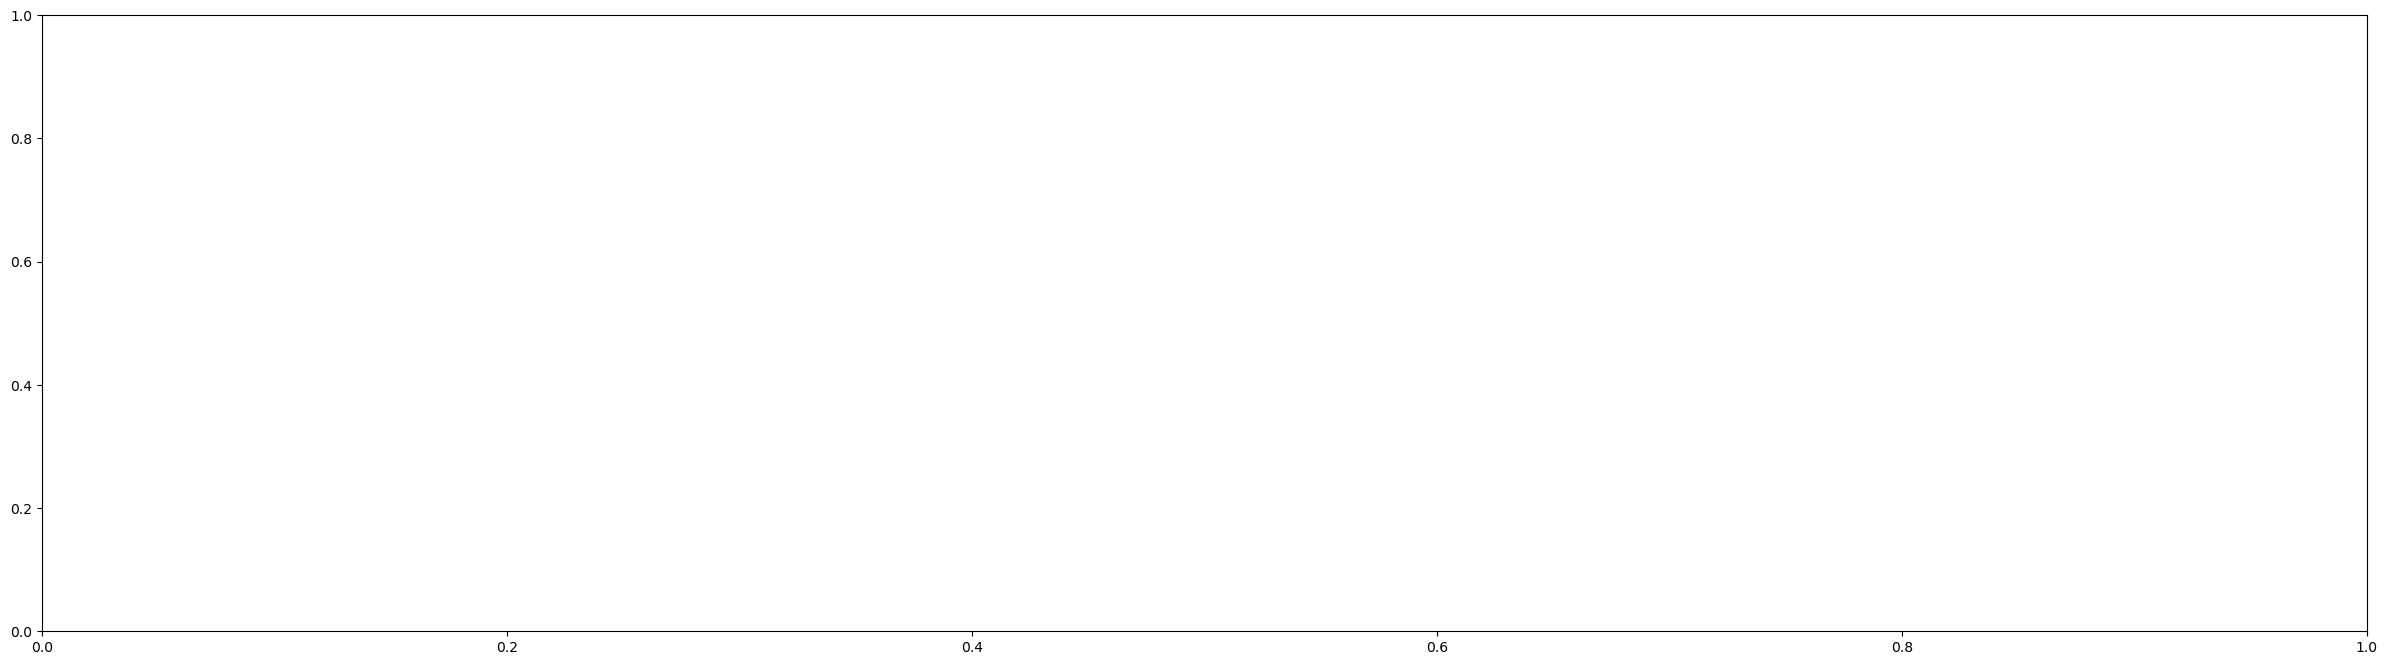

In [20]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
from matplotlib.lines import Line2D
import numpy as np


# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]  # Replace with your actual gene names or leave empty to plot all genes

# Load your data
expression_data_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_1340.csv', index_col=0)
metadata_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
#expression_scaled_1 = scaler.fit_transform(expression_data_1.T)
expression_scaled_1 = expression_data_1.T

expression_data_1_scaled_df = pd.DataFrame(expression_scaled_1, columns=expression_data_1.index, index=expression_data_1.columns)

# Map cell types to each cell in the expression matrix
expression_data_1_scaled_df['cell_type'] = metadata_1['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_1  = mean_expression_1 / mean_expression_1.max()


# Load your data
expression_data_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/Expression_matrix_raw_counts.csv', index_col=0)
metadata_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/human_drg_meta_data_final_new name_1066_hSST.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled = expression_data_2.T
expression_data_2_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data_2.index, index=expression_data_2.columns)

# Align metadata to only include common cells (intersection of cells in both datasets)
common_cells = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells]
aligned_metadata_2 = metadata_2.loc[common_cells]

# Map cell types to each cell in the expression matrix now that they are aligned
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['cell_type_manual']

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_2  = mean_expression_2 / mean_expression_2.max()



plt.figure(figsize=(30, 8))
ax = plt.gca()

# Define a colormap from gray to dark blue for dataset 1
#cmap1 = plt.cm.Blues
# Define another colormap or marker style for dataset 2 for distinction
#cmap2 = plt.cm.Reds
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "blue"])
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "red"])


norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_types):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_types)), labels=cell_types)

# Adding a colorbar to represent expression levels for both datasets
sm = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)  # Using cmap1 for the colorbar
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Expression Level')

sm = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)  # Using cmap1 for the colorbar
sm.set_array([])
cbar = plt.colorbar(sm, ax=ax, orientation='vertical')
cbar.set_label('Expression Level')

# Custom legend for dot sizes (fraction expressed)
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Example sizes corresponding to the labels
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]


# Adding colorbars to represent expression levels for both datasets
# Assuming sm is the ScalarMappable object for the colormap

# Create legends for datasets and dot sizes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Dataset 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='Dataset 2')
]
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Corresponding sizes
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]

# Main datasets legend, placed at the top left outside of the plot
main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.5, 1))
ax.add_artist(main_legend)

# Dot sizes legend, adjust its position by changing bbox_to_anchor values
# Here we place it below the main legend. Adjust the second value in bbox_to_anchor to move it up or down.
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


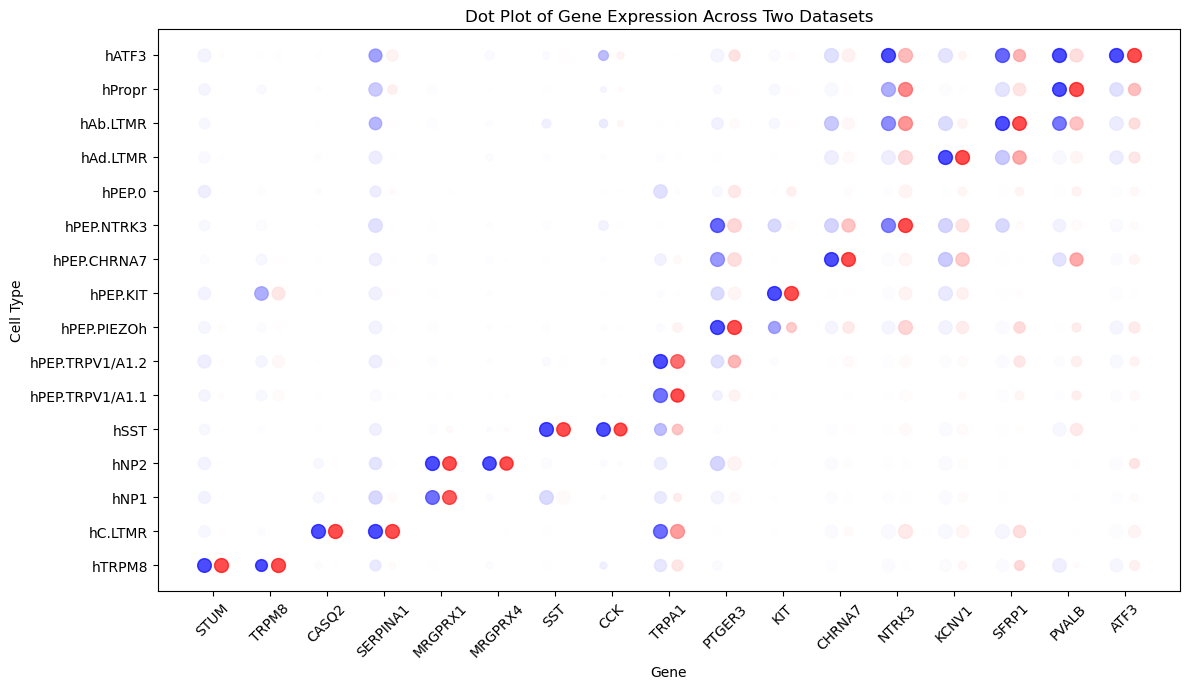

In [21]:
plt.figure(figsize=(12, 7))
ax = plt.gca()
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]  # Replace with your actual gene names or leave empty to plot all genes

# Explicitly defined order for cell types
cell_type_order = ["hTRPM8", "hC.LTMR", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3"]

# Define colormaps for the datasets
#cmap1 = plt.cm.Blues
#cmap2 = plt.cm.Reds
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "blue"])
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "red"])


# Normalize the expression levels
norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))

# Plotting for both datasets with the specified offset
offset = 0.15
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            ax.scatter(i - offset, j, s=100 * frac_expr_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)
        
        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            ax.scatter(i + offset, j, s=100 * frac_expr_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)

# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Setting the y-ticks according to the explicitly defined cell type order
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


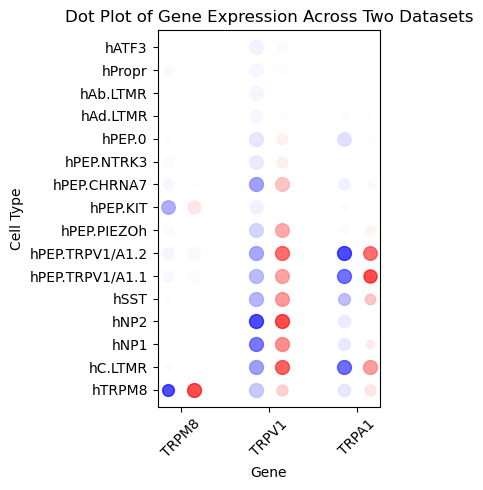

In [22]:
gene_list = ["TRPM8", "TRPV1", "TRPA1"]  # Replace with your actual gene names or leave empty to plot all genes
plt.figure(figsize=(4, 5))
ax = plt.gca()

# Explicitly defined order for cell types
cell_type_order = ["hTRPM8", "hC.LTMR", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3"]

# Define colormaps for the datasets
#cmap1 = plt.cm.Blues
#cmap2 = plt.cm.Reds
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "blue"])
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "red"])

# Normalize the expression levels
norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))

# Plotting for both datasets with the specified offset
offset = 0.15
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            ax.scatter(i - offset, j, s=100 * frac_expr_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)
        
        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            ax.scatter(i + offset, j, s=100 * frac_expr_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)

# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Setting the y-ticks according to the explicitly defined cell type order
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


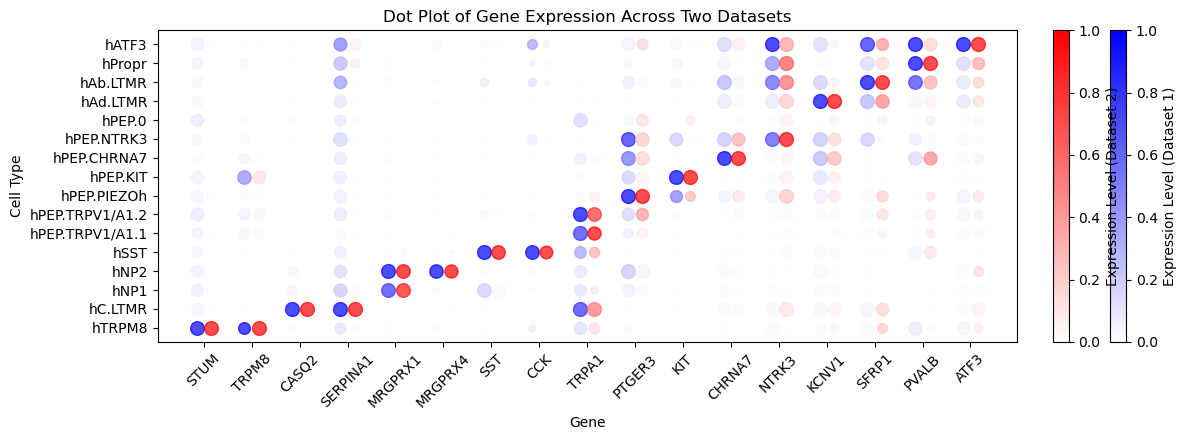

In [23]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Assuming mean_expression_1, fraction_expressed_1, mean_expression_2, and fraction_expressed_2 are already defined
# If not, please define them based on your data

plt.figure(figsize=(12, 4.5))
ax = plt.gca()

gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1", "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT", "CHRNA7", "NTRK3", "KCNV1", "SFRP1", "PVALB", "ATF3"]

# Explicitly defined order for cell types
cell_type_order = ["hTRPM8", "hC.LTMR", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3"]

# Define colormaps for the datasets
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "blue"])
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "red"])

# Normalize the expression levels
norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))

# Plotting for both datasets with the specified offset
offset = 0.15
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            ax.scatter(i - offset, j, s=100 * frac_expr_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)
        
        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            ax.scatter(i + offset, j, s=100 * frac_expr_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)

# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Setting the y-ticks according to the explicitly defined cell type order
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')

# Adding a color bar for dataset 1
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar1.set_label('Expression Level (Dataset 1)')

# Adding a color bar for dataset 2
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax, orientation='vertical', fraction=0.02, pad=0.04)
cbar2.set_label('Expression Level (Dataset 2)')

plt.tight_layout()
plt.show()


NameError: name 'mean_expression_1' is not defined

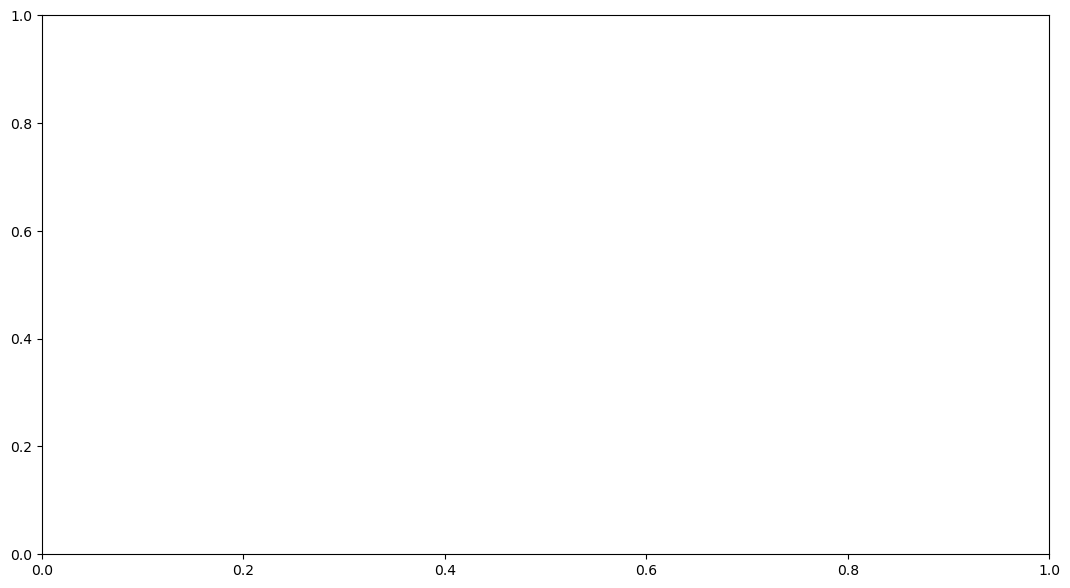

In [7]:
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

# Assuming mean_expression_1, fraction_expressed_1, mean_expression_2, and fraction_expressed_2 are already defined
# If not, please define them based on your data

plt.figure(figsize=(13, 7))
ax = plt.gca()

gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1", "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT", "CHRNA7", "NTRK3", "KCNV1", "SFRP1", "PVALB", "ATF3"]

# Explicitly defined order for cell types
cell_type_order = ["hTRPM8", "hC.LTMR", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3"]

# Define colormaps for the datasets
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "#003366"])
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "#9F0000"])

# Normalize the expression levels
norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))

# Plotting for both datasets with the specified offset
offset = 0.15
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            ax.scatter(i - offset, j, s=100 * frac_expr_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)
        
        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            ax.scatter(i + offset, j, s=100 * frac_expr_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)

# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Setting the y-ticks according to the explicitly defined cell type order
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')

# Adding a color bar for dataset 1
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)
sm1.set_array([])

# Create a new axis for the color bar 1
cbar1_ax = plt.gcf().add_axes([0.91, 0.15, 0.02, 0.7])
cbar1 = plt.colorbar(sm1, cax=cbar1_ax)
#cbar1.set_label('Expression Level (Dataset 1)')

# Adding a color bar for dataset 2
sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)
sm2.set_array([])

# Create a new axis for the color bar 2
cbar2_ax = plt.gcf().add_axes([0.94, 0.15, 0.02, 0.7])
cbar2 = plt.colorbar(sm2, cax=cbar2_ax)
#cbar2.set_label('Expression Level (Dataset 2)')

plt.tight_layout(rect=[0, 0, 0.9, 1])
plt.show()




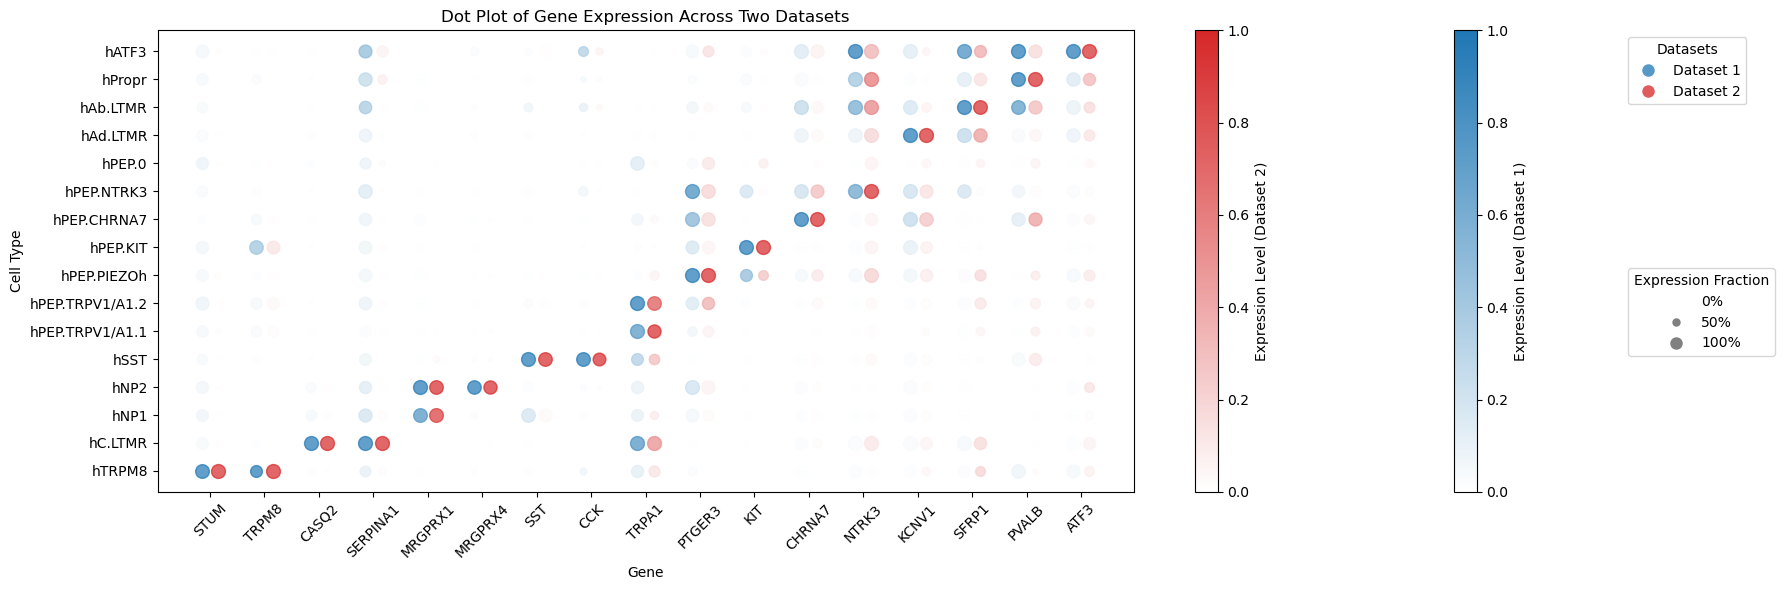

In [24]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]

# Load your data
expression_data_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_1340.csv', index_col=0)
metadata_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled_1 = expression_data_1.T
expression_data_1_scaled_df = pd.DataFrame(expression_scaled_1, columns=expression_data_1.index, index=expression_data_1.columns)

# Map cell types to each cell in the expression matrix
expression_data_1_scaled_df['cell_type'] = metadata_1['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_1 = mean_expression_1 / mean_expression_1.max()

# Load your data
expression_data_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/Expression_matrix_raw_counts.csv', index_col=0)
metadata_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/human_drg_meta_data_final_new name_1066_hSST.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
expression_scaled = expression_data_2.T
expression_data_2_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data_2.index, index=expression_data_2.columns)

# Align metadata to only include common cells (intersection of cells in both datasets)
common_cells = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells]
aligned_metadata_2 = metadata_2.loc[common_cells]

# Map cell types to each cell in the expression matrix now that they are aligned
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['cell_type_manual']

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_2 = mean_expression_2 / mean_expression_2.max()

plt.figure(figsize=(18, 6))
ax = plt.gca()

# Define custom colormaps for the datasets using specific RGB values or hex codes
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "#1f77b4"])  # Blue color
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "#d62728"])  # Red color

norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

# Adding a colorbar to represent expression levels for both datasets
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)  # Using cmap1 for the colorbar
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax, orientation='vertical')
cbar1.set_label('Expression Level (Dataset 1)')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)  # Using cmap2 for the colorbar
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax, orientation='vertical')
cbar2.set_label('Expression Level (Dataset 2)')

# Custom legend for dot sizes (fraction expressed)
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Example sizes corresponding to the labels
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]

# Adding legends for datasets and dot sizes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Dataset 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='Dataset 2')
]

# Main datasets legend, placed at the top left outside of the plot
main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.5, 1))
ax.add_artist(main_legend)

# Dot sizes legend, adjust its position by changing bbox_to_anchor values
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()
plt.show()


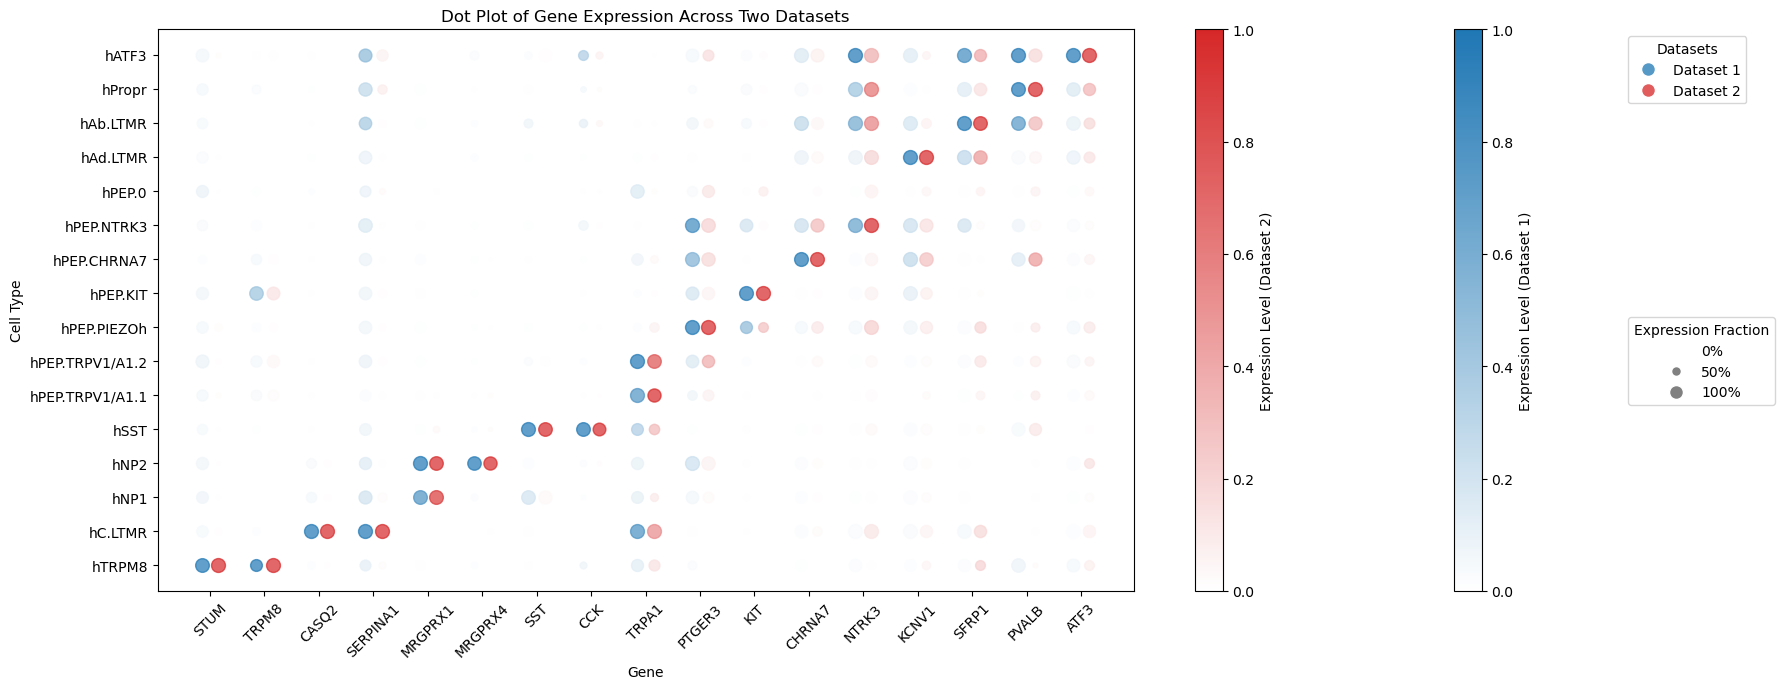

In [25]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import matplotlib.colors as mcolors
from matplotlib.lines import Line2D

# Define your gene list here; if it's empty, all genes will be plotted
gene_list = ["STUM", "TRPM8", "CASQ2", "SERPINA1", "MRGPRX1",  "MRGPRX4", "SST", "CCK", "TRPA1", "PTGER3", "KIT",  "CHRNA7", "NTRK3","KCNV1", "SFRP1", "PVALB", "ATF3"]

# Load your data
expression_data_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_1340.csv', index_col=0)
metadata_1 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Human TG sequencing and Migraine/Xenium/gene expression matrix/hDRG_gene_expression_matrix_metadata_seurat_filtered.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
scaler = MinMaxScaler()
expression_scaled_1 = expression_data_1.T
expression_data_1_scaled_df = pd.DataFrame(expression_scaled_1, columns=expression_data_1.index, index=expression_data_1.columns)

# Map cell types to each cell in the expression matrix
expression_data_1_scaled_df['cell_type'] = metadata_1['cell_type_manual'].values

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_1 = expression_data_1_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_1 = expression_data_1_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_1 = mean_expression_1 / mean_expression_1.max()

# Load your data
expression_data_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/Expression_matrix_raw_counts.csv', index_col=0)
metadata_2 = pd.read_csv('C:/E/Posdoc work at Upenn/Lab_work/Projected_I_am_intersted_in/Transcriptome of human DRG neurons/Project data/Sequencing data/human_drg_meta_data_final_new name_1066_hSST.csv', index_col=0)

# Normalize expression data to [0, 1] for color mapping
expression_scaled = expression_data_2.T
expression_data_2_scaled_df = pd.DataFrame(expression_scaled, columns=expression_data_2.index, index=expression_data_2.columns)

# Align metadata to only include common cells (intersection of cells in both datasets)
common_cells = expression_data_2_scaled_df.index.intersection(metadata_2.index)
expression_data_2_scaled_df = expression_data_2_scaled_df.loc[common_cells]
aligned_metadata_2 = metadata_2.loc[common_cells]

# Map cell types to each cell in the expression matrix now that they are aligned
expression_data_2_scaled_df['cell_type'] = aligned_metadata_2['cell_type_manual']

# Calculate the fraction of cells expressing each gene per cell type
fraction_expressed_2 = expression_data_2_scaled_df.groupby('cell_type').apply(lambda x: (x.iloc[:, :-1] > 0).mean())

# Calculate the average expression level per cell type
mean_expression_2 = expression_data_2_scaled_df.groupby('cell_type').mean().iloc[:, :-1]
mean_expression_2 = mean_expression_2 / mean_expression_2.max()

plt.figure(figsize=(18, 7))
ax = plt.gca()

# Define custom colormaps for the datasets using specific RGB values or hex codes
cmap1 = LinearSegmentedColormap.from_list("custom_blue", ["white", "#1f77b4"])  # Blue color
cmap2 = LinearSegmentedColormap.from_list("custom_red", ["white", "#d62728"])  # Red color

norm = mcolors.Normalize(vmin=0, vmax=max(mean_expression_1.max().max(), mean_expression_2.max().max()))  # Normalizing based on the maximum expression in both datasets

# Plotting for both datasets
offset = 0.15  # Offset for visual separation of datasets
for i, gene in enumerate(gene_list):
    for j, cell_type in enumerate(cell_type_order):
        # Dataset 1
        if gene in mean_expression_1.columns and cell_type in mean_expression_1.index:
            avg_expr_1 = mean_expression_1.loc[cell_type, gene]
            frac_expr_1 = fraction_expressed_1.loc[cell_type, gene]
            size_1 = 100 * frac_expr_1  # Scale for visualization
            ax.scatter(i - offset, j, s=size_1, color=cmap1(norm(avg_expr_1)), alpha=0.7)

        # Dataset 2
        if gene in mean_expression_2.columns and cell_type in mean_expression_2.index:
            avg_expr_2 = mean_expression_2.loc[cell_type, gene]
            frac_expr_2 = fraction_expressed_2.loc[cell_type, gene]
            size_2 = 100 * frac_expr_2  # Scale for visualization
            ax.scatter(i + offset, j, s=size_2, color=cmap2(norm(avg_expr_2)), alpha=0.7)
        
# Customize the ticks on the x-axis to show gene names
plt.xticks(ticks=range(len(gene_list)), labels=gene_list, rotation=45)

# Customize the ticks on the y-axis to show cell types
plt.yticks(ticks=range(len(cell_type_order)), labels=cell_type_order)

# Adding a colorbar to represent expression levels for both datasets
sm1 = plt.cm.ScalarMappable(cmap=cmap1, norm=norm)  # Using cmap1 for the colorbar
sm1.set_array([])
cbar1 = plt.colorbar(sm1, ax=ax, orientation='vertical')
cbar1.set_label('Expression Level (Dataset 1)')

sm2 = plt.cm.ScalarMappable(cmap=cmap2, norm=norm)  # Using cmap2 for the colorbar
sm2.set_array([])
cbar2 = plt.colorbar(sm2, ax=ax, orientation='vertical')
cbar2.set_label('Expression Level (Dataset 2)')

# Custom legend for dot sizes (fraction expressed)
size_legend_labels = ['0%', '50%', '100%']
sizes = [0, 50, 100]  # Example sizes corresponding to the labels
legend_sizes = [Line2D([0], [0], marker='o', color='w', markerfacecolor='gray', markersize=np.sqrt(size), label=label) for size, label in zip(sizes, size_legend_labels)]

# Adding legends for datasets and dot sizes
legend_elements = [
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap1(0.75), markersize=10, label='Dataset 1'),
    Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap2(0.75), markersize=10, label='Dataset 2')
]

# Main datasets legend, placed at the top left outside of the plot
main_legend = ax.legend(handles=legend_elements, title='Datasets', loc='upper left', bbox_to_anchor=(1.5, 1))
ax.add_artist(main_legend)

# Dot sizes legend, adjust its position by changing bbox_to_anchor values
ax.legend(handles=legend_sizes, title='Expression Fraction', loc='upper left', bbox_to_anchor=(1.5, 0.5))

plt.xlabel('Gene')
plt.ylabel('Cell Type')
plt.title('Dot Plot of Gene Expression Across Two Datasets')
plt.tight_layout()

# Save the plot as an SVG file
#plt.savefig(r'C:\E\Posdoc work at Upenn\Lab_work\Projected_I_am_intersted_in\Transcriptome of human DRG neurons\Manuscript and figs\Submmision\Nature neuroscience\Final\Revision\Resubmission\20240716_Final\new_plot\F4D.svg', format='svg')

plt.show()


# Cell size in different cell clusters

In [23]:
import pandas as pd

# List of your Excel file names
file_names = [r'H:\Xenium_segementation\Nucleus judgement based on HE staining\DRG Region 1 - Nucleus Presence.xlsx', r'H:\Xenium_segementation\Nucleus judgement based on HE staining\DRG Region 2 - Nucleus Presence.xlsx', r'H:\Xenium_segementation\Nucleus judgement based on HE staining\DRG Region 3 - Nucleus Presence.xlsx', r'H:\Xenium_segementation\Nucleus judgement based on HE staining\DRG Region 4 - Nucleus Presence.xlsx']
all_cell_ids_with_nucleus = []

for file_name in file_names:
    # Read the Excel file
    df = pd.read_excel(file_name)
    
    # Filter rows where Nucleus is 'Y'
    filtered_df = df[df['nucleus'] == 'Y']
    
    # Extract cell_ids and add them to the list
    cell_ids = filtered_df['cell_id'].tolist()
    all_cell_ids_with_nucleus.extend(cell_ids)

# all_cell_ids now contains all cell_ids where Nucleus is 'Y' from all files
print(all_cell_ids_with_nucleus)

FileNotFoundError: [Errno 2] No such file or directory: 'H:\\Xenium_segementation\\Nucleus judgement based on HE staining\\DRG Region 1 - Nucleus Presence.xlsx'

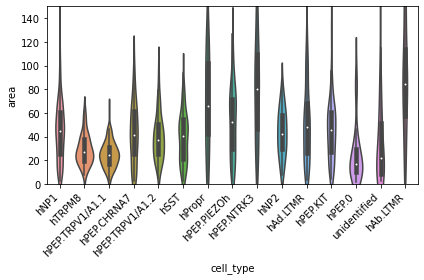

In [56]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cell type data
cell_types_df = pd.read_csv(r'H:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')

# Assuming the four cell size files are named as follows
cell_size_files = [r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_area_real_size.csv', r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_2_RoiSet_10NC_area_real_size.csv', r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_3_RoiSet_10NC_area_real_size.csv', r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_4_RoiSet_10NC_area_real_size.csv']
cell_size_df_list = [pd.read_csv(file) for file in cell_size_files]

# Combine the cell size data into a single DataFrame
cell_size_df = pd.concat(cell_size_df_list)
cell_size_df.rename(columns={'name': 'cell_id'}, inplace=True)


# Merge the cell type data with the cell size data
combined_df = pd.merge(cell_types_df, cell_size_df, on='cell_id')

# Create a violin plot
sns.violinplot(x='cell_type', y='area', data=combined_df)
# Set y-axis range
plt.ylim(0, 150)

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


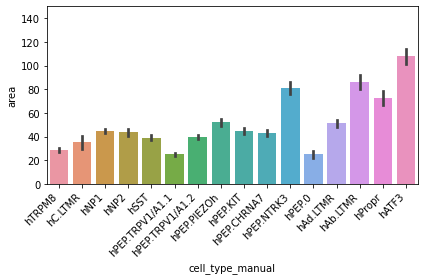

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load the cell type data
cell_types_df = pd.read_csv(r'H:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')

# Assuming the four cell size files are named as follows
cell_size_files = [
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_area_real_size.csv', 
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_2_RoiSet_10NC_area_real_size.csv', 
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_3_RoiSet_10NC_area_real_size.csv', 
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_4_RoiSet_10NC_area_real_size.csv'
]
cell_size_df_list = [pd.read_csv(file) for file in cell_size_files]

# Combine the cell size data into a single DataFrame
cell_size_df = pd.concat(cell_size_df_list)
cell_size_df.rename(columns={'name': 'cell_id'}, inplace=True)

# Merge the cell type data with the cell size data
combined_df = pd.merge(cell_types_df, cell_size_df, on='cell_id')

# Define the order of cell types as per list A
order_list_a = ["hTRPM8","hC.LTMR","hNP1","hNP2","hSST","hPEP.TRPV1/A1.1","hPEP.TRPV1/A1.2","hPEP.PIEZOh","hPEP.KIT","hPEP.CHRNA7","hPEP.NTRK3","hPEP.0","hAd.LTMR","hAb.LTMR","hPropr","hATF3"]  # Replace with your actual cell types in the desired order

# Create a dot plot
sns.barplot(x='cell_type_manual', y='area', order=order_list_a, data=combined_df, ci=68)

# Set y-axis range
plt.ylim(0, 150)

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


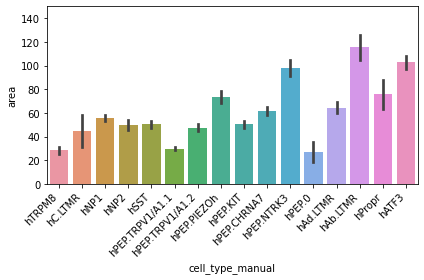

In [68]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming list_A contains the cell_ids you're interested in plotting
list_A = all_cell_ids_with_nucleus  # Replace these with your actual cell_ids

# Load the cell type data
cell_types_df = pd.read_csv(r'H:\Xenium_segementation\hDRG_gene_expression_matrix_metadata_seurat.csv')

# Load the cell size data from the four CSV files
cell_size_files = [
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_1_RoiSet_10NC_area_real_size.csv', 
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_2_RoiSet_10NC_area_real_size.csv', 
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_3_RoiSet_10NC_area_real_size.csv', 
    r'H:\Xenium_segementation\XETG00171__0018220_DRG-Region_4_RoiSet_10NC_area_real_size.csv'
]
cell_size_df_list = [pd.read_csv(file) for file in cell_size_files]

# Combine the cell size data into a single DataFrame
cell_size_df = pd.concat(cell_size_df_list)
cell_size_df.rename(columns={'name': 'cell_id'}, inplace=True)

# Merge the cell type data with the cell size data
combined_df = pd.merge(cell_types_df, cell_size_df, on='cell_id')

# Filter the combined DataFrame to include only the cells in list_A
filtered_combined_df = combined_df[combined_df['cell_id'].isin(list_A)]

# Define the order of cell types as per your list
order_list_a = ["hTRPM8", "hC.LTMR", "hNP1", "hNP2", "hSST", "hPEP.TRPV1/A1.1", "hPEP.TRPV1/A1.2", "hPEP.PIEZOh", "hPEP.KIT", "hPEP.CHRNA7", "hPEP.NTRK3", "hPEP.0", "hAd.LTMR", "hAb.LTMR", "hPropr", "hATF3"]

# Create a bar plot for the filtered data
sns.barplot(x='cell_type_manual', y='area', order=order_list_a, data=filtered_combined_df, ci=68)

# Set y-axis range
plt.ylim(0, 150)

# Improve layout
plt.xticks(rotation=45, ha='right')
plt.tight_layout()

# Show the plot
plt.show()


In [3]:
from scipy.io import mmread

# Replace 'your_file.mtx' with the path to your .mtx file
file_path = 'H:\human inmmune cell seq\GSE194315_PBMC-01-07_processed_data_files\PBMC-01-1.matrix.mtx\matrix.mtx'

# Read the Matrix Market file
matrix = mmread(file_path)

# Convert the matrix to a NumPy array
matrix_array = matrix.toarray()

# Display the first 5 rows of the matrix
print(matrix_array[20])


[0 0 0 ... 0 0 0]


In [4]:
import synapseclient
syn = synapseclient.Synapse()
syn.login(authToken="")

# Obtain a pointer and download the data
syn51197006 = syn.get(entity='syn51197006', version=1 )

# Get the path to the local copy of the data file
filepath = "F:/tem"

Welcome, Anonymous!



[WARNING] 
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!



In [3]:
pip install synapseclient


     -------------------------------------- 299.0/299.0 kB 6.1 MB/s eta 0:00:00
     -------------------------------------- 143.8/143.8 kB 1.7 MB/s eta 0:00:00
     ---------------------------------------- 57.9/57.9 kB 3.2 MB/s eta 0:00:00
     ---------------------------------------- 105.3/105.3 kB ? eta 0:00:00
     ------------------------------------- 229.1/229.1 kB 13.7 MB/s eta 0:00:00
     ---------------------------------------- 50.8/50.8 kB 2.5 MB/s eta 0:00:00
     ------------------------------------- 413.4/413.4 kB 13.0 MB/s eta 0:00:00
  Attempting uninstall: urllib3
    Found existing installation: urllib3 1.26.4
    Uninstalling urllib3-1.26.4:
      Successfully uninstalled urllib3-1.26.4
  Attempting uninstall: nest-asyncio
    Found existing installation: nest-asyncio 1.5.1
    Uninstalling nest-asyncio-1.5.1:
      Successfully uninstalled nest-asyncio-1.5.1
  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 3.10.0
    Unin

ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
spyder 4.2.5 requires pyqt5<5.13, which is not installed.
spyder 4.2.5 requires pyqtwebengine<5.13, which is not installed.

[notice] A new release of pip is available: 23.1.2 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip
